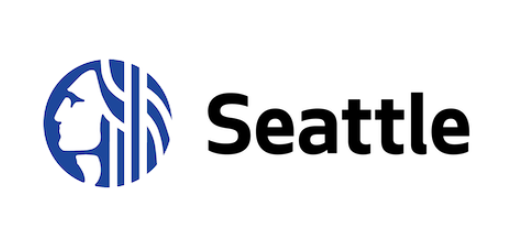

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 46)

# Contexte
Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.
Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.


<br>
<br>
<br>
<br>
Le Building Energy Benchmarking and Reporting Program de Seattle (SMC 22.920) exige des propriétaires de bâtiments non résidentiels et multifamiliaux (20 000 pieds carrés ou plus) qu'ils suivent leurs performances énergétiques et présentent un rapport annuel à la ville de Seattle. Les bâtiments sont responsables de 33 % des émissions de base de Seattle. La politique d'analyse comparative soutient les objectifs de Seattle visant à réduire la consommation d'énergie et les émissions de gaz à effet de serre des bâtiments existants. En 2013, la ville de Seattle a adopté un plan d'action climatique visant à atteindre des émissions nettes de gaz à effet de serre (GES) nulles d'ici 2050. L'analyse comparative annuelle, les rapports et la divulgation de la performance des bâtiments sont des éléments fondamentaux pour créer une plus grande valeur marchande pour l'efficacité énergétique.
Conformément à l'ordonnance (125000), à partir de 2015, la ville de Seattle publiera chaque année les données relatives à tous les bâtiments de 20 000 pieds carrés et plus. Cette mise à jour du mandat d'analyse comparative a été adoptée par le conseil municipal de Seattle le 29 février 2016.


# Objectifs
Vous cherchez également à évaluer l’intérêt de l’**ENERGY STAR Score** pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.

Vous sortez tout juste d’une réunion de brief avec votre équipe. Voici un récapitulatif de votre mission :

* Réaliser une courte analyse exploratoire.
* Tester différents modèles de prédiction afin de répondre au mieux à la problématique.


Chargez le fichier `2016_Building_Energy_Benchmarking.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df`.

In [2]:
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv') 

Head() pour afficher les 5 premières lignes du dataframe `df`.

In [3]:
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

la taille du dataframe avec shape

In [4]:
df.shape

(3376, 46)

min, max, moyenne, écart type, etc) pour toutes les variables quantitatives avec describes

In [5]:
df.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3376.000000      3.376000e+03         3376.000000   
mean         4.709123      9.483354e+04         8001.526066   
std          5.494465      2.188376e+05        32326.723928   
min          0.000000      1.128500e+04            0.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.417500e+04            0.000000   
75%          5.000000      9.099200e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            3.376000e+03               3.356000e+03   
mean             8.683201e+04               7.917764e+04   
std              2.079398e+05               2.017034e+05   
min              3.636000e+03               5.656000e+03   
25%              2.775600e+04               2.509475e+04   
50%              4.321600e+04               3.989400e+04   
75%              8.427625e+04               7.620025e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1679.000000                      596.000000   
mean                      28444.075817                    11738.675166   
std                       54392.917928                    29331.199286   
min                           0.000000                        0.000000   
25%                        5000.000000                     2239.000000   
50%                       10664.000000                     5043.000000   
75%                       26640.000000                    10138.750000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232848            137.783932         5.403667e+06   
std            139.287554            139.109807         2.161063e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05

In [6]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [7]:
for col in df.columns:
    print(f'{col :-<70} {df[col].nunique()}')

OSEBuildingID--------------------------------------------------------- 3376
DataYear-------------------------------------------------------------- 1
BuildingType---------------------------------------------------------- 8
PrimaryPropertyType--------------------------------------------------- 24
PropertyName---------------------------------------------------------- 3362
Address--------------------------------------------------------------- 3354
City------------------------------------------------------------------ 1
State----------------------------------------------------------------- 1
ZipCode--------------------------------------------------------------- 55
TaxParcelIdentificationNumber----------------------------------------- 3268
CouncilDistrictCode--------------------------------------------------- 7
Neighborhood---------------------------------------------------------- 19
Latitude-------------------------------------------------------------- 2876
Longitude------------------------

In [8]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

# Data Cleaning

 ## Bâtiment résidentiel/ non résidentiel
 
 Un bâtiment doit être considéré comme un bâtiment résidentiel lorsque plus de la moitié de la surface de plancher est utilisée à des fins d'habitation. Les autres bâtiments doivent être considérés comme non résidentiels.

Deux types de bâtiments résidentiels peuvent être distingués :

- maisons (bâtiments d'habitation en plain-pied) : comprenant tous les types de maisons (maisons individuelles, mitoyennes, mitoyennes, maisons en enfilade, etc.) dont chaque logement a sa propre entrée directement depuis le sol ;

- autres immeubles d'habitation : comprenant tous les immeubles d'habitation autres que les immeubles d'habitation en plain-pied tels que définis ci-dessus.

Un bâtiment est considéré comme un bâtiment non résidentiel lorsque la partie mineure du bâtiment (c'est-à-dire moins de la moitié de sa surface de plancher brute) est utilisée à des fins d'habitation.

Les bâtiments non résidentiels comprennent :

- bâtiments industriels ;
- les bâtiments commerciaux ;
- les bâtiments scolaires ;
- les bâtiments de santé ;
- d'autres bâtiments.

### ListOfAllPropertyUseTypes

In [9]:
df['ListOfAllPropertyUseTypes'] = df['ListOfAllPropertyUseTypes'].astype(str)

In [10]:
df["USE"] = df['ListOfAllPropertyUseTypes'].apply(
    lambda x: x.split(',')[0])

In [11]:
df["USE"].value_counts().index.tolist()

['Multifamily Housing',
 'Office',
 'Non-Refrigerated Warehouse',
 'K-12 School',
 'Other',
 'Hotel',
 'Medical Office',
 'Distribution Center',
 'Parking',
 'Retail Store',
 'Worship Facility',
 'Data Center',
 'Fitness Center/Health Club/Gym',
 'College/University',
 'Self-Storage Facility',
 'Supermarket/Grocery Store',
 'Senior Care Community',
 'Laboratory',
 'Bank Branch',
 'Food Service',
 'Residence Hall/Dormitory',
 'Financial Office',
 'Other - Recreation',
 'Other - Entertainment/Public Assembly',
 'Hospital (General Medical & Surgical)',
 'Manufacturing/Industrial Plant',
 'Food Sales',
 'nan',
 'Restaurant',
 'Automobile Dealership',
 'Lifestyle Center',
 'Refrigerated Warehouse',
 'Bar/Nightclub',
 'Fast Food Restaurant',
 'Social/Meeting Hall',
 'Other - Lodging/Residential',
 'Adult Education',
 'Other/Specialty Hospital',
 'Urgent Care/Clinic/Other Outpatient',
 'Repair Services (Vehicle',
 'Other - Education',
 'Library',
 'Museum',
 'Prison/Incarceration',
 'Convenie

In [12]:
df[df['USE']=='nan']

OSEBuildingID  DataYear          BuildingType  \
578             773      2016        NonResidential   
758           19798      2016  Multifamily LR (1-4)   
1768          23355      2016  Multifamily LR (1-4)   
1792          23437      2016  Multifamily LR (1-4)   
2321          25431      2016  Multifamily LR (1-4)   
2474          25752      2016  Multifamily LR (1-4)   
2480          25763      2016  Multifamily LR (1-4)   
2670          26532      2016        NonResidential   
3348          50082      2016  Multifamily LR (1-4)   

              PrimaryPropertyType         PropertyName  \
578   Small- and Mid-Sized Office     SEATTLE BUILDING   
758          Low-Rise Multifamily       SANDHURST APTS   
1768         Low-Rise Multifamily          GRAHAM VIEW   
1792         Low-Rise Multifamily     MERCER CREST APT   
2321         Low-Rise Multifamily        PONDERAY APTS   
2474         Low-Rise Multifamily  GRANVIEW APARTMENTS   
2480         Low-Rise Multifamily         Villa Andora   
2670           Mixed Use Property     KALBERG BUILDING   
3348         Low-Rise Multifamily       STREAM FIFTEEN   

                     Address     City State  ZipCode  \
578          215 COLUMBIA ST  Seattle    WA  98104.0   
758   7239 SAND POINT WAY NE  Seattle    WA  98115.0   
1768  6040 CALIFORNIA AVE SW  Seattle    WA  98136.0   
1792         500 W MERCER ST  Seattle    WA  98119.0   
2321        5625 15TH AVE NE  Seattle    WA  98105.0   
2474          1120 N 93RD ST  Seattle    WA  98103.0   
2480  1520 CALIFORNIA AVE SW  Seattle    WA  98116.0   
2670  4515 UNIVERSITY WAY NE  Seattle    WA  98105.0   
3348          605 15TH AVE E  Seattle    WA  98112.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
578                     0939000245                    7   
758                     0225049032                    4   
1768                    7625703280                    1   
1792                    3876900230                    7   
2321                    5226300030                    4   
2474                    9267200155                    6   
2480                    9272201340                    1   
2670                    8816401120                    4   
3348                    3303700030                    3   

               Neighborhood  Latitude  Longitude  YearBuilt  \
578                DOWNTOWN  47.60380 -122.33293       1924   
758               NORTHEAST  47.68149 -122.26471       1977   
1768              SOUTHWEST  47.54731 -122.38656       1992   
1792  MAGNOLIA / QUEEN ANNE  47.62479 -122.36364       1957   
2321              NORTHEAST  47.67025 -122.31232       1963   
2474              NORTHWEST  47.69658 -122.34342       1989   
2480              SOUTHWEST  47.58968 -122.38587       1969   
2670              NORTHEAST  47.66182 -122.31345       1928   
3348                   EAST  47.62441 -122.31300       2015   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
578                 NaN               4             63150                   0   
758                 NaN               3             33166                   0   
1768                NaN               4             29357                   0   
1792                NaN               4             23636                   0   
2321                NaN               4             28472                   0   
2474                NaN               4             29562                8531   
2480                NaN               3             30420                   0   
2670                NaN               2             20760                   0   
3348                1.0               4             36685                8254   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
578                    63150                       nan                    NaN   
758                    33166                       nan                    NaN   
1768                   29357         

On retire de la liste 
* Multifamily Housing
* Residence Hall/Dormitory
* Other - Lodging/Residential
* Residential Care Facility
* Senior Care Community
* Nan

In [13]:
non_residential_1 = [
    'Office',
    'Non-Refrigerated Warehouse',
    'K-12 School',
    'Other',
    'Hotel',
    'Medical Office',
    'Parking',
    'Distribution Center',
    'Retail Store',
    'Worship Facility',
    'Data Center',
    'Fitness Center/Health Club/Gym',
    'College/University',
    'Self-Storage Facility',
    'Supermarket/Grocery Store',
    'Laboratory',
    'Bank Branch',
    'Food Service',
    'Financial Office',
    'Other - Recreation',
    'Other - Entertainment/Public Assembly',
    'Hospital (General Medical & Surgical)',
    'Manufacturing/Industrial Plant',
    'Food Sales',
    'Restaurant',
    'nan',
    'Automobile Dealership',
    'Fast Food Restaurant',
    'Lifestyle Center',
    'Refrigerated Warehouse',
    'Bar/Nightclub',
    'Social/Meeting Hall',
    'Urgent Care/Clinic/Other Outpatient',
    'Library',
    'Repair Services (Vehicle',
    'Other - Education',
    'Adult Education',
    'Other/Specialty Hospital',
    'Museum',
    'Other - Mall',
    'Movie Theater',
    'Convenience Store without Gas Station',
    'Prison/Incarceration',
    'Pre-school/Daycare',
    'Personal Services (Health/Beauty',
    'Performing Arts',
    'Other - Services',
    'Strip Mall',
    'Courthouse',
    'Other - Public Services',
    'Police Station',
    'Other - Utility',
    'Fire Station',
    'Enclosed Mall',
    'Wholesale Club/Supercenter',
    'Convention Center',
    'Energy/Power Station']

In [14]:
df = df[df["USE"].isin(non_residential_1)]

L'objectif ici est d'identifier les possibles erreurs d'étiquette pour le property type, nous croisons les données de building type et primary property type

In [15]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Multifamily LR (1-4)', 'Multifamily HR (10+)',
       'Multifamily MR (5-9)', 'Nonresidential WA'], dtype=object)

### LargestPropertyUseType
vérification que notre filtre sur listofallproperty correspond bien à l'utilisation principale du batiment

In [16]:
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].astype(str)

In [17]:
df['LargestPropertyUseType'].value_counts().index.tolist()

['Office',
 'Non-Refrigerated Warehouse',
 'K-12 School',
 'Other',
 'Retail Store',
 'Hotel',
 'Worship Facility',
 'Distribution Center',
 'Multifamily Housing',
 'Supermarket/Grocery Store',
 'Medical Office',
 'Other - Recreation',
 'Parking',
 'Self-Storage Facility',
 'College/University',
 'Senior Care Community',
 'Other - Entertainment/Public Assembly',
 'Laboratory',
 'nan',
 'Restaurant',
 'Refrigerated Warehouse',
 'Hospital (General Medical & Surgical)',
 'Social/Meeting Hall',
 'Manufacturing/Industrial Plant',
 'Residence Hall/Dormitory',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Museum',
 'Other - Services',
 'Fitness Center/Health Club/Gym',
 'Automobile Dealership',
 'Strip Mall',
 'Library',
 'Financial Office',
 'Other - Mall',
 'Other - Education',
 'Urgent Care/Clinic/Other Outpatient',
 'Other/Specialty Hospital',
 'Bank Branch',
 'Data Center',
 'Prison/Incarceration',
 'Performing Arts',
 'Adult Education',
 'Lifestyle Center',
 'Pre-school/Daycare'

On retrouve encore une utilisation principale pour de la résidence, nous élimons des champs
* Residence Hall/Dormitory
* Multifamily Housing
* Other - Lodging/Residential

In [18]:
non_residential_2 = ['Office',
 'Non-Refrigerated Warehouse',
 'K-12 School',
 'Other',
 'Retail Store',
 'Hotel',
 'Worship Facility',
 'Distribution Center',
 'Medical Office',
 'Supermarket/Grocery Store',
 'Other - Recreation',
 'Parking',
 'Self-Storage Facility',
 'College/University',
 'Other - Entertainment/Public Assembly',
 'Laboratory',
 'Refrigerated Warehouse',
 'Restaurant',
 'Hospital (General Medical & Surgical)',
 'Social/Meeting Hall',
 'Manufacturing/Industrial Plant',
 'nan',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Strip Mall',
 'Other - Services',
 'Fitness Center/Health Club/Gym',
 'Museum',
 'Automobile Dealership',
 'Bank Branch',
 'Other/Specialty Hospital',
 'Other - Education',
 'Other - Mall',
 'Urgent Care/Clinic/Other Outpatient',
 'Financial Office',
 'Library',
 'Performing Arts',
 'Data Center',
 'Prison/Incarceration',
 'Lifestyle Center',
 'Adult Education',
 'Other - Public Services',
 'Other - Restaurant/Bar',
 'Other - Utility',
 'Pre-school/Daycare',
 'Wholesale Club/Supercenter',
 'Police Station',
 'Courthouse',
 'Food Service',
 'Movie Theater',
 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Convention Center',
 'Fire Station']

In [19]:
df = df[df['LargestPropertyUseType'].isin(non_residential_2)]

### SecondLargestPropertyUseType

Vérification que nos filtres éliminent bien toutes les résidences

In [20]:
df['SecondLargestPropertyUseType'] = df['SecondLargestPropertyUseType'].astype(str)

In [21]:
df['SecondLargestPropertyUseType'].value_counts().index.tolist()

['nan',
 'Parking',
 'Office',
 'Retail Store',
 'Other',
 'Restaurant',
 'Non-Refrigerated Warehouse',
 'Fitness Center/Health Club/Gym',
 'Data Center',
 'Other - Services',
 'Laboratory',
 'Distribution Center',
 'Medical Office',
 'Other - Entertainment/Public Assembly',
 'Bank Branch',
 'Supermarket/Grocery Store',
 'K-12 School',
 'Multifamily Housing',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Other - Recreation',
 'Swimming Pool',
 'Movie Theater',
 'Worship Facility',
 'Self-Storage Facility',
 'Automobile Dealership',
 'Performing Arts',
 'Adult Education',
 'Other - Public Services',
 'Bar/Nightclub',
 'Other - Education',
 'Refrigerated Warehouse',
 'Hotel',
 'Food Sales',
 'Manufacturing/Industrial Plant',
 'Other - Restaurant/Bar',
 'Social/Meeting Hall',
 'Other - Lodging/Residential',
 'Enclosed Mall',
 'Residence Hall/Dormitory',
 'Food Service',
 'Financial Office',
 'Hospital (General Medical & Surgical)',
 'Courthouse',
 'Pre-school/Daycare',
 'Vocationa

In [22]:
df[df['SecondLargestPropertyUseType'] =='Multifamily Housing']

OSEBuildingID  DataYear          BuildingType PrimaryPropertyType  \
488             657      2016        NonResidential  Mixed Use Property   
912           20212      2016        NonResidential  Mixed Use Property   
1773          23368      2016        NonResidential  Mixed Use Property   
2823          27100      2016  Multifamily HR (10+)               Hotel   

                PropertyName             Address     City State  ZipCode  \
488     2200 Westlake - SEDO  2200 Westlake Ave.  Seattle    WA  98121.0   
912   Market Street Holdings   2401 NW Market St  Seattle    WA  98107.0   
1773       Seaboard Building  1500-1506 4th Ave.  Seattle    WA  98011.0   
2823      Four Seasons Hotel     99 Union Street  Seattle    WA  98101.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
488                     8729740000                    7     DOWNTOWN   
912                     1125039011                    6      BALLARD   
1773                    7628750000                    7     DOWNTOWN   
2823                    6094680000                    7     DOWNTOWN   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
488   47.61783 -122.33729       2006                0.0               0   
912   47.66840 -122.38788       1960                1.0               4   
1773  47.61056 -122.33661       1909                1.0              11   
2823  47.60742 -122.33919       2008                1.0              20   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
488             516407                   0                  516407   
912              20539                   0                   20539   
1773            111137                   0                  111137   
2823            326516                   0                  326516   

                              ListOfAllPropertyUseTypes  \
488   Financial Office, Hotel, Multifamily Housing, ...   
912   Medical Office, Multifamily Housing, Office, R...   
1773  Bank Branch, Multifamily Housing, Office, Othe...   
2823  Hotel, Multifamily Housing, Parking, Retail Store   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  ...  \
488                 Parking                   385196.0  ...   
912            Retail Store                     7387.0  ...   
1773                 Office                    42939.0  ...   
2823                  Hotel                   252462.0  ...   

     SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseType  \
488                         340236.0                        Hotel   
912                           5264.0                   Restaurant   
1773                         40878.0                  Bank Branch   
2823                        145594.0                      Parking   

     ThirdLargestPropertyUseTypeGFA  YearsENERGYSTARCertified ENERGYSTARScore  \
488                         67627.0                       NaN            31.0   
912                          3700.0                       NaN             NaN   
1773                        10887.0                       NaN             NaN   
2823                        22801.0                       NaN             3.0   

      SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
488          76.300003           78.900002          199.199997   
912          81.000000           81.800003          198.399994   
1773         96.400002          100.400002          198.300003   
2823        142.600006          145.199997          279.600006   

      SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
488             202.000000          39403320.00           4.075436e+07   
912             199.300003           1678458.75           1.695248e+06   
1773            201.199997           9546165.00           9.946297e+06   
2823            280.799988          59107620.00           6.020290e+07   

      SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
488           

In [23]:
df[df['SecondLargestPropertyUseType'] =='Residence Hall/Dormitory']

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
146            234      2016  Nonresidential COS           Warehouse   

                 PropertyName     Address     City State  ZipCode  \
146  SCL Roy Street Warehouse  802 Roy St  Seattle    WA  98109.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode           Neighborhood  \
146                    4088803530                    7  MAGNOLIA / QUEEN ANNE   

     Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
146  47.62591 -122.34084       1926                1.0               2   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
146             50292                   0                   50292   

                             ListOfAllPropertyUseTypes  \
146  Non-Refrigerated Warehouse, Office, Other - Se...   

         LargestPropertyUseType  LargestPropertyUseTypeGFA  ...  \
146  Non-Refrigerated Warehouse                    42345.0  ...   

    SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseType  \
146                          5000.0                       Office   

    ThirdLargestPropertyUseTypeGFA  YearsENERGYSTARCertified ENERGYSTARScore  \
146                         4730.0                       NaN             NaN   

     SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
146               8.0                 8.0                25.1   

     SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
146                  25.1          430473.6875            430473.6875   

     SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
146             0.0       126164.6016           430474.0                 0.0   

     NaturalGas(kBtu)  DefaultData  Comments  ComplianceStatus Outlier  \
146               0.0        False       NaN         Compliant     NaN   

    TotalGHGEmissions  GHGEmissionsIntensity                         USE  
146               3.0                   0.06  Non-Refrigerated Warehouse  

[1 rows x 47 columns]

### ThirdLargestPropertyUseType

In [24]:
df['ThirdLargestPropertyUseType'] = df['ThirdLargestPropertyUseType'].astype(str)

In [25]:
df['ThirdLargestPropertyUseType'].value_counts().index.tolist()

['nan',
 'Office',
 'Retail Store',
 'Other',
 'Parking',
 'Restaurant',
 'Non-Refrigerated Warehouse',
 'Data Center',
 'Swimming Pool',
 'Medical Office',
 'Pre-school/Daycare',
 'Food Service',
 'Social/Meeting Hall',
 'Bank Branch',
 'Other - Restaurant/Bar',
 'Fitness Center/Health Club/Gym',
 'Other - Entertainment/Public Assembly',
 'Distribution Center',
 'Multifamily Housing',
 'Financial Office',
 'Other - Recreation',
 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Other - Technology/Science',
 'Convenience Store without Gas Station',
 'Other - Education',
 'Laboratory',
 'Other - Services',
 'Refrigerated Warehouse',
 'Self-Storage Facility',
 'Other/Specialty Hospital',
 'Other - Utility',
 'Fast Food Restaurant',
 'Vocational School',
 'Manufacturing/Industrial Plant',
 'Hotel',
 'Supermarket/Grocery Store',
 'K-12 School',
 'Strip Mall',
 'Bar/Nightclub']

In [26]:
df[df['ThirdLargestPropertyUseType'] =='Multifamily Housing']

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
289             419      2016          Campus  Mixed Use Property   
1328          21533      2016  NonResidential  Mixed Use Property   
3199          49776      2016  NonResidential        Large Office   

            PropertyName          Address     City State  ZipCode  \
289          Main Market  1501 Pike Place  Seattle    WA  98101.0   
1328         Hyatt Place    110 6th Ave N  Seattle    WA  98109.0   
3199  Market Place Tower  2025 1st Avenue  Seattle    WA  98121.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
289                     1976200205                    7     DOWNTOWN   
1328                    1991200695                    7   LAKE UNION   
3199                    1977200471                    7     DOWNTOWN   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
289   47.60881 -122.34119       1908                1.0               4   
1328  47.61893 -122.34473       2008                1.0               4   
3199  47.61156 -122.34401       1988                1.0              13   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
289             137400                   0                  137400   
1328            274442                   0                  274442   
3199            354086              149326                  204760   

                              ListOfAllPropertyUseTypes  \
289   Food Sales, Multifamily Housing, Office, Other...   
1328  Hotel, Multifamily Housing, Parking, Retail Store   
3199  Data Center, Multifamily Housing, Office, Othe...   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  ...  \
289            Retail Store                    44078.0  ...   
1328                  Hotel                   108763.0  ...   
3199                 Office                   193393.0  ...   

     SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseType  \
289                          19182.0          Multifamily Housing   
1328                        105499.0          Multifamily Housing   
3199                        149326.0          Multifamily Housing   

     ThirdLargestPropertyUseTypeGFA  YearsENERGYSTARCertified ENERGYSTARScore  \
289                         14380.0                       NaN             NaN   
1328                        58152.0                       NaN             NaN   
3199                        38225.0              201620092008            88.0   

      SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
289         122.800003          122.300003          306.600006   
1328         54.200001           56.299999          128.199997   
3199         56.700001           59.299999          167.699997   

      SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
289             305.000000           14940504.0             14879755.0   
1328            132.600006            9155568.0              9512996.0   
3199            174.399994           13458948.0             14070366.0   

      SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
289              0.0        3031866.75         10344729.0         45957.73828   
1328             0.0        1689621.25          5764988.0         33905.78906   
3199             0.0        3601493.50         12288296.0         11706.50879   

      NaturalGas(kBtu)  DefaultData  Comments  ComplianceStatus Outlier  \
289          4595774.0        False       NaN         Compliant     NaN   
1328         3390579.0        False       NaN         Compliant     NaN   
3199         1170651.0        False       NaN         Compliant     NaN   

     TotalGHGEmissions  GHGEmissionsIntensity          USE  
289             316.20                   2.30   Food Sales  
1328            220.26                   0.80        Hotel  
3199            147.84                   0.42  Data Center  

[3 rows x 47 columns]

In [27]:
# pd.cross tab
pd.crosstab(df['PrimaryPropertyType'],
            df['BuildingType'])

BuildingType                 Campus  Multifamily HR (10+)  \
PrimaryPropertyType                                         
Distribution Center               0                     0   
Hospital                          0                     0   
Hotel                             0                     1   
K-12 School                       4                     0   
Laboratory                        0                     0   
Large Office                      1                     0   
Low-Rise Multifamily              0                     0   
Medical Office                    0                     0   
Mixed Use Property                4                     0   
Office                            0                     0   
Other                             7                     1   
Refrigerated Warehouse            0                     0   
Restaurant                        1                     0   
Retail Store                      0                     0   
Self-Storage Facility             0                     0   
Small- and Mid-Sized Office       0                     0   
Supermarket / Grocery Store       0                     0   
University                        6                     0   
Warehouse                         0                     0   
Worship Facility                  0                     0   

BuildingType                 Multifamily LR (1-4)  NonResidential  \
PrimaryPropertyType                                                 
Distribution Center                             0              51   
Hospital                                        0              10   
Hotel                                           0              76   
K-12 School                                     0              39   
Laboratory                                      0              10   
Large Office                                    0             166   
Low-Rise Multifamily                            7               0   
Medical Office                                  0              38   
Mixed Use Property                              0              83   
Office                                          0               0   
Other                                           2             179   
Refrigerated Warehouse                          0              12   
Restaurant                                      0              11   
Retail Store                                    0              91   
Self-Storage Facility                           0              28   
Small- and Mid-Sized Office                     1             281   
Supermarket / Grocery Store                     0              40   
University                                      1              17   
Warehouse                                       0             180   
Worship Facility                                0              71   

BuildingType                 Nonresidential COS  Nonresidential WA  \
PrimaryPropertyType                                                  
Distribution Center                           2                  0   
Hospital                                      0                  0   
Hotel                                         0                  0   
K-12 School                                   0                  0   
Laboratory                                    0                  0   
Large Office                                  4                  0   
Low-Rise Multifamily                          0                  0   
Medical Office                                1                  0   
Mixed Use Property                            8                  0   
Office                                        3                  0   
Other                                        55                  0   
Refrigerated Warehouse                        0                  0   
Restaurant                                    0                  0   
Retail Store                                  0                  0   
Self-Storage Facil

### Multifamily HR (10+)

In [28]:
df.loc[(df['BuildingType'] == 'Multifamily HR (10+)') & (
            df['PrimaryPropertyType'] != 'High-Rise Multifamily'), ['PrimaryPropertyType','PropertyName','Address','USE']]

PrimaryPropertyType        PropertyName          Address    USE
876                Other         The Olivian    809 Olive Way  Other
2823               Hotel  Four Seasons Hotel  99 Union Street  Hotel

Nous considérons que Other et Hotel comme étant non résidentiel

In [29]:
df.loc[876,'BuildingType'] = 'NonResidential'
df.loc[2823,'BuildingType'] = 'NonResidential'

Nous savons que l'hotel Four Season n'est un pas considéré comme un bâtiment résidentiel. Les hôtels sont des établissements commerciaux

In [30]:
#supression  
df.drop(df[df['BuildingType'] == 'Multifamily HR (10+)'].index, inplace = True)

In [31]:
df.loc[(df['BuildingType'] != 'Multifamily HR (10+)') & (
            df['PrimaryPropertyType'] == 'High-Rise Multifamily'), ['BuildingType','PropertyName','Address']]

Empty DataFrame
Columns: [BuildingType, PropertyName, Address]
Index: []

In [32]:
#supression  
df.drop(df[df['PrimaryPropertyType'] == 'High-Rise Multifamily'].index, inplace = True)

### Multifamily LR (1-4)
* Si nous retrouvons des Senior care service, ils sont considérées comme des bâtiments résidentiels. Elles sont conçues pour offrir un logement et des soins de qualité aux personnes âgées. Nous n'apporterons pas de modification
* Other peut également décrire des bâtiments résidentiels, type des batiments de communauté

In [33]:
df.loc[(df['BuildingType'] == 'Multifamily LR (1-4)') & (
    df['PrimaryPropertyType'] != 'Low-Rise Multifamily'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

PrimaryPropertyType                        PropertyName  \
1076  Small- and Mid-Sized Office                Queenview Apartments   
1444                        Other                         ELDORADO II   
2142                        Other  ID 3551996 - Lander Artist Studios   
2773                   University                  NW Alpha Chi Omega   

                 Address                 USE  
1076      621 W Galer St              Office  
1444  3601 24th Ave West               Other  
2142     111 S LANDER ST               Other  
2773       4545 17th Ave  College/University

Comme précédemment, on considère Other, small mid office et university comme étant non résidentiel

In [34]:
df.loc[1076,'BuildingType'] = 'NonResidential'
df.loc[1444,'BuildingType'] = 'NonResidential'
df.loc[2142,'BuildingType'] = 'NonResidential'
df.loc[2773,'BuildingType'] = 'NonResidential'

In [35]:
#supression  
df.drop(df[df['BuildingType'] == 'Multifamily LR (1-4)'].index, inplace = True)

In [36]:
df.loc[(df['BuildingType'] != 'Multifamily LR (1-4)') & (
    df['PrimaryPropertyType'] == 'Low-Rise Multifamily'), ['BuildingType', 'PropertyName', 'Address','USE']]

Empty DataFrame
Columns: [BuildingType, PropertyName, Address, USE]
Index: []

In [37]:
#supression  
df.drop(df[df['PrimaryPropertyType'] == 'Low-Rise Multifamily'].index, inplace = True)

### Multifamily MR (5-9)

In [38]:
df.loc[(df['BuildingType'] == 'Multifamily MR (5-9)') & (
            df['PrimaryPropertyType'] != 'Mid-Rise Multifamily'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

Empty DataFrame
Columns: [PrimaryPropertyType, PropertyName, Address, USE]
Index: []

In [39]:
#supression  
df.drop(df[df['BuildingType'] == 'Multifamily MR (5-9)'].index, inplace = True)

In [40]:
df.loc[(df['BuildingType'] != 'Multifamily MR (5-9)') & (
            df['PrimaryPropertyType'] == 'Mid-Rise Multifamily'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

Empty DataFrame
Columns: [PrimaryPropertyType, PropertyName, Address, USE]
Index: []

In [41]:
#supression  
df.drop(df[df['PrimaryPropertyType'] == 'Mid-Rise Multifamily'].index, inplace = True)

### Senior Care Community

In [42]:
df.loc[(df['BuildingType'] != 'NonResidential')&(df['PrimaryPropertyType'] == 'Senior Care Community'), ['BuildingType', 'PropertyName', 'Address','USE']]

Empty DataFrame
Columns: [BuildingType, PropertyName, Address, USE]
Index: []

In [43]:
df.loc[1647,'BuildingType'] = 'NonResidential'
df.loc[1883,'BuildingType'] = 'NonResidential'
df.loc[2814,'BuildingType'] = 'NonResidential'

### NonResidential
Nous allons devoir éliminer les étiquettes suivantes catégorisé actuellement comme non résidentiel 
* Residence Hall : Les résidences étudiantes sont considérées comme des bâtiments résidentiels.
* Senior Care Community

In [44]:
df.loc[(df['BuildingType'] == 'NonResidential') & (
            df['PrimaryPropertyType'] == 'Residence Hall'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

Empty DataFrame
Columns: [PrimaryPropertyType, PropertyName, Address, USE]
Index: []

In [45]:
df.loc[(df['BuildingType'] == 'NonResidential') & (
            df['PrimaryPropertyType'] == 'Senior Care Community'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

Empty DataFrame
Columns: [PrimaryPropertyType, PropertyName, Address, USE]
Index: []

Nous n'obserons pas de champs abérants, l'ensemble de row donne une indication sur des batiments résidentiels

In [46]:
df.drop(df[df['PrimaryPropertyType'] == 'Senior Care Community'].index, inplace = True)

Nous terminons ici le filtrage des éléments résidentiels/non résidentiels, notre jeu de donnée semble concerné maintenant uniquement les éléments non résidentiels comme nous le souhaitions

### Campus
Les campus universitaires ne sont généralement pas considérés comme des bâtiments résidentiels, mais plutôt comme des complexes universitaires. Un campus universitaire est un ensemble de bâtiments et de terrains qui appartiennent à une université ou à une école et qui sont utilisés pour l'enseignement, la recherche et d'autres activités universitaires. Les campus universitaires comprennent souvent des salles de classe, des laboratoires, des bibliothèques, des restaurants, des centres sportifs et d'autres installations

In [47]:
df.loc[(df['BuildingType'] == 'Campus'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

PrimaryPropertyType                                       PropertyName  \
35    Mixed Use Property                                       Plant 2 Site   
105           University                                   SSCC MAIN CAMPUS   
128           University                                   NSCC MAIN CAMPUS   
162         Large Office                                         South Park   
195                Other  P66 Bell Harbor International Conference Cente...   
289   Mixed Use Property                                        Main Market   
301   Mixed Use Property                         Securities Building Campus   
340                Other                        Weintraub/Hutchinson/Thomas   
661                Other                     Pacific Multiforms Inc- Campus   
954          K-12 School                            University Prep Academy   
1297  Mixed Use Property                                     Economy Market   
1301          Restaurant                                      Corner Market   
1494          University                                      Entire Campus   
1692               Other                   Joint Training Facilities Campus   
1732               Other                                      T102 1011 B/C   
1862               Other                          FT C15 Fishermen's Center   
1993               Other  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...   
2270         K-12 School                                  O'Dea High School   
2325          University                            5th Avenue Master Meter   
2993         K-12 School            The Bush School - Lower / Middle School   
3022         K-12 School                     The Bush School - Upper School   
3252          University                    SSCC DUWAMISH GEORGETOWN CAMPUS   
3274          University          University of Washington - Seattle Campus   

                         Address                             USE  
35         7755 E MARGINAL WAY S            Energy/Power Station  
105             6000 16th Ave SW              College/University  
128           9600 COLLEGE WAY N              College/University  
162               1420 S Trenton                      Laboratory  
195             2225 Alaskan Way                           Other  
289              1501 Pike Place                      Food Sales  
301            1904 Third Avenue                     Data Center  
340          1100 Fairview Ave N                           Other  
661        6606 Urusla Pl. South  Manufacturing/Industrial Plant  
954             8000 25th Ave NE                     K-12 School  
1297           1433 First Avenue                      Food Sales  
1301             1501 1st Avenue                      Food Sales  
1494             901 12th Avenue              College/University  
1692            9401 Myers Way S                 Adult Education  
1732       1011 Klickitat Way SW                           Other  
1862  1900 West Nickerson Street                           Other  
1993          1333 AIRPORT WAY S                           Other  
2270              802 Terry Ave.                     K-12 School  
2325             3307 3rd Ave. W              College/University  
2993   3400 East Harrison Street                     K-12 School  
3022  408 Lake Washington Blvd E                     K-12 School  
3252     6770 E. Marginal Way S.              College/University  
3274   NE 45th St & Brooklyn Ave              College/University

On effectue des modifications sur les 4 elements **Mixed Use Property**

In [48]:
# pd.cross tab
pd.crosstab(df['PrimaryPropertyType'],
            df['BuildingType'])

BuildingType                 Campus  NonResidential  Nonresidential COS  \
PrimaryPropertyType                                                       
Distribution Center               0              51                   2   
Hospital                          0              10                   0   
Hotel                             0              77                   0   
K-12 School                       4              39                   0   
Laboratory                        0              10                   0   
Large Office                      1             166                   4   
Medical Office                    0              38                   1   
Mixed Use Property                4              83                   8   
Office                            0               0                   3   
Other                             7             182                  55   
Refrigerated Warehouse            0              12                   0   
Restaurant                        1              11                   0   
Retail Store                      0              91                   0   
Self-Storage Facility             0              28                   0   
Small- and Mid-Sized Office       0             282                   4   
Supermarket / Grocery Store       0              40                   0   
University                        6              18                   0   
Warehouse                         0             180                   7   
Worship Facility                  0              71                   0   

BuildingType                 Nonresidential WA  SPS-District K-12  
PrimaryPropertyType                                                
Distribution Center                          0                  0  
Hospital                                     0                  0  
Hotel                                        0                  0  
K-12 School                                  0                 96  
Laboratory                                   0                  0  
Large Office                                 0                  0  
Medical Office                               0                  0  
Mixed Use Property                           0                  0  
Office                                       0                  0  
Other                                        0                  2  
Refrigerated Warehouse                       0                  0  
Restaurant                                   0                  0  
Retail Store                                 0                  0  
Self-Storage Facility                        0                  0  
Small- and Mid-Sized Office                  0                  0  
Supermarket / Grocery Store                  0                  0  
University                                   1                  0  
Warehouse                                    0                  0  
Worship Facility                             0                  0

### Mixed Use Property

Nous traiterons par la suite les batiments avec l'étiquette **Mixed Use Property**
* **Mixed use property** is property with a residential and non-residential part, for example, a shop with an apartment upstairs

Les hôtels ne sont pas considérés comme des bâtiments résidentiels. Les hôtels sont des établissements commerciaux qui offrent des chambres et des suites à des clients qui voyagent pour affaires ou pour le plaisir.

Nous utiliserons regex pour pouvoir appliquer et cibler pour conserver uniquement les batiments résidentiels

In [49]:
df['Name'] = df.loc[(df['PrimaryPropertyType'] == 'Mixed Use Property'), ['PropertyName']].astype(str)

In [50]:
df.loc[(df['PrimaryPropertyType'] == 'Mixed Use Property'), ['Name']].value_counts().index.tolist()

[('(ID#40008) KC Metro Transit Power Distribution',),
 ('Pacific Tower',),
 ('Rex Land Building (Block 56SE) - SEDO',),
 ('Rainier Community Center',),
 ('R&K Foods/RE-PC/Brinks',),
 ('Puget Sound Energy Georgetown Operations Center',),
 ('Plant 2 Site',),
 ('Pike Building',),
 ('Pier 56',),
 ('Pier 54',),
 ('Parts and Service building',),
 ('Pacific Office Automation',),
 ('SPBS LLC',),
 ('On Ballard- 425 Westlake',),
 ('Olympic Sculpture Park',),
 ('Oddfellows',),
 ('OCC Complex',),
 ('Northgate Community Center',),
 ('Miller-Barringham Building',),
 ("Matador/Jak's Grill/8 Limbs Yoga/Fitness",),
 ('Market Street Holdings',),
 ('Marion 823',),
 ('Richmark Label',),
 ('Salmon Bay Marine Center West',),
 ('Mann Building',),
 ('U.S. BANK',),
 ('childhaven',),
 ('Yesler Community Center',),
 ('Workshops Seattle Lake City Way',),
 ('West Seattle Venture, LLC',),
 ('WALDEN BUILDING',),
 ('Van Asselt Community Center',),
 ('Union Bay Plaza',),
 ('UW Medicine Research Phase II',),
 ('US Rubb

Nous allons pouvoir filtrer par les mots suivants caractérisant des batiments non résidentiel
* Center, Fitness, Food, Market, Bank,BANK, Hotel, Office, Sculpture, Club, Museum, Art, Metro,University


Nous avons remarqué d'autres nom dans la liste, il s'agit de non résidentiel
* Hyatt Place,Automobili Italiane

In [51]:
import re

In [52]:
Center = re.compile('Center')
Fitness = re.compile('Fitness')
Food = re.compile('Food')
Market = re.compile('Market')
Bank = re.compile('Bank')
BANK = re.compile('BANK')
Hotel = re.compile('Hotel')
Office = re.compile('Office')
Sculpture = re.compile('Sculpture')
Club = re.compile('Club')
Museum = re.compile('Museum')
Art = re.compile('Art')
Metro = re.compile('Metro')
University = re.compile('University')

In [53]:
Hyatt_Place = re.compile('Hyatt Place')
Automobili_Italiane = re.compile('Automobili Italiane')

In [54]:
df['Center'] = df['Name'].str.extract('(Center)', expand=True)
df['Fitness'] = df['Name'].str.extract('(Fitness)', expand=True)
df['Food'] = df['Name'].str.extract('(Food)', expand=True)
df['Market'] = df['Name'].str.extract('(Market)', expand=True)
df['Bank'] = df['Name'].str.extract('(Bank)', expand=True)
df['BANK'] = df['Name'].str.extract('(BANK)', expand=True)
df['Hotel'] = df['Name'].str.extract('(Hotel)', expand=True)
df['Office'] = df['Name'].str.extract('(Office)', expand=True)
df['Sculpture'] = df['Name'].str.extract('(Sculpture)', expand=True)
df['Club'] = df['Name'].str.extract('(Club)', expand=True)
df['Museum'] = df['Name'].str.extract('(Museum)', expand=True)
df['Art'] = df['Name'].str.extract('(Art)', expand=True)
df['Metro'] = df['Name'].str.extract('(Metro)', expand=True)
df['University'] = df['Name'].str.extract('(University)', expand=True)

In [55]:
df['Hyatt_Place'] = df['Name'].str.extract('(Hyatt Place)', expand=True)
df['Automobili_Italiane'] = df['Name'].str.extract('(Automobili Italiane)', expand=True)

In [56]:
df[(df['Center'] == 'Center')
   | (df['Fitness'] == 'Fitness')
   | (df['Food'] == 'Food')
   | (df['Market'] == 'Market')
   | (df['Bank'] == 'Bank')
   | (df['BANK'] == 'BANK')
   | (df['Hotel'] == 'Hotel')
   | (df['Office'] == 'Office')
   | (df['Sculpture'] == 'Sculpture')
   | (df['Club'] == 'Club')
   | (df['Museum'] == 'Museum')
   | (df['Art'] == 'Art')
   | (df['Metro'] == 'Metro')
   | (df['University'] == 'University')
   | (df['Hyatt_Place'] == 'Hyatt Place')
   | (df['Automobili_Italiane'] == 'Automobili Italiane')]

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
18             24.0    2016.0      NonResidential  Mixed Use Property   
289           419.0    2016.0              Campus  Mixed Use Property   
373           525.0    2016.0      NonResidential  Mixed Use Property   
459           620.0    2016.0      NonResidential  Mixed Use Property   
474           637.0    2016.0      NonResidential  Mixed Use Property   
656         19472.0    2016.0      NonResidential  Mixed Use Property   
784         19857.0    2016.0      NonResidential  Mixed Use Property   
796         19876.0    2016.0      NonResidential  Mixed Use Property   
830         19928.0    2016.0      NonResidential  Mixed Use Property   
912         20212.0    2016.0      NonResidential  Mixed Use Property   
968         20387.0    2016.0      NonResidential  Mixed Use Property   
986         20428.0    2016.0      NonResidential  Mixed Use Property   
1000        20470.0    2016.0      NonResidential  Mixed Use Property   
1134        21023.0    2016.0      NonResidential  Mixed Use Property   
1297        21478.0    2016.0              Campus  Mixed Use Property   
1328        21533.0    2016.0      NonResidential  Mixed Use Property   
2073        24358.0    2016.0      NonResidential  Mixed Use Property   
2080        24381.0    2016.0  Nonresidential COS  Mixed Use Property   
2095        24448.0    2016.0      NonResidential  Mixed Use Property   
2167        24649.0    2016.0      NonResidential  Mixed Use Property   
2248        24959.0    2016.0      NonResidential  Mixed Use Property   
2671        26535.0    2016.0      NonResidential  Mixed Use Property   
2686        26600.0    2016.0      NonResidential  Mixed Use Property   
2782        26924.0    2016.0  Nonresidential COS  Mixed Use Property   
3129        40008.0    2016.0      NonResidential  Mixed Use Property   
3321        50038.0    2016.0      NonResidential  Mixed Use Property   
3360        50196.0    2016.0  Nonresidential COS  Mixed Use Property   
3368        50219.0    2016.0  Nonresidential COS  Mixed Use Property   
3374        50225.0    2016.0  Nonresidential COS  Mixed Use Property   
3375        50226.0    2016.0  Nonresidential COS  Mixed Use Property   

                                         PropertyName  \
18                                   The Rainier Club   
289                                       Main Market   
373                                Seattle Art Museum   
459                         Pacific Office Automation   
474                         Stadium Innovation Center   
656   Puget Sound Energy Georgetown Operations Center   
784                                Good Arts Building   
796                                         U.S. BANK   
830                            Olympic Sculpture Park   
912                            Market Street Holdings   
968                            Marine Business Center   
986          Matador/Jak's Grill/8 Limbs Yoga/Fitness   
1000                 Lake City Center - Main Building   
1134             George Pocock Memorial Rowing Center   
1297                                   Economy Market   
1328                                      Hyatt Place   
2073                           R&K Foods/RE-PC/Brinks   
2080                         Rainier Community Center   
2095                        Automobili Italiane, Inc.   
2167                                Crown Hill Center   
2248                                   Hanford Center   
2671                         2967-University District   
2686                                   Cadillac Hotel   
2782                          Yesler Community Center   
3129   (ID#40008) KC Metro Transit Power Distribution   
3321                    Salmon Bay Marine Center West   
3360                       Northgate Community Center   
3368                        Garfield Community Center   
3374                      South Park Community Center   
3375                      Van As

In [57]:
df.loc[18,'PrimaryPropertyType'] = 'Office'
df.loc[373,'PrimaryPropertyType'] = 'Other'
df.loc[459,'PrimaryPropertyType'] = 'Distribution Center'
df.loc[474,'PrimaryPropertyType'] = 'Distribution Center'
df.loc[656,'PrimaryPropertyType'] = 'Non-Refrigerated Warehouse'
df.loc[784,'PrimaryPropertyType'] = 'Office'
df.loc[796,'PrimaryPropertyType'] = 'Other'
df.loc[830,'PrimaryPropertyType'] = 'Other'
df.loc[912,'PrimaryPropertyType'] = 'Retail Store'
df.loc[968,'PrimaryPropertyType'] = 'Other'
df.loc[986,'PrimaryPropertyType'] = 'Retail Store'
df.loc[1000,'PrimaryPropertyType'] = 'Other'
df.loc[1134,'PrimaryPropertyType'] = 'Office'
df.loc[1328,'PrimaryPropertyType'] = 'Hotel'
df.loc[2073,'PrimaryPropertyType'] = 'Non-Refrigerated Warehouse'
df.loc[2080,'PrimaryPropertyType'] = 'Retail Store'
df.loc[2095,'PrimaryPropertyType'] = 'Other'
df.loc[2167,'PrimaryPropertyType'] = 'Other'
df.loc[2248,'PrimaryPropertyType'] = 'Other'
df.loc[2671,'PrimaryPropertyType'] = 'Other'
df.loc[2686,'PrimaryPropertyType'] = 'Hotel'
df.loc[2782,'PrimaryPropertyType'] = 'Other'
df.loc[3129,'PrimaryPropertyType'] = 'Other'
df.loc[3134,'PrimaryPropertyType'] = 'Other'
df.loc[3321,'PrimaryPropertyType'] = 'Office'
df.loc[3360,'PrimaryPropertyType'] = 'Other'
df.loc[3368,'PrimaryPropertyType'] = 'Other'

In [58]:
# pd.cross tab
pd.crosstab(df['PrimaryPropertyType'],
            df['BuildingType'])

BuildingType                 Campus  NonResidential  Nonresidential COS  \
PrimaryPropertyType                                                       
Distribution Center               0              53                   2   
Hospital                          0              10                   0   
Hotel                             0              79                   0   
K-12 School                       4              39                   0   
Laboratory                        0              10                   0   
Large Office                      1             166                   4   
Medical Office                    0              38                   1   
Mixed Use Property                4              61                   4   
Non-Refrigerated Warehouse        0               2                   0   
Office                            0               4                   3   
Other                             7             192                  58   
Refrigerated Warehouse            0              12                   0   
Restaurant                        1              11                   0   
Retail Store                      0              93                   1   
Self-Storage Facility             0              28                   0   
Small- and Mid-Sized Office       0             282                   4   
Supermarket / Grocery Store       0              40                   0   
University                        6              18                   0   
Warehouse                         0             180                   7   
Worship Facility                  0              71                   0   

BuildingType                 Nonresidential WA  SPS-District K-12  
PrimaryPropertyType                                                
Distribution Center                          0                  0  
Hospital                                     0                  0  
Hotel                                        0                  0  
K-12 School                                  0                 96  
Laboratory                                   0                  0  
Large Office                                 0                  0  
Medical Office                               0                  0  
Mixed Use Property                           0                  0  
Non-Refrigerated Warehouse                   0                  0  
Office                                       0                  0  
Other                                        0                  2  
Refrigerated Warehouse                       0                  0  
Restaurant                                   0                  0  
Retail Store                                 0                  0  
Self-Storage Facility                        0                  0  
Small- and Mid-Sized Office                  0                  0  
Supermarket / Grocery Store                  0                  0  
University                                   1                  0  
Warehouse                                    0                  0  
Worship Facility                             0                  0

Nous avons retravaillé avec la fonction regex le Mixed Use Property	qui nous semblant pas suffisamment précis

In [59]:
sns.set_context("talk") # scaling automatique selon type de présentation ('notebook', 'paper', 'talk', 'poster')

for column in ['BuildingType']:
    chaine = 'Répartition en fonction du : ' + column
    plt.figure(figsize=(7,3), dpi=80)
    df[column].value_counts(normalize=True, ascending = True).plot(kind='barh', width=0.9)
    axes = plt.gca()
    axes.set_frame_on(False) 
    axes.yaxis.grid(False) 
    plt.xticks([], [])
    plt.title(chaine)

    for i, v in enumerate(df[column].value_counts(normalize=True, ascending = True)):
        plt.text(v, i, " "+str(int(round(v*100,0)))+"%", color='r', va='center', fontweight='bold')
        
    plt.show()

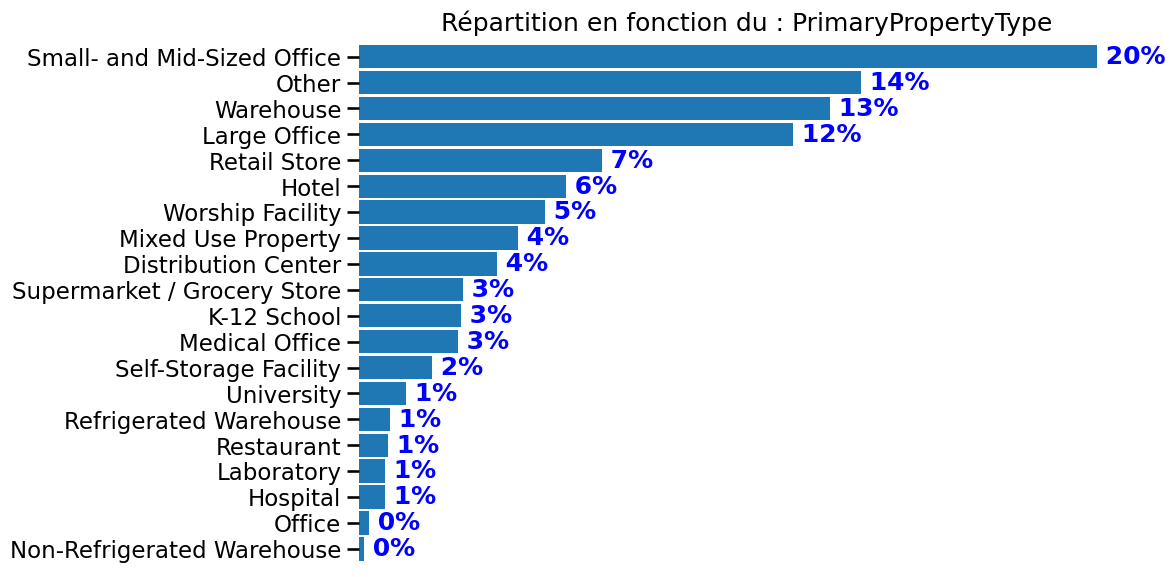

In [60]:
sns.set_context("talk")

for column in ['PrimaryPropertyType']:
    chaine = 'Répartition en fonction du : ' + column
    plt.figure(figsize=(10,7), dpi=100)
    df.loc[(df['BuildingType']=="NonResidential"),column].\
    value_counts(normalize=True, ascending = True).plot(kind='barh', width=0.9) 
    axes = plt.gca()
    axes.set_frame_on(False)
    axes.yaxis.grid(False) 
    plt.xticks([], []) 
    plt.title(chaine)

    for i, v in enumerate(df.loc[(df['BuildingType']=="NonResidential"),column].\
    value_counts(normalize=True, ascending = True)):
        plt.text(v, i, " "+str(int(round(v*100,0)))+"%", color='b', va='center', fontweight='bold')
        
    plt.show()

## NumberofBuildings
On observe les valeurs min et max
* 50 adresses avec 0 batiment
* 1 adresse avec 111 Batiments


In [61]:
df['NumberofBuildings'].value_counts(ascending=False)

1.0      1492
0.0        50
2.0        14
3.0        11
5.0         7
6.0         4
4.0         4
8.0         2
14.0        2
9.0         1
111.0       1
11.0        1
10.0        1
23.0        1
7.0         1
27.0        1
Name: NumberofBuildings, dtype: int64

### Min()

In [62]:
df['NumberofBuildings'].min()

0.0

In [63]:
df.loc[(df['NumberofBuildings'] == 0) , ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

PrimaryPropertyType  \
63                 Medical Office   
76    Small- and Mid-Sized Office   
160                     Warehouse   
201                  Large Office   
241   Small- and Mid-Sized Office   
264            Mixed Use Property   
278                  Large Office   
280                         Hotel   
291                         Other   
358                         Other   
365   Supermarket / Grocery Store   
417                         Other   
429            Mixed Use Property   
433                         Other   
477                  Large Office   
481   Small- and Mid-Sized Office   
488            Mixed Use Property   
494                  Retail Store   
544                     Warehouse   
608                     Warehouse   
809                    Laboratory   
985            Mixed Use Property   
1002                        Other   
1025                        Other   
1177                        Other   
1244                        Other   
1256               Medical Office   
1317                        Other   
1606                        Other   
2054             Worship Facility   
2115  Supermarket / Grocery Store   
2166                        Other   
2188       Refrigerated Warehouse   
2214  Small- and Mid-Sized Office   
2382                   Restaurant   
2441  Small- and Mid-Sized Office   
2482                     Hospital   
2564                 Retail Store   
2631  Small- and Mid-Sized Office   
2708  Small- and Mid-Sized Office   
2715  Small- and Mid-Sized Office   
2747  Small- and Mid-Sized Office   
2782                        Other   
2963                        Hotel   
3108                 Large Office   
3121                 Retail Store   
3155                        Other   
3205                   Laboratory   
3232                        Other   
3259  Small- and Mid-Sized Office   

                                      PropertyName  \
63                       Polyclinic North && South   
76                                           KCTS9   
160          Harbor Island: Warehouse E - DNRP-SWD   
201          Cox Media Group Seattle KIRO TV (322)   
241             University District Office Buiding   
264                                  Thaw Building   
278                       Fourth and Pike Building   
280                                  Motif Seattle   
291                                Meridian (East)   
358                                     Westbridge   
365                            Sam's Club #18-6687   
417                              Northgate Village   
429                                  1616 Eastlake   
433              McKinstry SEA - 220 S Hudson Shop   
477                               Starbucks Center   
481                                        INScape   
488                           2200 Westlake - SEDO   
494                             #8944 West Seattle   
544            Seattle Marine & Fishing Supply Co.   
608                         Seattle Pottery Supply   
809                              3000/3018 Western   
985   Lyon's Antique Mall - Windermere/Garlic Jims   
1002                                      EBBC LCW   
1025                         Amy Yee Tennis Center   
1177                         Seventeen Meters, LLC   
1244                               University Club   
1256               Northwest Kidney Center (21365)   
1317                           White and Hitchcock   
1606             Meadowbrook Community Center/Pool   
2054                 Phinney Ridge Lutheran Church   
2115                           OAKTREE PLAZA ASSOC   
2166           Southwest Teen Life Center and Pool   
2188                            Pacific Commercial   
2214                             1943 First Avenue   
2382     (ID25461) CHINA HARBOR RESTURANT & MARINA   
2441                            Buttnick City Loan   
2482                     Park West Skilled Nursing   
2564                        517 E Pike St Building   
2631                

In [64]:
# On remplace 0 par 1
df['NumberofBuildings'] = np.where((df.NumberofBuildings == 0), 1,df.NumberofBuildings)

### Max()

In [65]:
df['NumberofBuildings'].max()

111.0

In [66]:
df[df['NumberofBuildings']==111]

OSEBuildingID  DataYear BuildingType PrimaryPropertyType  \
3274        49967.0    2016.0       Campus          University   

                                   PropertyName                    Address  \
3274  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   

         City State  ZipCode TaxParcelIdentificationNumber  \
3274  Seattle    WA  98105.0                    1625049001   

      CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
3274                  4.0    NORTHEAST  47.65644 -122.31041     1900.0   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3274              111.0             0.0         9320156.0                 0.0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
3274               9320156.0        College/University     College/University   

      LargestPropertyUseTypeGFA  ... Comments  ComplianceStatus Outlier  \
3274                  9320156.0  ...      NaN         Compliant     NaN   

      TotalGHGEmissions GHGEmissionsIntensity                 USE  Name  \
3274           11140.56                   1.2  College/University   NaN   

      Center  Fitness  Food  Market  Bank  BANK  Hotel  Office  Sculpture  \
3274     NaN      NaN   NaN     NaN   NaN   NaN    NaN     NaN        NaN   

      Club Museum  Art Metro University  Hyatt_Place  Automobili_Italiane  
3274   NaN    NaN  NaN   NaN        NaN          NaN                  NaN  

[1 rows x 64 columns]

## NumberofFloors

In [67]:
df['NumberofFloors'].value_counts(ascending=False)

1.0     461
2.0     380
3.0     248
4.0     138
5.0      94
6.0      75
7.0      32
8.0      22
11.0     18
10.0     18
0.0      12
12.0      9
14.0      8
9.0       7
13.0      6
42.0      5
15.0      5
19.0      4
20.0      4
17.0      4
18.0      3
23.0      3
25.0      3
33.0      3
24.0      3
22.0      3
21.0      3
29.0      3
36.0      2
34.0      2
41.0      2
16.0      2
27.0      2
49.0      1
30.0      1
76.0      1
63.0      1
55.0      1
47.0      1
37.0      1
99.0      1
46.0      1
28.0      1
56.0      1
Name: NumberofFloors, dtype: int64

In [68]:
df[df['NumberofFloors'].isna()]

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
1647            NaN       NaN  NonResidential                 NaN   
1883            NaN       NaN  NonResidential                 NaN   
2814            NaN       NaN  NonResidential                 NaN   
3134            NaN       NaN             NaN               Other   

     PropertyName Address City State  ZipCode TaxParcelIdentificationNumber  \
1647          NaN     NaN  NaN   NaN      NaN                           NaN   
1883          NaN     NaN  NaN   NaN      NaN                           NaN   
2814          NaN     NaN  NaN   NaN      NaN                           NaN   
3134          NaN     NaN  NaN   NaN      NaN                           NaN   

      CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
1647                  NaN          NaN       NaN        NaN        NaN   
1883                  NaN          NaN       NaN        NaN        NaN   
2814                  NaN          NaN       NaN        NaN        NaN   
3134                  NaN          NaN       NaN        NaN        NaN   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1647                NaN             NaN               NaN                 NaN   
1883                NaN             NaN               NaN                 NaN   
2814                NaN             NaN               NaN                 NaN   
3134                NaN             NaN               NaN                 NaN   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
1647                     NaN                       NaN                    NaN   
1883                     NaN                       NaN                    NaN   
2814                     NaN                       NaN                    NaN   
3134                     NaN                       NaN                    NaN   

      LargestPropertyUseTypeGFA  ... Comments  ComplianceStatus Outlier  \
1647                        NaN  ...      NaN               NaN     NaN   
1883                        NaN  ...      NaN               NaN     NaN   
2814                        NaN  ...      NaN               NaN     NaN   
3134                        NaN  ...      NaN               NaN     NaN   

      TotalGHGEmissions GHGEmissionsIntensity  USE  Name  Center  Fitness  \
1647                NaN                   NaN  NaN   NaN     NaN      NaN   
1883                NaN                   NaN  NaN   NaN     NaN      NaN   
2814                NaN                   NaN  NaN   NaN     NaN      NaN   
3134                NaN                   NaN  NaN   NaN     NaN      NaN   

      Food  Market  Bank  BANK  Hotel  Office  Sculpture  Club Museum  Art  \
1647   NaN     NaN   NaN   NaN    NaN     NaN        NaN   NaN    NaN  NaN   
1883   NaN     NaN   NaN   NaN    NaN     NaN        NaN   NaN    NaN  NaN   
2814   NaN     NaN   NaN   NaN    NaN     NaN        NaN   NaN    NaN  NaN   
3134   NaN     NaN   NaN   NaN    NaN     NaN        NaN   NaN    NaN  NaN   

     Metro University  Hyatt_Place  Automobili_Italiane  
1647   NaN        NaN          NaN                  NaN  
1883   NaN        NaN          NaN                  NaN  
2814   NaN        NaN          NaN                  NaN  
3134   NaN        NaN          NaN                  NaN  

[4 rows x 64 columns]

In [69]:
df.dropna(subset=['NumberofFloors'], axis=0,inplace=True)

### NumberofFloors ==0

In [70]:
# 0
df[df['NumberofFloors'] == 0][['PropertyName','Address']]

PropertyName  \
166                                 Grand Hyatt Seattle   
487                                     Arnold Pavilion   
488                                2200 Westlake - SEDO   
564                                       Pacific Place   
1754                                HART First Hill LLC   
1993  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...   
3130                                       Sandpoint #5   
3131                                      Sandpoint #25   
3132                                      Sandpoint #29   
3168                                           Magnuson   
3273             Smilow Rainier Vista Boys & Girls Club   
3274          University of Washington - Seattle Campus   

                                Address  
166                         721 Pine St  
487                 1221 Madison Street  
488                  2200 Westlake Ave.  
564                     600 Pine Street  
1754               1124 Columbia Street  
1993                 1333 AIRPORT WAY S  
3130                   7561 63rd Ave NE  
3131                    6222 NE 74th St  
3132                    6200 NE 74th ST  
3168             7400 Sand Point Way NE  
3273  4520 Martin Luther King Jr. Way S  
3274          NE 45th St & Brooklyn Ave

* Grand Hyatt Seattle >> 30 étages
* Arnold Pavilion > 10 étages
* Pacific Place >> 5 étages
* HART First Hill LLC >> 5 étages
* Sandpoint #25	 > 2 étages
* Sandpoint #29	 > 2 étages
* Magnuson>> 1 étage
* University of Washington - Seattle Campus>> 2 étages

Il ne doit rester que
* (ID#24086)Campus1:KC Metro 
* Sandpoint #5	
* Smilow Rainier Vista Boys & Girls Club

In [71]:
df.loc[166,'NumberofFloors'] = 30
df.loc[488,'NumberofFloors'] = 2
df.loc[487,'NumberofFloors'] = 10
df.loc[564, 'NumberofFloors'] = 5
df.loc[1754, 'NumberofFloors'] = 5
df.loc[3131, 'NumberofFloors'] = 2
df.loc[3132, 'NumberofFloors'] = 2
df.loc[3168, 'NumberofFloors'] = 1
df.loc[3274, 'NumberofFloors'] = 2

In [72]:
df[df['NumberofFloors'] == 0][['PropertyName','Address']]

PropertyName  \
1993  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...   
3130                                       Sandpoint #5   
3273             Smilow Rainier Vista Boys & Girls Club   

                                Address  
1993                 1333 AIRPORT WAY S  
3130                   7561 63rd Ave NE  
3273  4520 Martin Luther King Jr. Way S

### NumberofFloors == 99

In [73]:
# 99 : erreur?
df[df['NumberofFloors'] == 99]

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
1359        21611.0    2016.0  NonResidential    Worship Facility   

                        PropertyName                   Address     City State  \
1359  Seattle Chinese Baptist Church  5801 Beacon Avenue South  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
1359  98108.0                    2124049098                  2.0   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
1359  GREATER DUWAMISH  47.55072 -122.30265     1977.0                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1359            99.0           21948.0                 0.0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
1359                 21948.0          Worship Facility       Worship Facility   

      LargestPropertyUseTypeGFA  ... Comments  ComplianceStatus Outlier  \
1359                    21948.0  ...      NaN         Compliant     NaN   

      TotalGHGEmissions GHGEmissionsIntensity               USE  Name  Center  \
1359               2.27                   0.1  Worship Facility   NaN     NaN   

      Fitness  Food  Market  Bank  BANK  Hotel  Office  Sculpture  Club  \
1359      NaN   NaN     NaN   NaN   NaN    NaN     NaN        NaN   NaN   

     Museum  Art Metro University  Hyatt_Place  Automobili_Italiane  
1359    NaN  NaN   NaN        NaN          NaN                  NaN  

[1 rows x 64 columns]

Ce bâtiment correspond à la Chinese Baptist Church de Seattle. C'est une erreur de saisie, on transformera 99 en 0.

In [74]:
df['NumberofFloors'] = np.where((df.NumberofFloors == 99), 0,df.NumberofFloors)

In [75]:
df.shape

(1595, 64)

## Property UseType GFA

**Le GFA**, ou "surface de plancher autorisée", est une mesure de la surface de plancher d'un bâtiment. Cela peut inclure la surface de tous les étages du bâtiment, y compris les sous-sols et les étages supérieurs, mais exclut les garages, les terrasses et les balcons. 

In [76]:
# définition des variables GFA
GFA_values = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                          'ThirdLargestPropertyUseTypeGFA', 'PropertyGFATotal', 
                          'PropertyGFABuilding(s)', 'PropertyGFAParking']

count    1.589000e+03
mean     1.000076e+05
std      2.821358e+05
min      5.656000e+03
25%      2.569100e+04
50%      4.407800e+04
75%      9.243700e+04
max      9.320156e+06
Name: LargestPropertyUseTypeGFA, dtype: float64


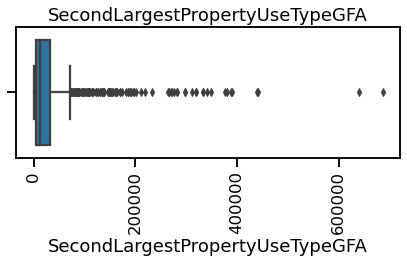

count       808.000000
mean      37413.787496
std       70897.179534
min           0.000000
25%        5120.000000
50%       12000.000000
75%       32060.000000
max      686750.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64


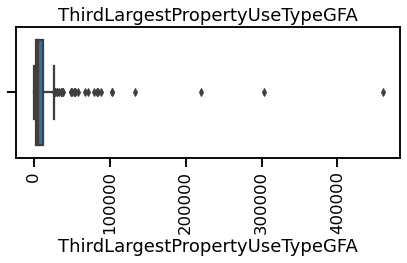

count       320.000000
mean      14396.263746
std       36675.985306
min           0.000000
25%        2500.000000
50%        5705.500000
75%       12369.250000
max      459748.000000
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64


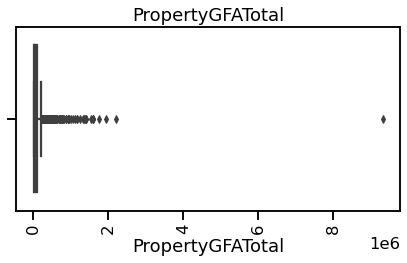

count    1.595000e+03
mean     1.194058e+05
std      3.013455e+05
min      1.128500e+04
25%      2.939700e+04
50%      4.924300e+04
75%      1.050805e+05
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64


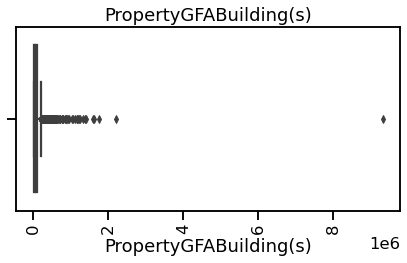

count    1.595000e+03
mean     1.064155e+05
std      2.883498e+05
min      1.092500e+04
25%      2.841100e+04
50%      4.723700e+04
75%      9.518700e+04
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64


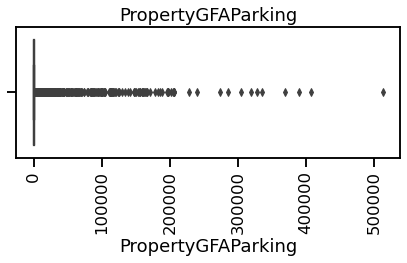

count      1595.000000
mean      12990.341066
std       42764.140924
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64


In [77]:
#Create a boxplot
for col in GFA_values:
    sns.boxplot(df[col])
    plt.title(col)
    plt.xticks(rotation='90')
    plt.tight_layout()
    plt.show()
    print(df[col].describe())

In [78]:
# min value
for col in GFA_values:
    print(f'{col :-<70} {df[col].min()}')

LargestPropertyUseTypeGFA--------------------------------------------- 5656.0
SecondLargestPropertyUseTypeGFA--------------------------------------- 0.0
ThirdLargestPropertyUseTypeGFA---------------------------------------- 0.0
PropertyGFATotal------------------------------------------------------ 11285.0
PropertyGFABuilding(s)------------------------------------------------ 10925.0
PropertyGFAParking---------------------------------------------------- 0.0


In [79]:
#nan
for col in GFA_values:
    print(f'{col :-<70} {df[col].isna().sum()}')

LargestPropertyUseTypeGFA--------------------------------------------- 6
SecondLargestPropertyUseTypeGFA--------------------------------------- 787
ThirdLargestPropertyUseTypeGFA---------------------------------------- 1275
PropertyGFATotal------------------------------------------------------ 0
PropertyGFABuilding(s)------------------------------------------------ 0
PropertyGFAParking---------------------------------------------------- 0


**SecondLargestPropertyUseType(GFA)** et **ThirdLargestPropertyUseType(GFA)** désignent les surfaces des 2e et 3e utilisation du bâtiment, Ici nous faisons le choix de remplacer les nan par 0

### Drop valeurs abérrantes de GFA

In [80]:
df.loc[(df['LargestPropertyUseTypeGFA'] > df['PropertyGFATotal']), ['PropertyName', 'LargestPropertyUseTypeGFA','PropertyGFATotal']]

PropertyName  LargestPropertyUseTypeGFA  \
11                        5679-W Seattle                   336640.0   
22                Graham Hill Elementary                    58916.0   
30                    Jane Addams Middle                   164229.0   
31                   John Hay Elementary                    55166.0   
35                          Plant 2 Site                   757027.0   
...                                  ...                        ...   
3294               Audi Seattle UVA Bldg                    83600.0   
3319           Hilton Garden Inn Seattle                   159500.0   
3322  Honda of Seattle/Toyota of Seattle                   202171.0   
3347              Hamlin Robinson School                    45728.0   
3359                        Burke Museum                    68916.0   

      PropertyGFATotal  
11            333176.0  
22             56228.0  
30            160645.0  
31             51582.0  
35            494835.0  
...                ...  
3294           33648.0  
3319          144614.0  
3322          108036.0  
3347           45000.0  
3359           68072.0  

[206 rows x 3 columns]

In [81]:
df.loc[(df['PropertyGFABuilding(s)'] > df['PropertyGFATotal']), ['PropertyName', 'PropertyGFABuilding(s)','PropertyGFATotal']]

Empty DataFrame
Columns: [PropertyName, PropertyGFABuilding(s), PropertyGFATotal]
Index: []

In [82]:
df.loc[(df['PropertyGFAParking'] > df['PropertyGFATotal']), ['PropertyName', 'PropertyGFAParking','PropertyGFATotal']]

Empty DataFrame
Columns: [PropertyName, PropertyGFAParking, PropertyGFATotal]
Index: []

In [83]:
df.loc[(df['SecondLargestPropertyUseTypeGFA'] > df['LargestPropertyUseTypeGFA']), ['PropertyName', 'SecondLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA']]

Empty DataFrame
Columns: [PropertyName, SecondLargestPropertyUseTypeGFA, LargestPropertyUseTypeGFA]
Index: []

In [84]:
df.loc[(df['ThirdLargestPropertyUseTypeGFA'] > df['LargestPropertyUseTypeGFA']), ['PropertyName', 'ThirdLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA']]

Empty DataFrame
Columns: [PropertyName, ThirdLargestPropertyUseTypeGFA, LargestPropertyUseTypeGFA]
Index: []

In [85]:
df.loc[(df['ThirdLargestPropertyUseTypeGFA'] > df['SecondLargestPropertyUseTypeGFA']), ['PropertyName', 'ThirdLargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA']]

Empty DataFrame
Columns: [PropertyName, ThirdLargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA]
Index: []

In [86]:
# élimination des builting ou la surface totale est stictement inférieure à la surface de la plus grande  utilisation
df = df.loc[(df['LargestPropertyUseTypeGFA'] <= df['PropertyGFATotal'])]

### PropertyUseType == Parking

In [87]:
df.loc[(df['LargestPropertyUseType'] == 'Parking') & (df['PropertyGFAParking'] == 0), 
    ['PrimaryPropertyType', 'PropertyName', 'LargestPropertyUseType','LargestPropertyUseTypeGFA','PropertyGFAParking', 'USE']]

PrimaryPropertyType                PropertyName LargestPropertyUseType  \
301   Mixed Use Property  Securities Building Campus                Parking   
488   Mixed Use Property        2200 Westlake - SEDO                Parking   
2095               Other   Automobili Italiane, Inc.                Parking   
2798  Mixed Use Property           Arboretum Court 2                Parking   
2800  Mixed Use Property             Trader Joes/AAA                Parking   

      LargestPropertyUseTypeGFA  PropertyGFAParking  \
301                    155000.0                 0.0   
488                    385196.0                 0.0   
2095                    18000.0                 0.0   
2798                    11021.0                 0.0   
2800                    24288.0                 0.0   

                                 USE  
301                      Data Center  
488                 Financial Office  
2095                         Parking  
2798  Fitness Center/Health Club/Gym  
2800                          Office

Nous retrouvons des données GFA parking incohérentes, nous supprimons ces 5 batiments

In [88]:
df.loc[301, 'PropertyGFAParking'] = np.nan
df.loc[488, 'PropertyGFAParking'] = np.nan
df.loc[2095, 'PropertyGFAParking'] = np.nan
df.loc[2798, 'PropertyGFAParking'] = np.nan
df.loc[2800, 'PropertyGFAParking'] = np.nan

In [89]:
df.dropna(subset=['PropertyGFAParking'], axis=0,inplace=True)

In [90]:
df.loc[(df['SecondLargestPropertyUseType'] == 'Parking') & (
    df['SecondLargestPropertyUseTypeGFA'] == 0) & (df['PropertyGFAParking'] != 0),
    ['PropertyName', 'Address', 'USE', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFAParking']]

PropertyName  \
155                                     CenturyLink   
319                 1100 Dexter-RREEF SeaDPD ID 456   
356                              70100179-Lake City   
401                    Safeway 1845 - Greenwood Ave   
875                                     800 Stewart   
1522                       Safeway 1477 - Market St   
2896                   Safeway 1550 - Roosevelt Way   
2985  The Seattle Public Library - Greenwood Branch   

                        Address                                    USE  \
155   800 Occidental Ave. South  Other - Entertainment/Public Assembly   
319    1100 Dexter Avenue North                                 Office   
356      13000 Lake City Way NE                                Parking   
401        8704 Greenwood Ave N                                Parking   
875              800 stewart st                                 Office   
1522          1423 NW Market St                                Parking   
2896      7300 Roosevelt Way NE                                Parking   
2985       8016 Greenwood Ave N                                Library   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
155                       Parking                              0.0   
319                       Parking                              0.0   
356                       Parking                              0.0   
401                       Parking                              0.0   
875                       Parking                              0.0   
1522                      Parking                              0.0   
2896                      Parking                              0.0   
2985                      Parking                              0.0   

      PropertyGFAParking  
155             327680.0  
319             115228.0  
356             187878.0  
401               7450.0  
875              11250.0  
1522             43035.0  
2896             38585.0  
2985             14570.0

In [91]:
df.loc[155,'SecondLargestPropertyUseTypeGFA'] = 327680
df.loc[319,'SecondLargestPropertyUseTypeGFA'] = 115228
df.loc[356,'SecondLargestPropertyUseTypeGFA'] = 187878
df.loc[401,'SecondLargestPropertyUseTypeGFA'] = 7450
df.loc[875,'SecondLargestPropertyUseTypeGFA'] = 11250
df.loc[1522,'SecondLargestPropertyUseTypeGFA'] = 43035
df.loc[2896,'SecondLargestPropertyUseTypeGFA'] = 38585
df.loc[2985,'SecondLargestPropertyUseTypeGFA'] = 14570

In [92]:
df.loc[(df['ThirdLargestPropertyUseType'] == 'Parking') &
       (df['ThirdLargestPropertyUseTypeGFA'] == 0) & (df['PropertyGFAParking'] != 0),
       ['PropertyName', 'Address', 'USE', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA','PropertyGFAParking']]

PropertyName                 Address      USE  \
356  70100179-Lake City  13000 Lake City Way NE  Parking   

    ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
356                     Parking                             0.0   

     PropertyGFAParking  
356            187878.0

In [93]:
df.loc[356,'ThirdLargestPropertyUseTypeGFA'] = 187878

### Fillna()

In [94]:
#df['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
#df['ThirdLargestPropertyUseTypeGFA'].fillna(0, inplace=True)

## Energy Feature
* SiteEUI (kBtu/sf): EUI signifie "Indice d'Utilisation de l'Energie". Cette unité mesure l'utilisation totale d'énergie d'un site par unité de surface. Elle est souvent utilisée pour comparer l'efficacité énergétique de différents bâtiments.
<br>
<br>
* SiteEUIWN (kBtu/sf): Cette unité est similaire à SiteEUI, mais elle prend en compte les variations climatiques en utilisant un facteur de correction appelé "facteur de normalisation".
<br>
<br>
* SourceEUI (kBtu/sf): Cette unité mesure l'utilisation d'énergie d'une source spécifique (par exemple, l'électricité ou le gaz naturel) par unité de surface.
<br>
<br>
* SourceEUIWN (kBtu/sf): Cette unité est similaire à SourceEUI, mais elle utilise le facteur de normalisation pour tenir compte des variations climatiques.
<br>
<br>
* SiteEnergyUse (kBtu): Cette unité mesure l'utilisation totale d'énergie d'un site.
<br>
<br>
* SiteEnergyUseWN (kBtu): Cette unité est similaire à SiteEnergyUse, mais elle utilise le facteur de normalisation pour tenir compte des variations climatiques.
<br>
<br>
* SteamUse (kBtu): Cette unité mesure l'utilisation de vapeur d'eau pour fournir de l'énergie à un site.
<br>
<br>
* Electricity (kWh): Cette unité mesure l'utilisation d'électricité en kilowatts-heure.
<br>
<br>
* Electricity (kBtu): Cette unité mesure l'utilisation d'électricité en unités de chaleur.
<br>
<br>
* NaturalGas (therms): Cette unité mesure l'utilisation de gaz naturel en therms. Un therm est une unité de mesure de l'énergie qui correspond à la quantité de chaleur nécessaire pour chauffer un pied cube d'eau de 100 degrés Fahrenheit à l'aide de gaz naturel.
<br>
<br>
* NaturalGas (kBtu): Cette unité mesure l'utilisation de gaz naturel en unités de chaleur.

Un kBtu est égal à 1 000 Btu, qui est une unité d'énergie souvent utilisée aux États-Unis pour mesurer la production de chaleur des appareils et la capacité de chauffage et de refroidissement des systèmes 

On ne conservce que les mesures interessantes pour la suite de notre étude à savoir :  SiteEUI (kBtu/sf), SourceEUI (kBtu/sf), SourceEUI (kBtu/sf),SteamUse(kBtu), Electricity (kBtu) et NaturalGas (kBtu)

In [95]:
Energy = ['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)',
          'SiteEnergyUse(kBtu)','SteamUse(kBtu)',
          'Electricity(kBtu)','NaturalGas(kBtu)']

In [96]:
df[Energy].isna().sum()

SiteEUI(kBtu/sf)       1
SourceEUI(kBtu/sf)     0
SiteEnergyUse(kBtu)    0
SteamUse(kBtu)         0
Electricity(kBtu)      0
NaturalGas(kBtu)       0
dtype: int64

### Missing value

In [97]:
df.loc[(df['SiteEUI(kBtu/sf)'].isna() == True), 
['PrimaryPropertyType', 'PropertyName', 'Address', 'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)','PropertyGFATotal']]

PrimaryPropertyType                        PropertyName      Address  \
304               Other  Washington State Convention Center  705 Pike St   

     SiteEUI(kBtu/sf)  SiteEnergyUse(kBtu)  PropertyGFATotal  
304               NaN                  0.0         1400000.0

On remarque que SiteEnergyUse(kBtu) est à 0, nous allons donc chercher à connaitre cette a valeur avant de calculer SiteEUI(kBtu/sf)

In [98]:
df.loc[(df['SiteEUI(kBtu/sf)'] == 0), 
['PrimaryPropertyType', 'PropertyName', 'Address', 'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)','PropertyGFATotal']]

PrimaryPropertyType                    PropertyName               Address  \
28          K-12 School                  Meany Building  301/300 21st Ave. E.   
95          K-12 School             B.F. Day Elementary   3921 Linden Ave. N.   
133         K-12 School                  Whitman Middle    9201 15th Ave. NW.   
139         K-12 School               Washington Middle       2101 S. Jackson   
614         K-12 School       Bailey Gatzert Elementary    1301 E. Yesler Way   
630         K-12 School               Leschi Elementary         135 32nd Ave.   
746               Other  Welcome Home Society - PriceCo    13537 Aurora Ave N   

     SiteEUI(kBtu/sf)  SiteEnergyUse(kBtu)  PropertyGFATotal  
28                0.0                  0.0          126351.0  
95                0.0                  0.0           66588.0  
133               0.0                  0.0          160270.0  
139               0.0                  0.0          136188.0  
614               0.0                  0.0           52924.0  
630               0.0                  0.0           55353.0  
746               0.0                  0.0           29924.0

### SiteEnergyUse(kBtu)

Il suffit d'addictionner l'électricité, le gaz et d'autres sources d'énergie utilisées sur le site pour obtenir l'utilisation totale de l'énergie du site.

In [99]:
df.loc[(df['SiteEnergyUse(kBtu)'] == 0),
       ['PrimaryPropertyType', 'PropertyName', 'Address', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']]

PrimaryPropertyType                        PropertyName  \
28          K-12 School                      Meany Building   
95          K-12 School                 B.F. Day Elementary   
133         K-12 School                      Whitman Middle   
139         K-12 School                   Washington Middle   
304               Other  Washington State Convention Center   
614         K-12 School           Bailey Gatzert Elementary   
630         K-12 School                   Leschi Elementary   
746               Other      Welcome Home Society - PriceCo   

                  Address  SiteEnergyUse(kBtu)  Electricity(kBtu)  \
28   301/300 21st Ave. E.                  0.0                0.0   
95    3921 Linden Ave. N.                  0.0          2104286.0   
133    9201 15th Ave. NW.                  0.0                0.0   
139       2101 S. Jackson                  0.0                0.0   
304           705 Pike St                  0.0                0.0   
614    1301 E. Yesler Way                  0.0          1957268.0   
630         135 32nd Ave.                  0.0          1433596.0   
746    13537 Aurora Ave N                  0.0                0.0   

     NaturalGas(kBtu)  SteamUse(kBtu)  
28                0.0             0.0  
95                0.0             0.0  
133         4318917.0             0.0  
139         3217877.0             0.0  
304               0.0             0.0  
614               0.0             0.0  
630               0.0             0.0  
746               0.0             0.0

**Washington State Convention Center** était notre batiment en Nan, on remarque aucune donnée en Electricity(kBtu) ou NaturalGas(kBtu) ou stream, nous suprimons donc ce batiment

Nous allons éliminer les autres batiments ou la consommation d'énergie est à 0 

In [100]:
df.loc[28,'SiteEnergyUse(kBtu)'] = np.nan
df.loc[304,'SiteEnergyUse(kBtu)'] = np.nan
df.loc[746,'SiteEnergyUse(kBtu)'] = np.nan

In [101]:
df.dropna(subset=['SiteEnergyUse(kBtu)'], axis=0,inplace=True)

Nous allons pouvoir renseigner la feature SiteEnergyUse(kBtu) en fonction des données dont nous disposons en Electricity(kBtu) ou NaturalGas(kBtu)
* pour rappel : SiteEnergyUse(kBtu =  Electricity(kBtu) + NaturalGas(kBtu) + SteamUse(kBtu)

In [102]:
df.loc[95,'SiteEnergyUse(kBtu)'] = 2104286.0
df.loc[133,'SiteEnergyUse(kBtu)'] = 4318917.0
df.loc[139,'SiteEnergyUse(kBtu)'] = 3217877.0
df.loc[614,'SiteEnergyUse(kBtu)'] = 1957268.0
df.loc[630,'SiteEnergyUse(kBtu)'] = 1433596.0

In [103]:
df[Energy].isna().sum()

SiteEUI(kBtu/sf)       0
SourceEUI(kBtu/sf)     0
SiteEnergyUse(kBtu)    0
SteamUse(kBtu)         0
Electricity(kBtu)      0
NaturalGas(kBtu)       0
dtype: int64

### Vérification SiteEnergyUse(kBtu) est différent de 0 alors que les sources d'énergie ont 0

In [104]:
df.loc[(df['SiteEnergyUse(kBtu)'] != 0) & (df['Electricity(kBtu)'] == 0) & (df['NaturalGas(kBtu)'] == 0) & (df['SteamUse(kBtu)'] == 0),
       ['PrimaryPropertyType', 'PropertyName', 'Address', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']]

PrimaryPropertyType               PropertyName  \
513  Supermarket / Grocery Store  IUC- Whole Foods Interbay   

                   Address  SiteEnergyUse(kBtu)  Electricity(kBtu)  \
513  2001 15th Avenue West           12525174.0                0.0   

     NaturalGas(kBtu)  SteamUse(kBtu)  
513               0.0             0.0

In [105]:
df.loc[513,'SiteEnergyUse(kBtu)'] = np.nan

In [106]:
df.dropna(subset=['SiteEnergyUse(kBtu)'], axis=0,inplace=True)

### SiteEUI(kBtu/sf)
Site EUI (kBtu/sf) = SiteEnergyUse (kBtu) / Building Area (sf)

In [107]:
df.loc[(df['SiteEUI(kBtu/sf)'] == 0), 
['PrimaryPropertyType', 'PropertyName', 'Address', 'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)','PropertyGFATotal']]

PrimaryPropertyType               PropertyName              Address  \
95          K-12 School        B.F. Day Elementary  3921 Linden Ave. N.   
133         K-12 School             Whitman Middle   9201 15th Ave. NW.   
139         K-12 School          Washington Middle      2101 S. Jackson   
614         K-12 School  Bailey Gatzert Elementary   1301 E. Yesler Way   
630         K-12 School          Leschi Elementary        135 32nd Ave.   

     SiteEUI(kBtu/sf)  SiteEnergyUse(kBtu)  PropertyGFATotal  
95                0.0            2104286.0           66588.0  
133               0.0            4318917.0          160270.0  
139               0.0            3217877.0          136188.0  
614               0.0            1957268.0           52924.0  
630               0.0            1433596.0           55353.0

In [108]:
df.loc[95,'SiteEUI(kBtu/sf)'] = 2104286.0/66588.0
df.loc[133,'SiteEUI(kBtu/sf)'] = 4318917.0/160270.0
df.loc[139,'SiteEUI(kBtu/sf)'] = 3217877.0/136188.0
df.loc[614,'SiteEUI(kBtu/sf)'] = 1957268.0/52924.0
df.loc[630,'SiteEUI(kBtu/sf)'] = 1433596.0/55353.0

## Drop Feature

In [109]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [110]:
pd.crosstab(df['ComplianceStatus'],
            df['DefaultData'])

DefaultData                   False  True 
ComplianceStatus                          
Compliant                      1293      0
Error - Correct Default Data      0     64
Missing Data                      5      0
Non-Compliant                    12      0

In [111]:
df.drop(['Address', 'City', 'State', 'ZipCode',
         'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
         'YearsENERGYSTARCertified', 'USE', 'Name',
         'Center', 'Fitness', 'Food', 'Market', 'Bank', 'BANK', 'Hotel',
         'Office', 'Sculpture', 'Club', 'Museum', 'Art', 'Metro', 'University',
         'Hyatt_Place', 'Automobili_Italiane', 'Comments', 'SiteEUIWN(kBtu/sf)', 
         'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)', 'Electricity(kWh)', 
         'NaturalGas(therms)', 'Outlier', 'ComplianceStatus', 'Neighborhood', 'DefaultData'], axis=1, inplace=True)

Colonnes n'apportant pas d'information pour la suite de notre étude, elles peuvent etre interessantes pour une analyse plus descriptives car elles se focalisent sur l'emplacement :
* la feature 'OSEBuildingID' nous donne un ID, nous utiliserons l'index du Dataframe
* Les features "City" et "State" comportent toujours les mêmes valeurs (Seattle, WA).
* Les features "Adress", "ZipCode" , 'TaxParcelIdentificationNumber'et 'CouncilDistrictCode'donnent des informations sur la localisation. Nous gardons uniquement Neighborhood, Latitude/Longitude ainsi pouvoir réaliser des visualisations avec geopanda
* Les feature "DefaultData" et 'ComplianceStatus' donnent des informations sur l'ajout de valeurs par défaut, mais sans préciser laquelle.
* La feature 'Outlier' doit aider à trouver les outliers, nous ferons notre propre étude
* La feature 'ListOfAllPropertyUseTypes'


## Duplicate value

In [112]:
df.duplicated(keep=False).value_counts()

False    1374
dtype: int64

In [113]:
df.duplicated(subset=['OSEBuildingID']).value_counts()

False    1374
dtype: int64

Notre jeu de donnée de comporte pas de doublons, nous pouvons passer à la partie Feature Engineering

# Feature Engineering

## Build Date 

In [114]:
df['Build_Age'] = df['DataYear'] - df['YearBuilt']

In [115]:
df['Build_Age'].max()

116.0

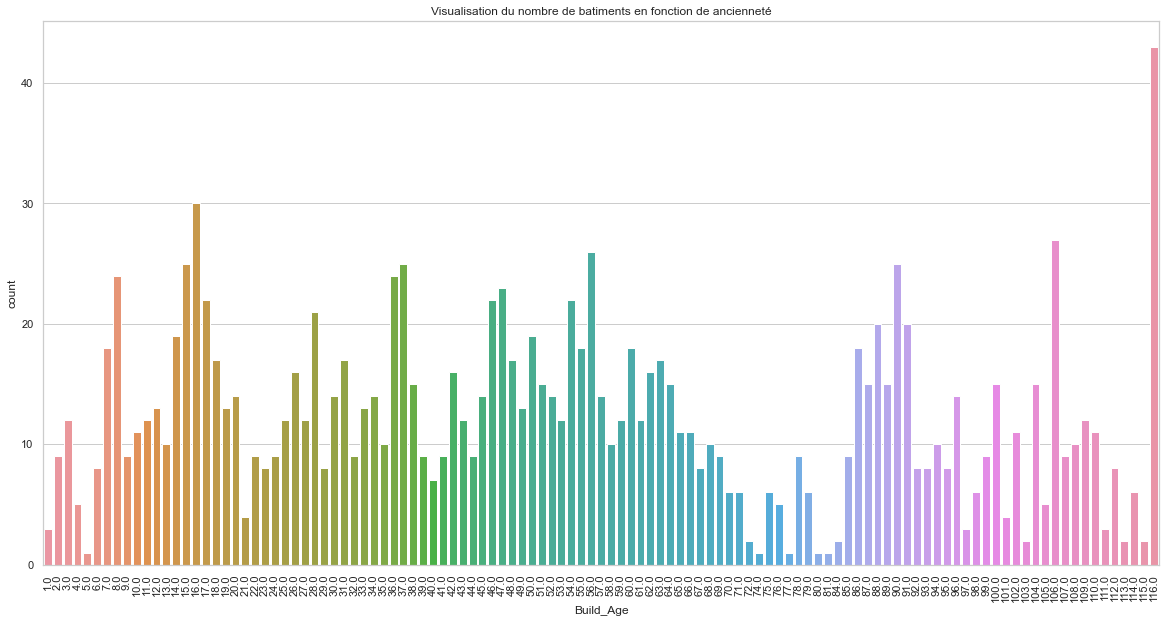

In [116]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.set_style('whitegrid')
sns.countplot(x='Build_Age', data=df).set(title='Visualisation du nombre de batiments en fonction de ancienneté')
plt.tick_params(axis='x', rotation=90)
plt.show()

In [117]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Build_Age'],
      dtype='object')

In [118]:
df.drop(['OSEBuildingID', 'DataYear','YearBuilt'], axis=1, inplace=True)

## Surface avec GFA

In [119]:
df = df.assign(Diff_surface=lambda x: (x['PropertyGFATotal'] -
               x['PropertyGFAParking'] - x['PropertyGFABuilding(s)']))

In [120]:
df['Diff_surface'].value_counts()

0.0    1374
Name: Diff_surface, dtype: int64

Nous trouvons bien que tous nos batiments ou la surface totale est égale à la surface des batiments + surface du parking

## Surface /étage

In [121]:
df = df.assign(surface_Floor=lambda x: round(x['PropertyGFABuilding(s)'] / x['NumberofFloors'],2))

## Geopandas

In [122]:
# Create a geometry column by constructing Point objects from the lon and lat columns
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

In [123]:
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [124]:
gdf.crs

In [125]:
gdf = gdf[gdf.is_valid == True]

<AxesSubplot:>

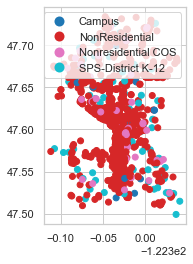

In [126]:
gdf['geometry'].centroid
gdf.plot(column = "BuildingType",legend=True)

In [127]:
df.drop(['Longitude', 'Latitude'], axis=1, inplace=True)

Nous pouvons également calculer la surface moyenne par bâtiment et par étage

check si dans les résidential il n'y a pas des property type à usage non résidential

Other dans property type, renseigner trouver l'info

faire une condition pour conserver les résidential avec mauvaise étiquette

Total   Percent
ThirdLargestPropertyUseTypeGFA    1073  0.780932
SecondLargestPropertyUseTypeGFA    634  0.461426
ENERGYSTARScore                    468  0.340611
surface_Floor                        0  0.000000
Diff_surface                         0  0.000000
Build_Age                            0  0.000000
GHGEmissionsIntensity                0  0.000000
TotalGHGEmissions                    0  0.000000
NaturalGas(kBtu)                     0  0.000000
Electricity(kBtu)                    0  0.000000
SteamUse(kBtu)                       0  0.000000
SiteEnergyUse(kBtu)                  0  0.000000
SourceEUI(kBtu/sf)                   0  0.000000
SiteEUI(kBtu/sf)                     0  0.000000
BuildingType                         0  0.000000
PrimaryPropertyType                  0  0.000000
ThirdLargestPropertyUseType          0  0.000000
SecondLargestPropertyUseType         0  0.000000
LargestPropertyUseTypeGFA            0  0.000000
LargestPropertyUseType               0  0.000000
ListOfAllPropertyUseTypes            0  0.000000
PropertyGFABuilding(s)               0  0.000000
PropertyGFAParking                   0  0.000000
PropertyGFATotal                     0  0.000000
NumberofFloors                       0  0.000000
NumberofBuildings                    0  0.000000
PropertyName                         0  0.000000
geometry                             0  0.000000

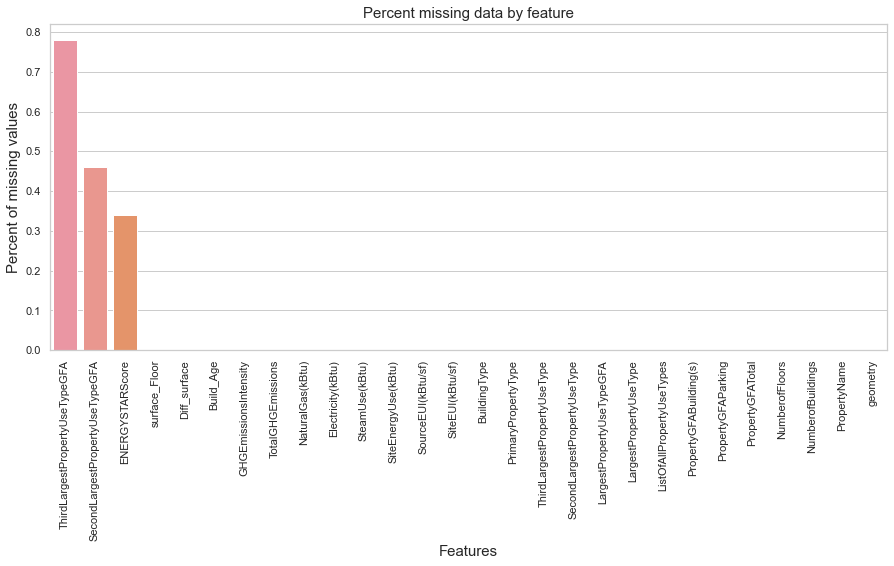

In [128]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

In [129]:
df.drop(['ENERGYSTARScore','ThirdLargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA'],axis=1,inplace=True)

# Analyse univariée

In [130]:
import scipy.stats as stats

In [131]:
# les données au format numérique sont listées dans data_num 
data_num = df.select_dtypes('number').columns

In [132]:
data_num

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Build_Age', 'Diff_surface', 'surface_Floor'],
      dtype='object')

In [133]:
data_cat = ['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType']

In [134]:
df_log = df.copy()

## La transformation Logarithmique
La transformation logarithmique consiste tout simplement à appliquer la fonction log à chacune des valeurs de la variable à transformer. Vous utilisez ensuite dans votre analyse la nouvelle variable constituée des résultats de la fonction log au lieu des données originales. Cette transformation a un impact marqué sur la distribution d'une variable. Elle permet en général de rapprocher des valeurs extrêmes pour obtenir des graphes de distribution moins étendus.

In [135]:
log_col = ['PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
           'LargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
           'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
           'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
           'GHGEmissionsIntensity']

In [136]:
def log(columns):
    # on passe au log les variables sélectionnées dans columns
    for column in columns:
        shift = 1 - df_log[column].min()
        df_log[column] = df_log[column].apply(lambda x: np.log(x + shift))

In [137]:
log(log_col)

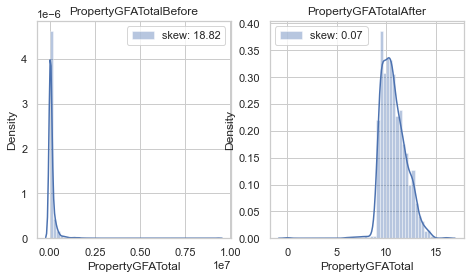

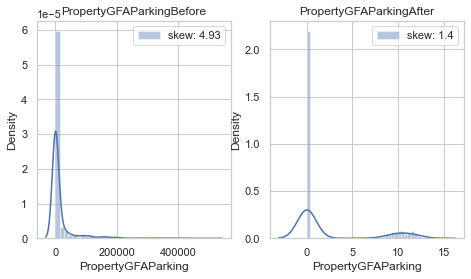

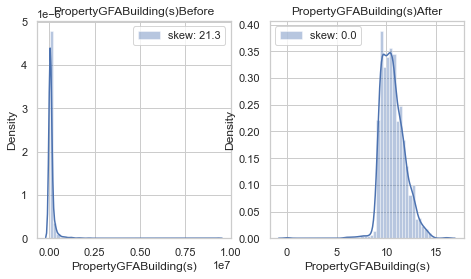

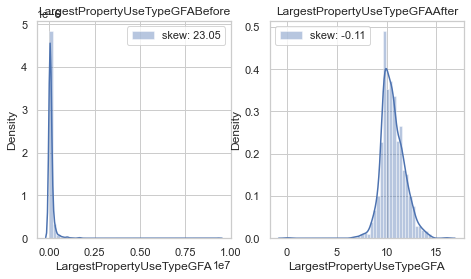

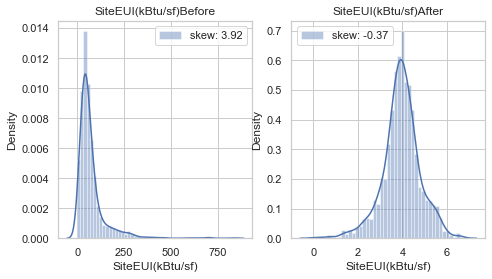

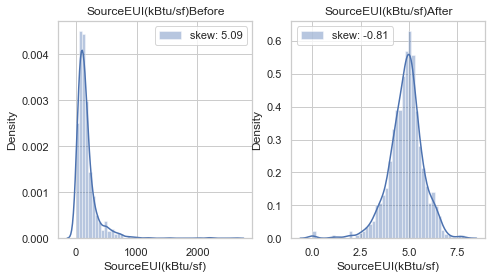

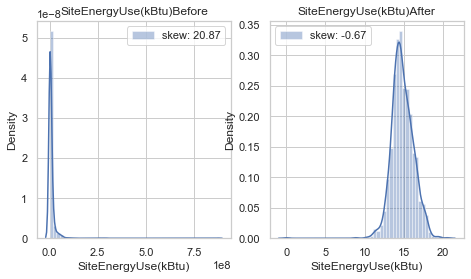

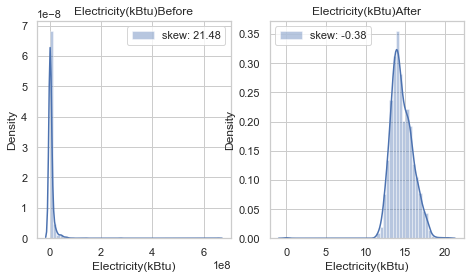

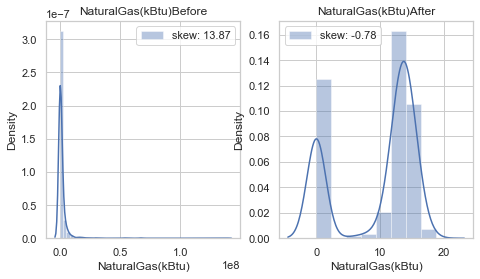

In [138]:
# réprésentation avec un displot avant/après et un boxplot avant/après
for col in log_col :
    plt.figure(figsize=(16, 4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: "+str(np.round(df[col].skew(),2)))
    plt.title(col + "Before")
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_log [col], label="skew: "+str(np.round(df_log [col].skew(),2)))
    plt.title(col + "After")
    plt.legend()
    

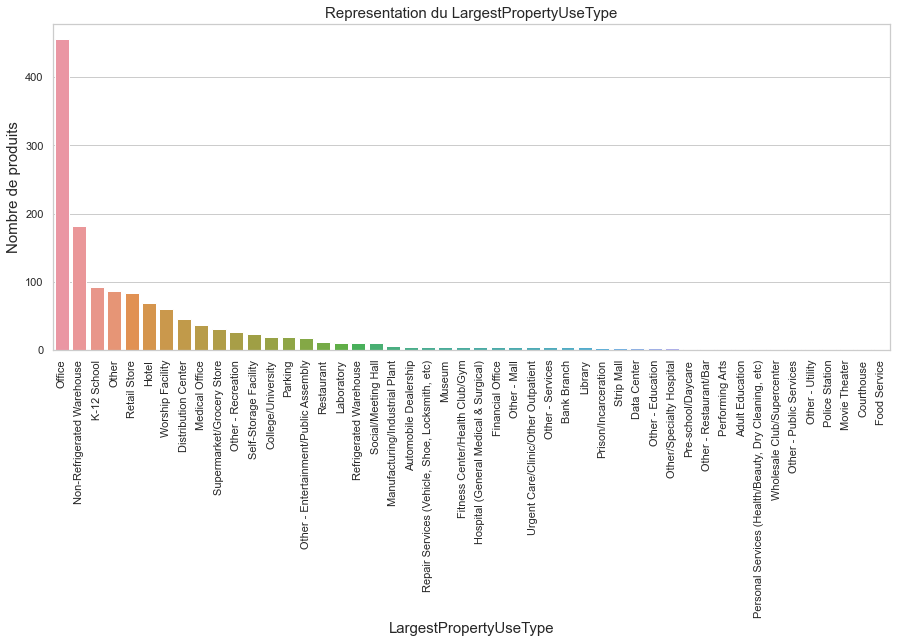

In [139]:
for col in data_cat:
    plt.figure(figsize=(15,6))
    sns.countplot(x=col,data=df_log, order = df_log[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Nombre de produits', fontsize=15)
    plt.title('Representation du '+  col, fontsize=15)
    plt.show()

In [140]:
# pairplot
#sns.pairplot(df)

# Analyse Bivariée

In [141]:
# les moyennes des nutrition_grade par features
df_gb = df_log.groupby(["BuildingType"]).mean()

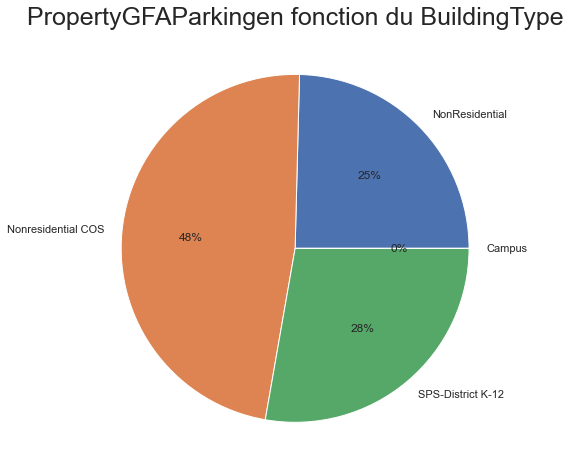

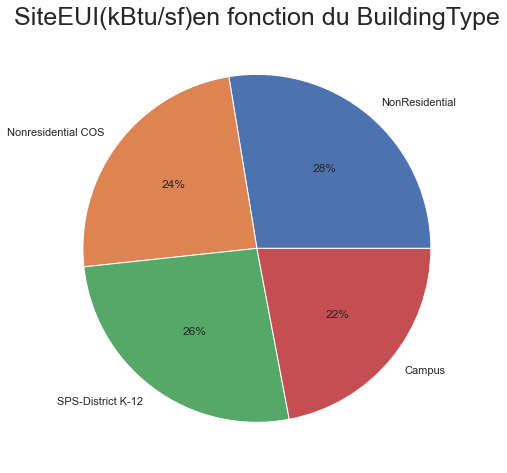

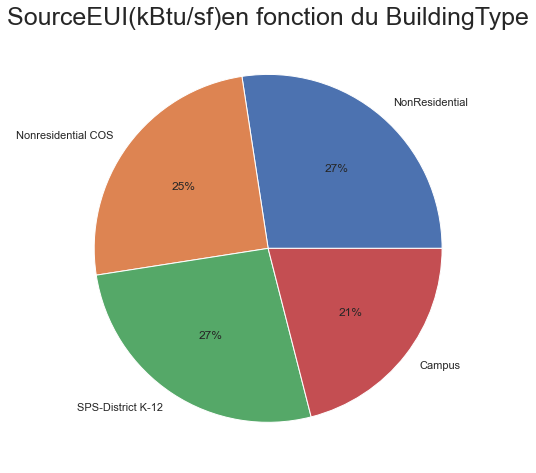

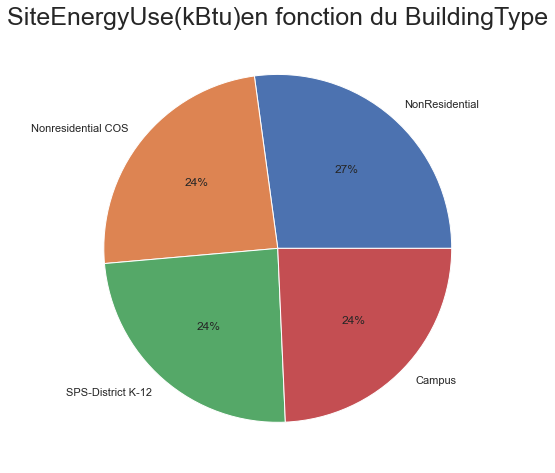

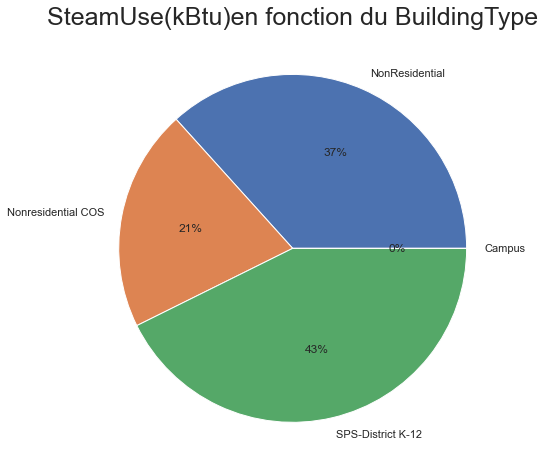

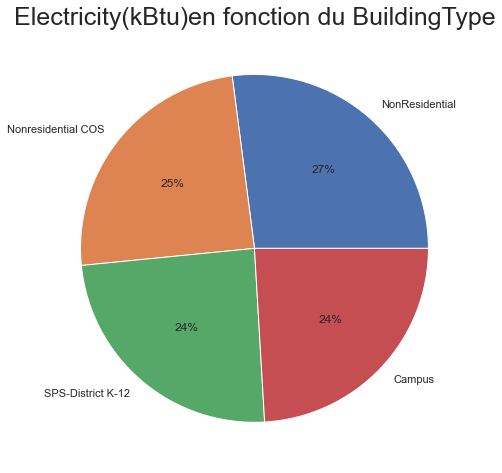

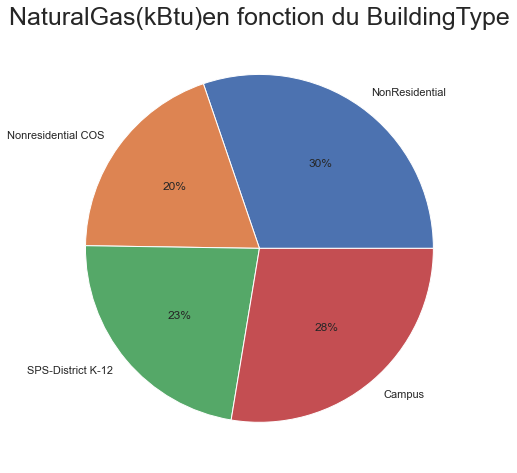

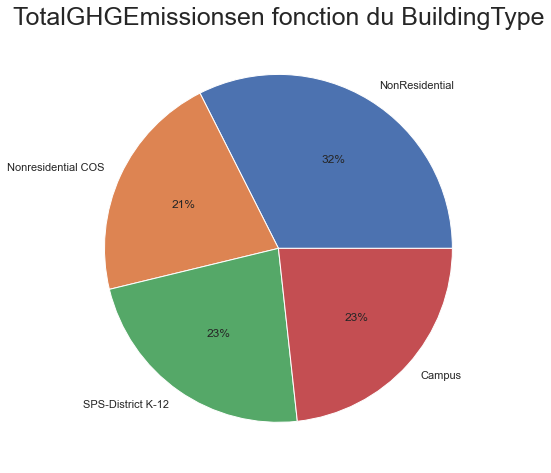

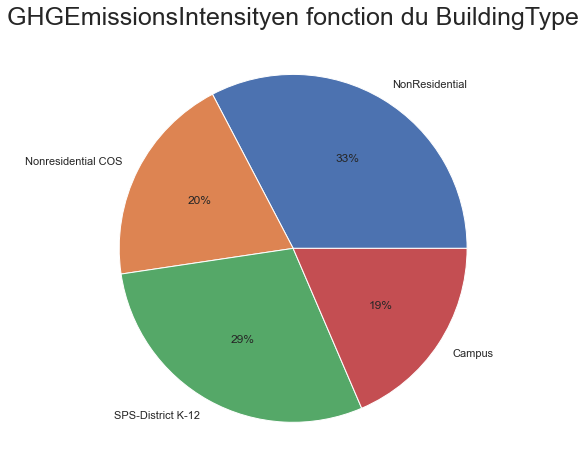

In [142]:
# declaring data
for col in log_col:
    data = df_gb[col]
    property_type = df["BuildingType"].unique()
    plt.figure(figsize=[16, 8])
    plt.pie(data, labels=property_type, autopct='%.0f%%')
    plt.title(col+'en fonction du BuildingType', fontsize=25)
    # displaying chart
    plt.show()

In [143]:
# les moyennes des nutrition_grade par features
df_gb = df_log.groupby(["PrimaryPropertyType"]).mean()

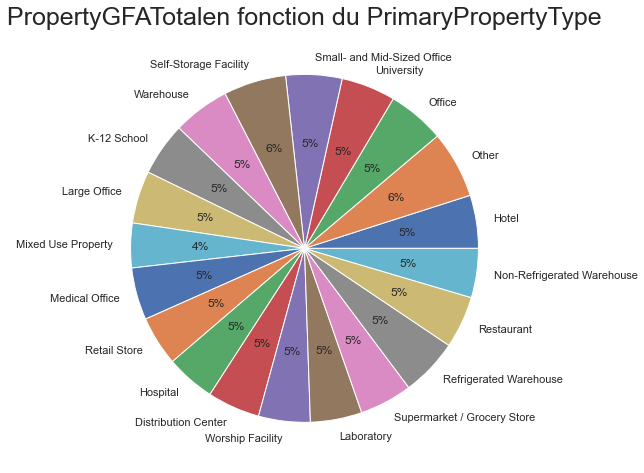

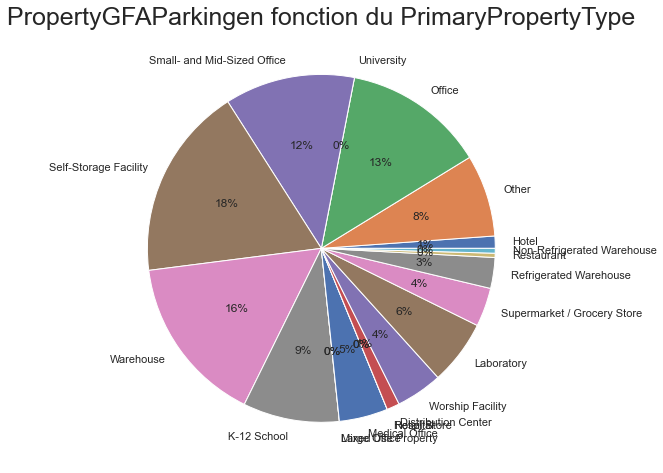

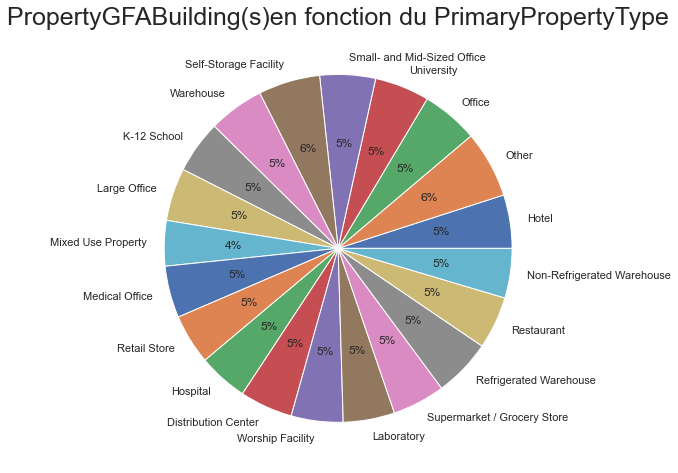

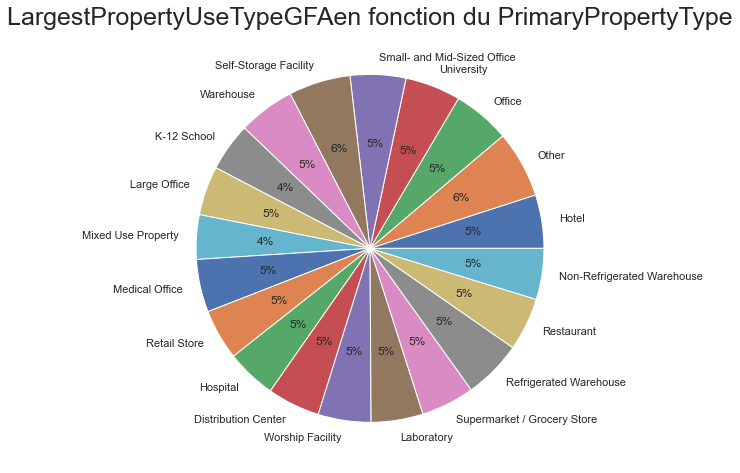

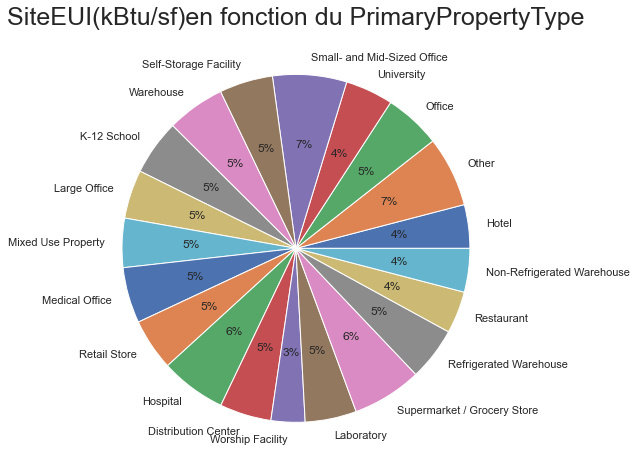

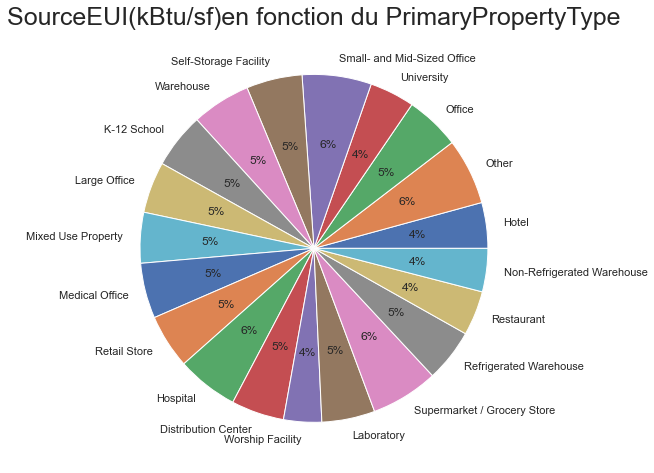

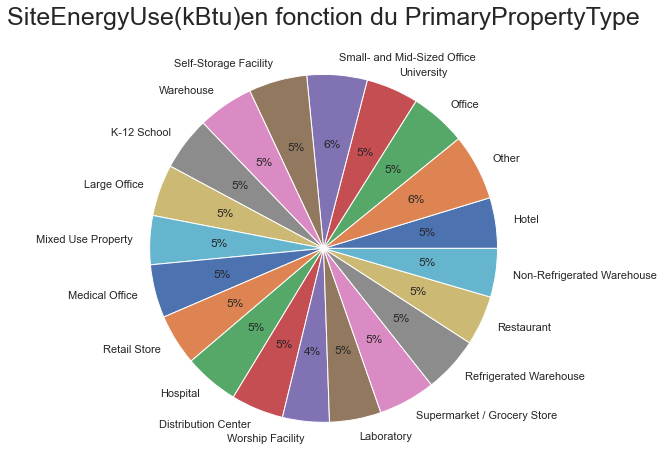

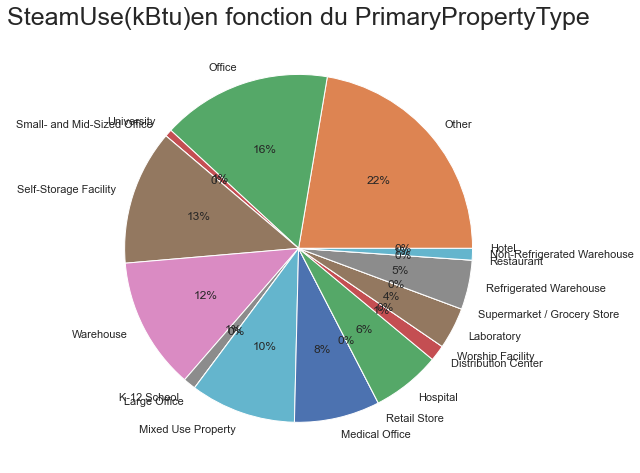

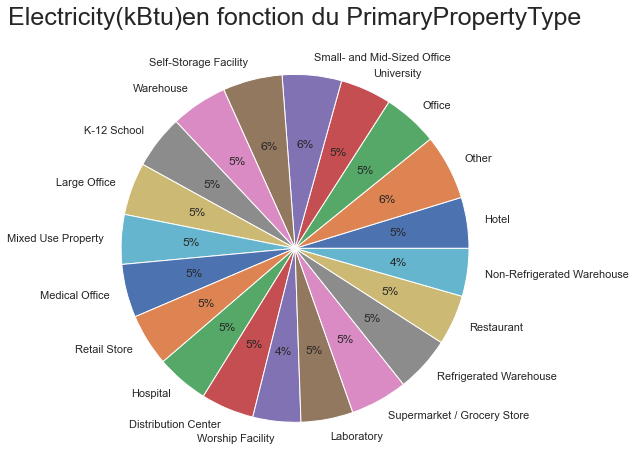

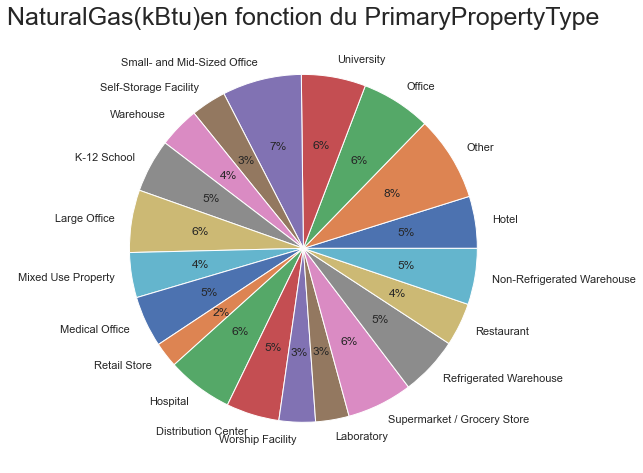

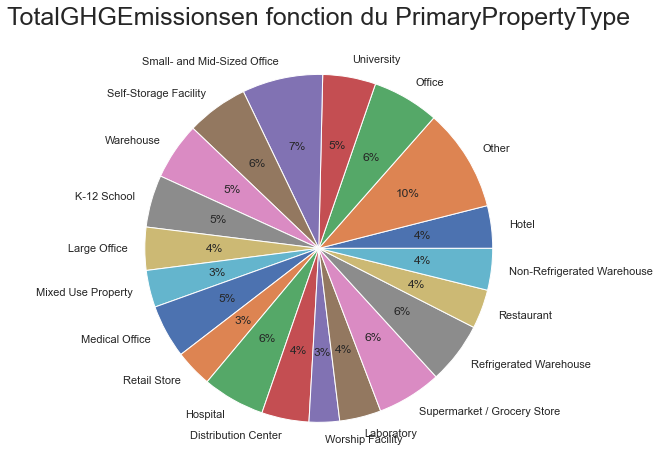

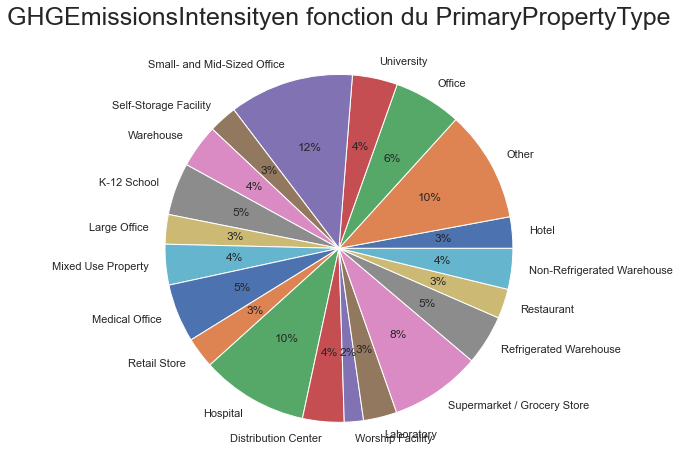

In [144]:
# declaring data
for col in log_col:
    data = df_gb[col]
    property_type = df["PrimaryPropertyType"].unique()
    plt.figure(figsize=[16, 8])
    plt.pie(data, labels=property_type, autopct='%.0f%%')
    plt.title(col+'en fonction du PrimaryPropertyType', fontsize=25)
    # displaying chart
    plt.show()

## Matrice de Corrélation

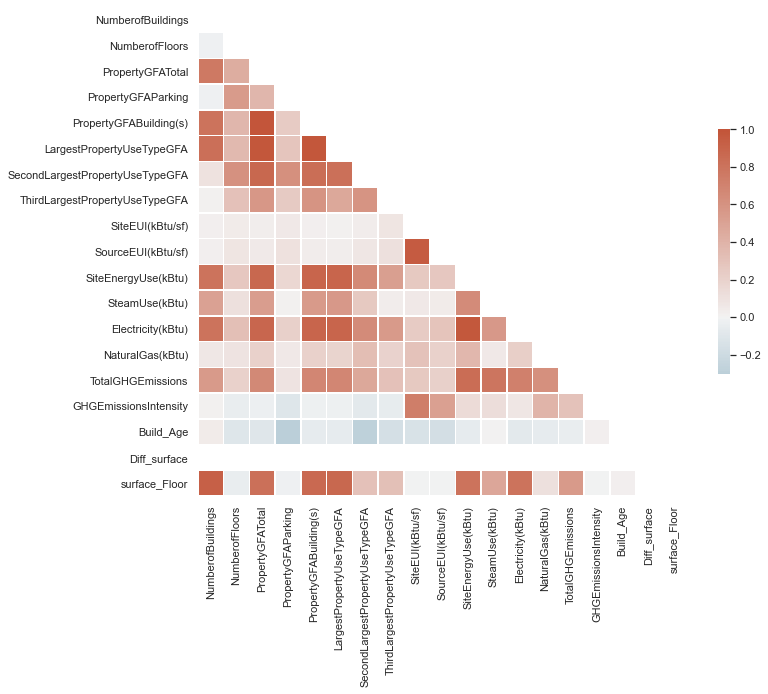

In [145]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [146]:
corr_min = 0.5
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > corr_min)])
               .reset_index().rename(columns={0:'coef_correl'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('coef_correl', ascending=False).head(15)

level_0                    level_1  coef_correl
102           PropertyGFABuilding(s)           PropertyGFATotal     0.990548
100        LargestPropertyUseTypeGFA     PropertyGFABuilding(s)     0.988968
98                  PropertyGFATotal  LargestPropertyUseTypeGFA     0.985495
96                 Electricity(kBtu)        SiteEnergyUse(kBtu)     0.975965
94                  SiteEUI(kBtu/sf)         SourceEUI(kBtu/sf)     0.949958
92                 NumberofBuildings              surface_Floor     0.919037
90               SiteEnergyUse(kBtu)  LargestPropertyUseTypeGFA     0.896247
88                 Electricity(kBtu)  LargestPropertyUseTypeGFA     0.895458
86                 Electricity(kBtu)     PropertyGFABuilding(s)     0.895083
84               SiteEnergyUse(kBtu)     PropertyGFABuilding(s)     0.893997
82                 Electricity(kBtu)           PropertyGFATotal     0.885546
80   SecondLargestPropertyUseTypeGFA           PropertyGFATotal     0.879489
78               SiteEnergyUse(kBtu)           PropertyGFATotal     0.878456
76                     surface_Floor  LargestPropertyUseTypeGFA     0.874164
74                     surface_Floor     PropertyGFABuilding(s)     0.863776

Observation suite à la matrice de corrélation:

* 
* 
* 

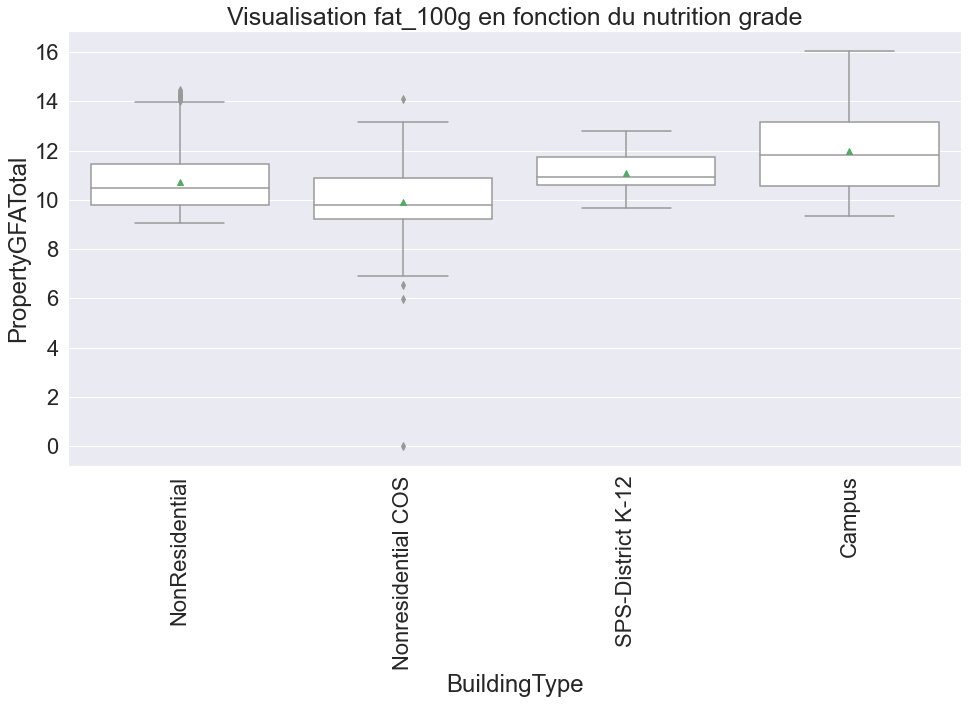

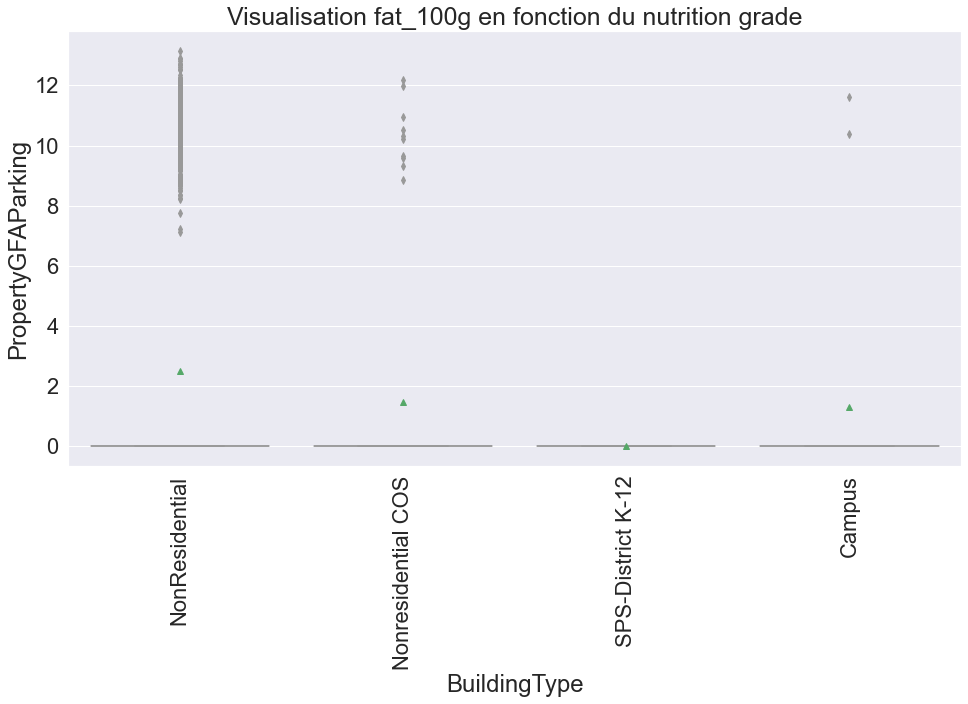

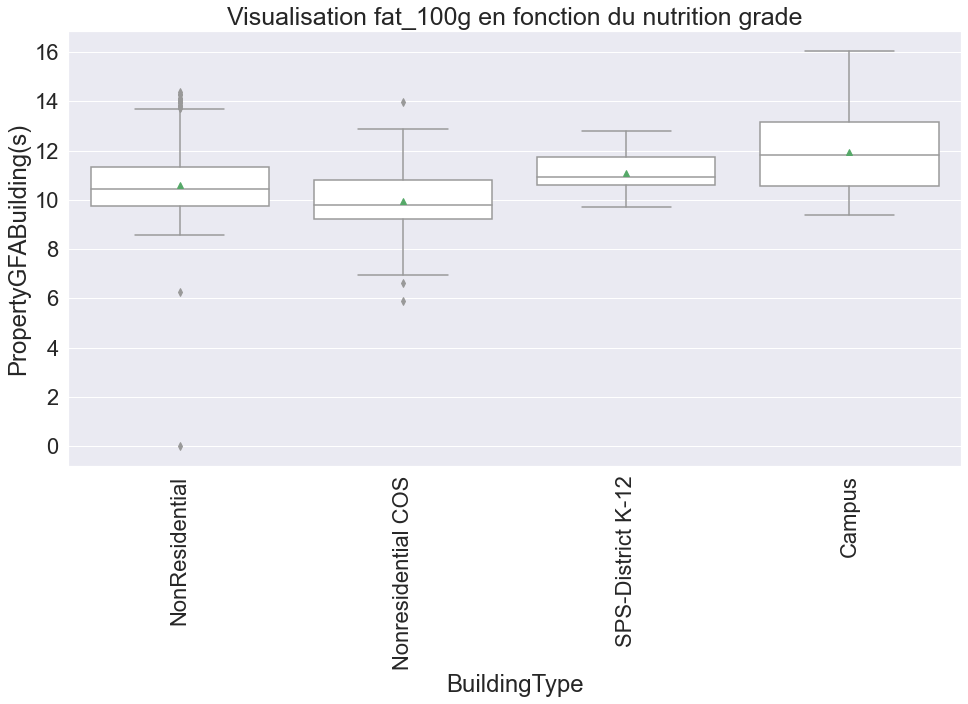

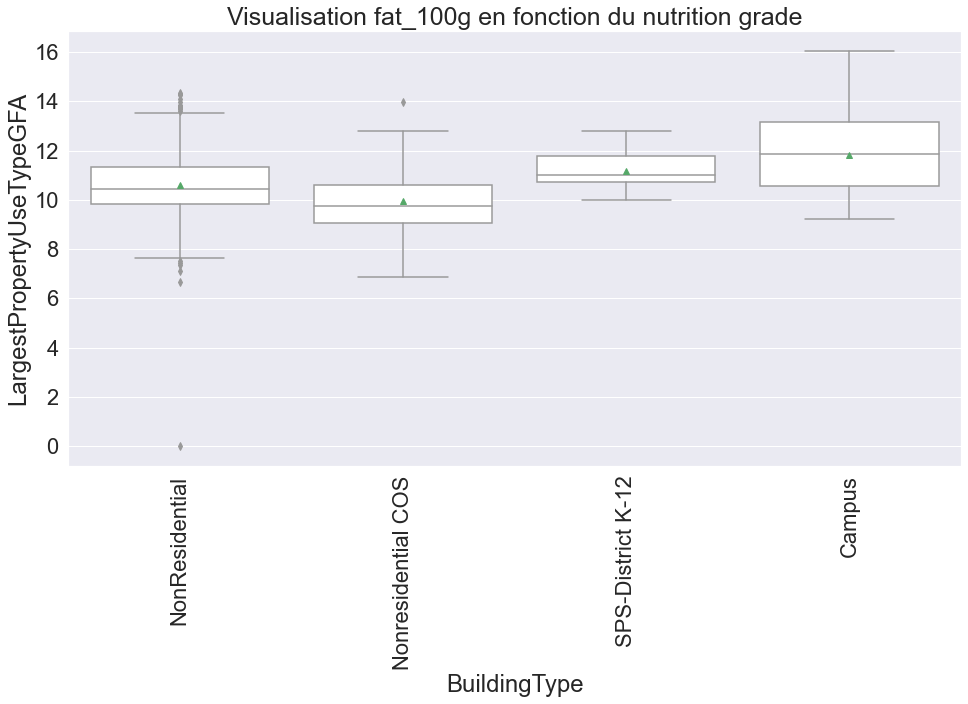

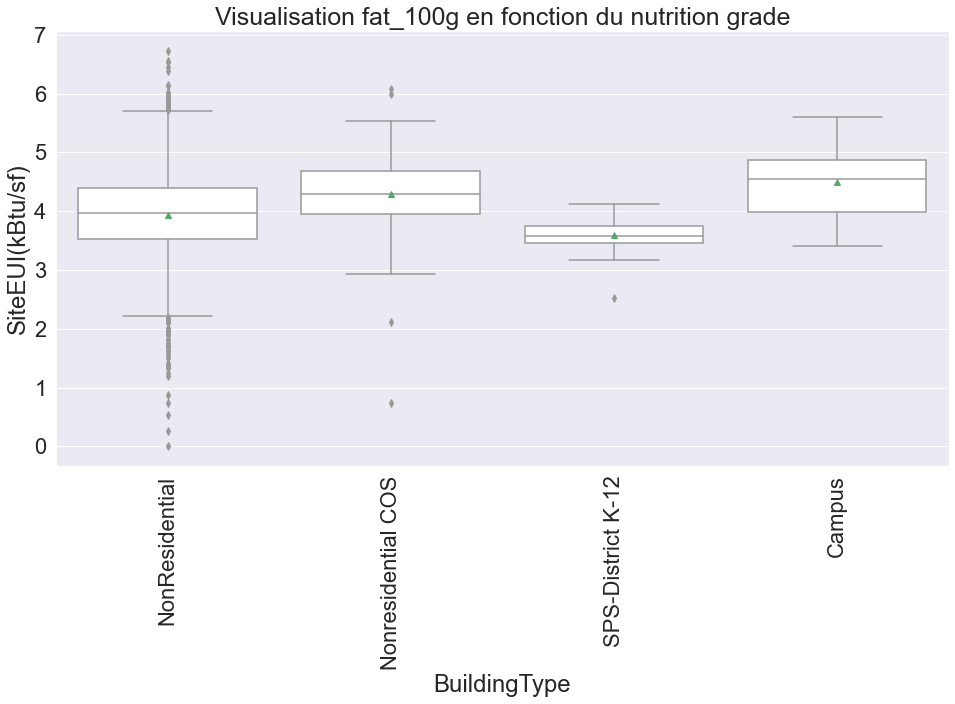

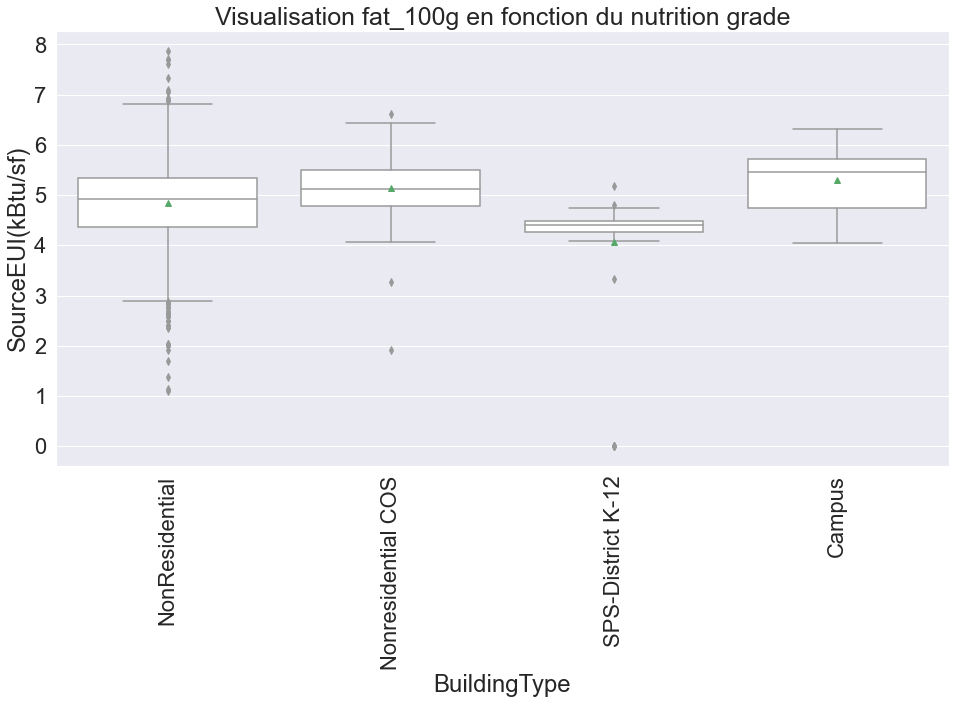

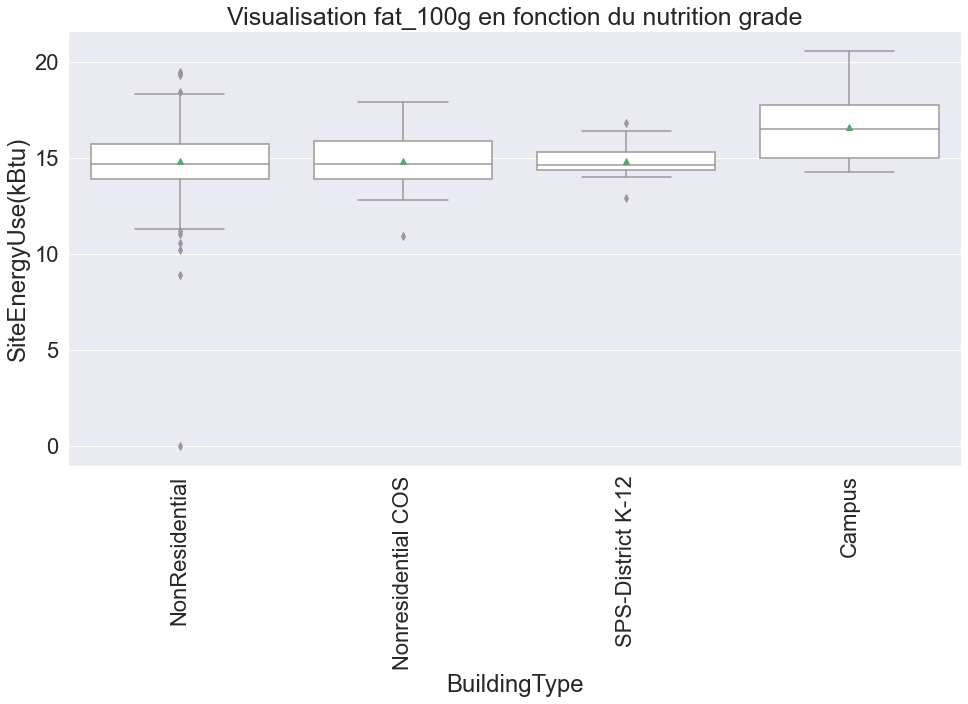

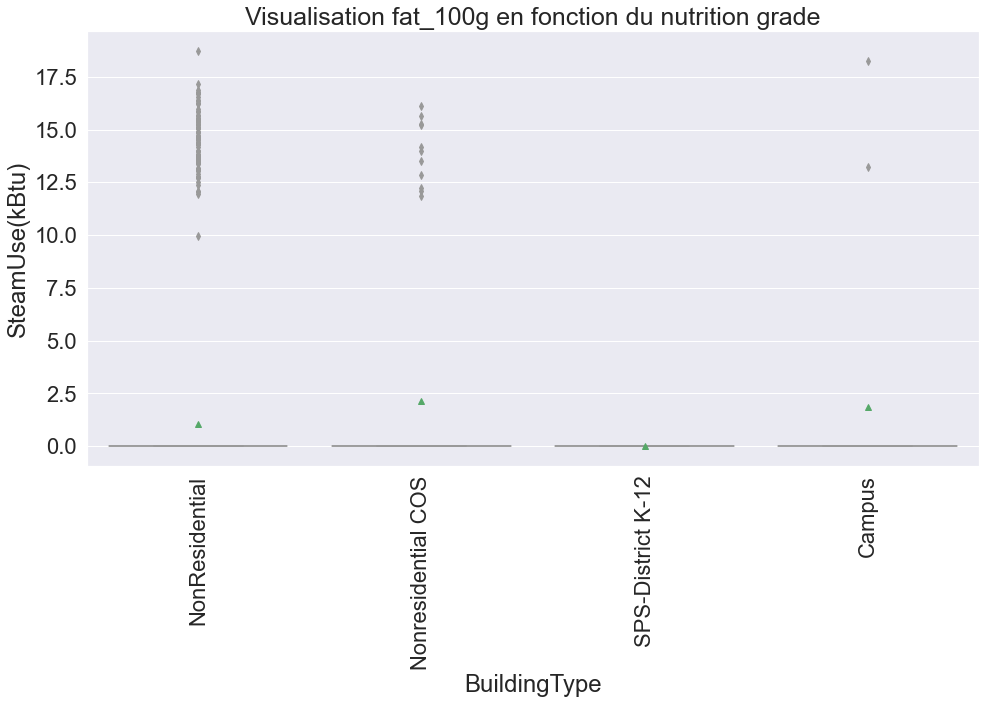

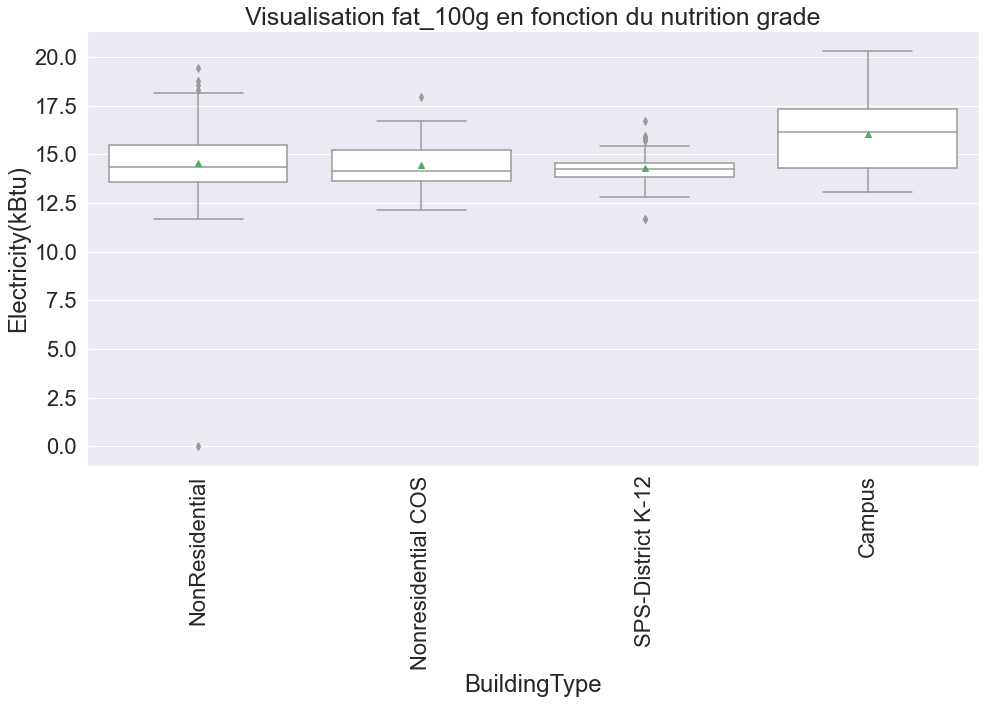

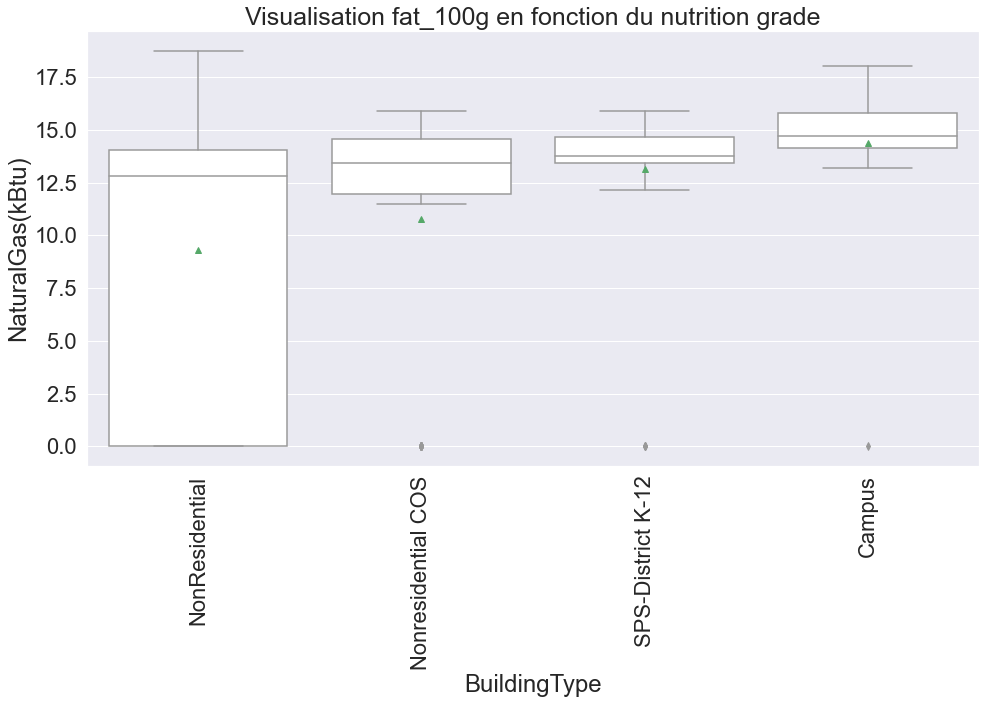

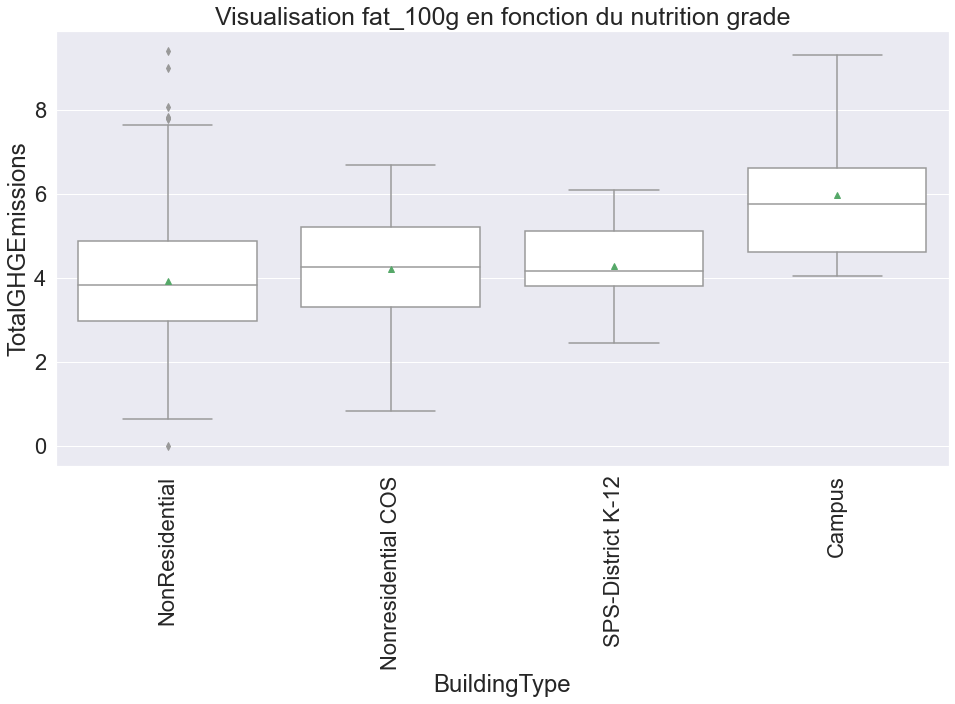

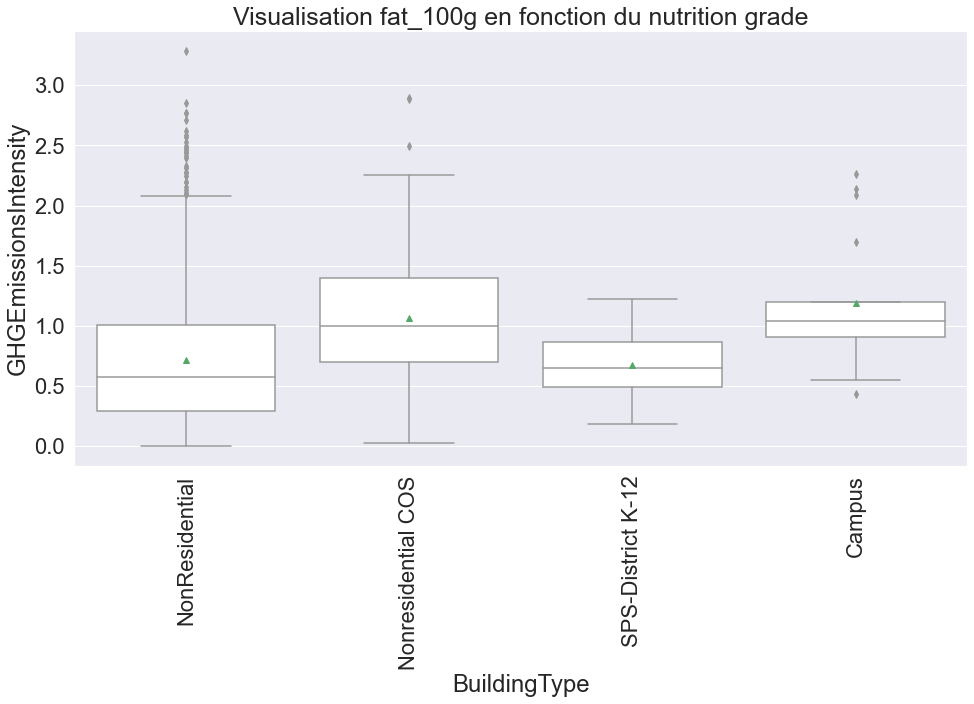

In [147]:
for col in log_col:
    plt.figure(figsize=[16, 8])
    sns.set(font_scale=2)
    sns.boxplot(x=df_log["BuildingType"], y=col, data=df_log, showmeans=True,color='white')
    plt.title("Visualisation fat_100g en fonction du nutrition grade", fontsize=25)
    plt.xticks(rotation='90')
    plt.show()

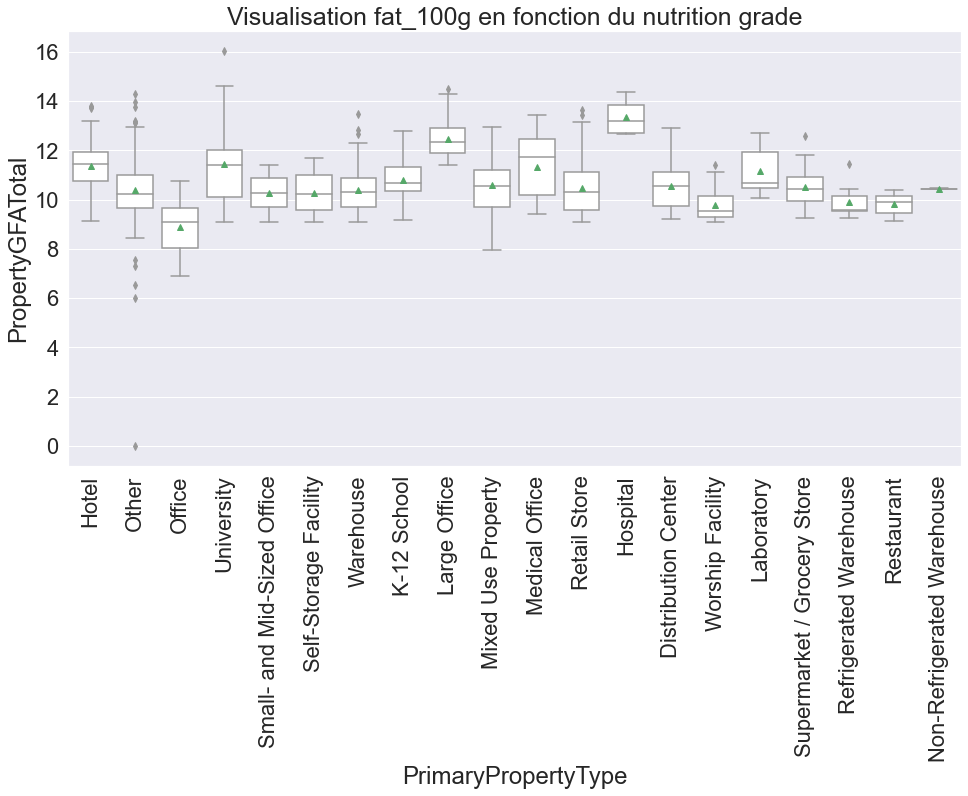

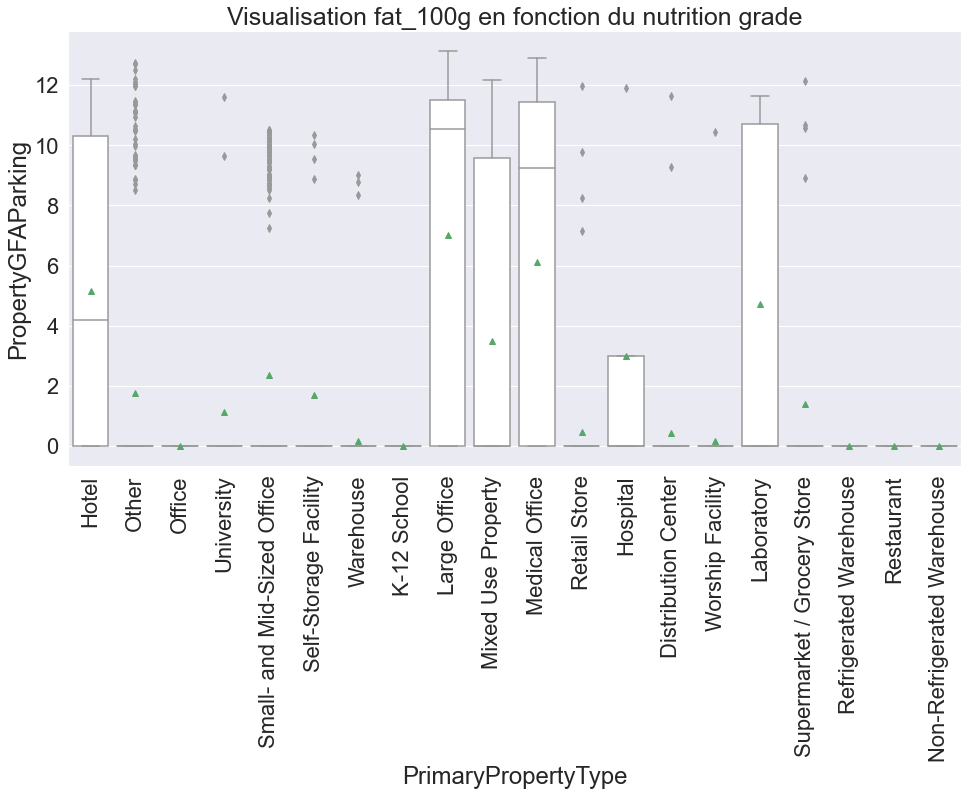

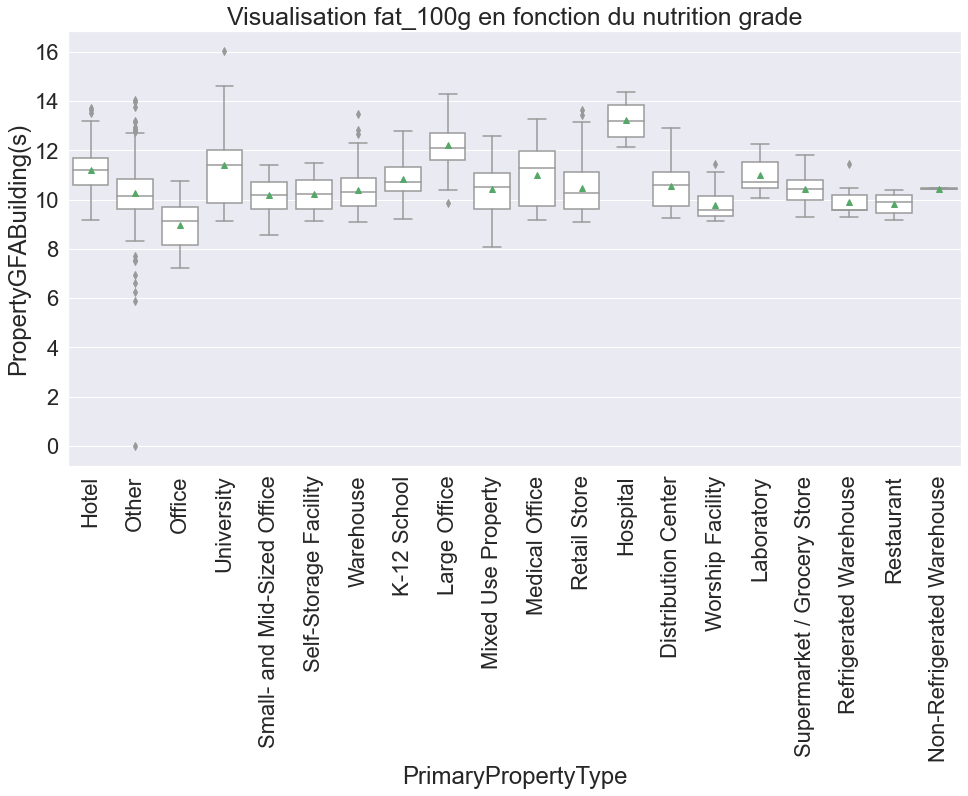

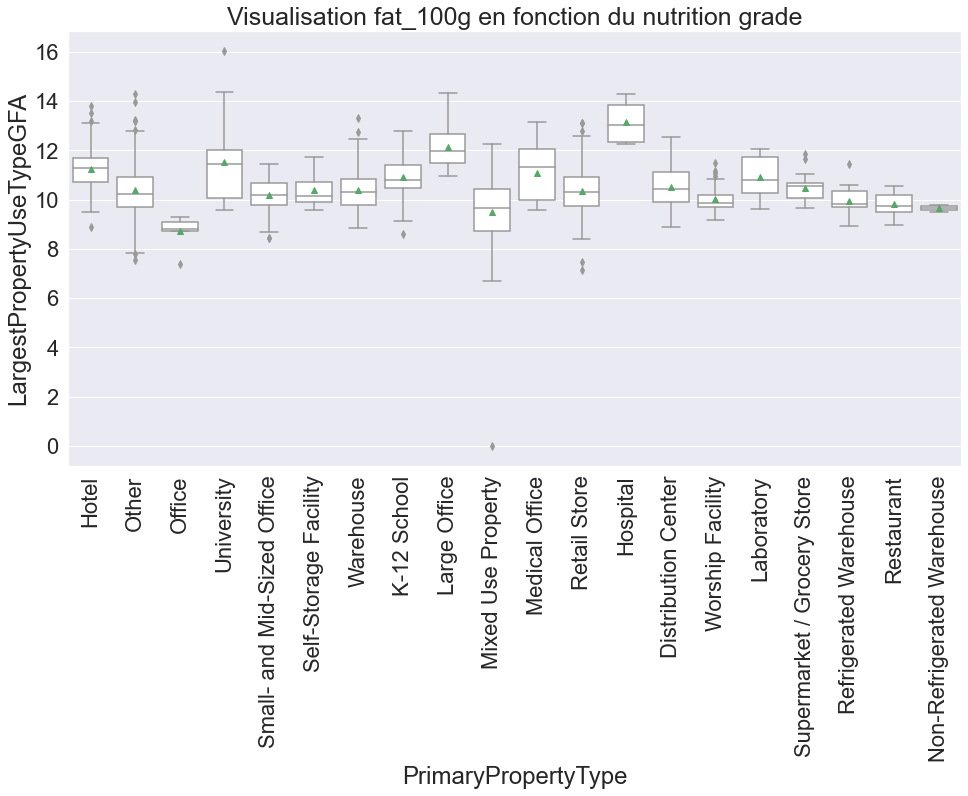

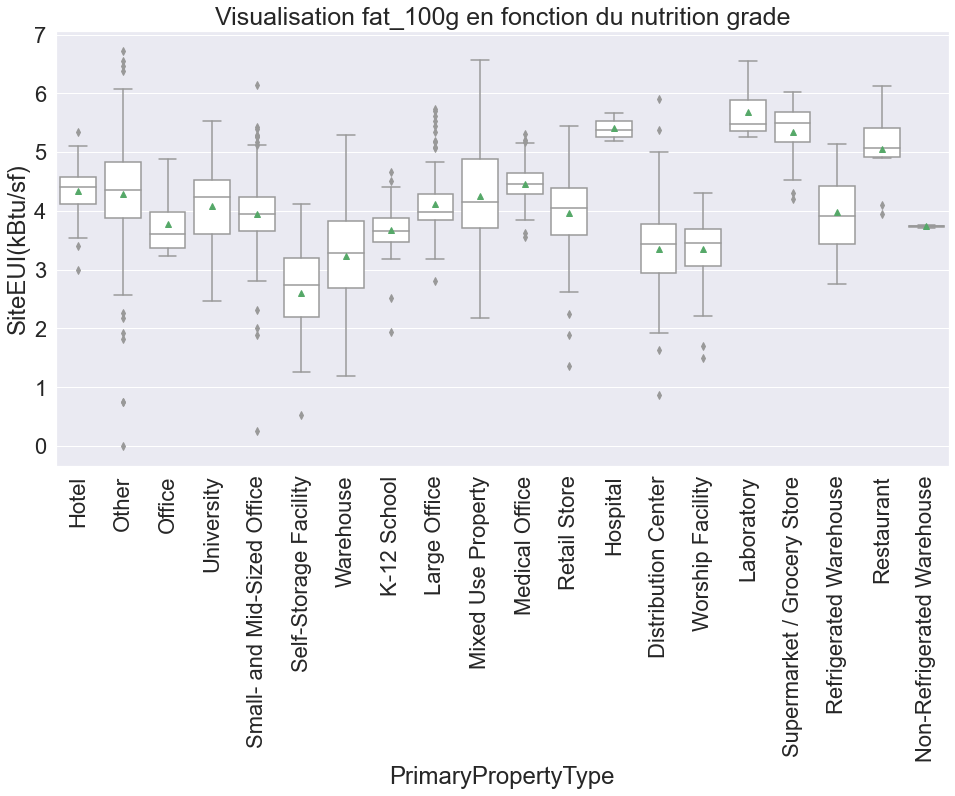

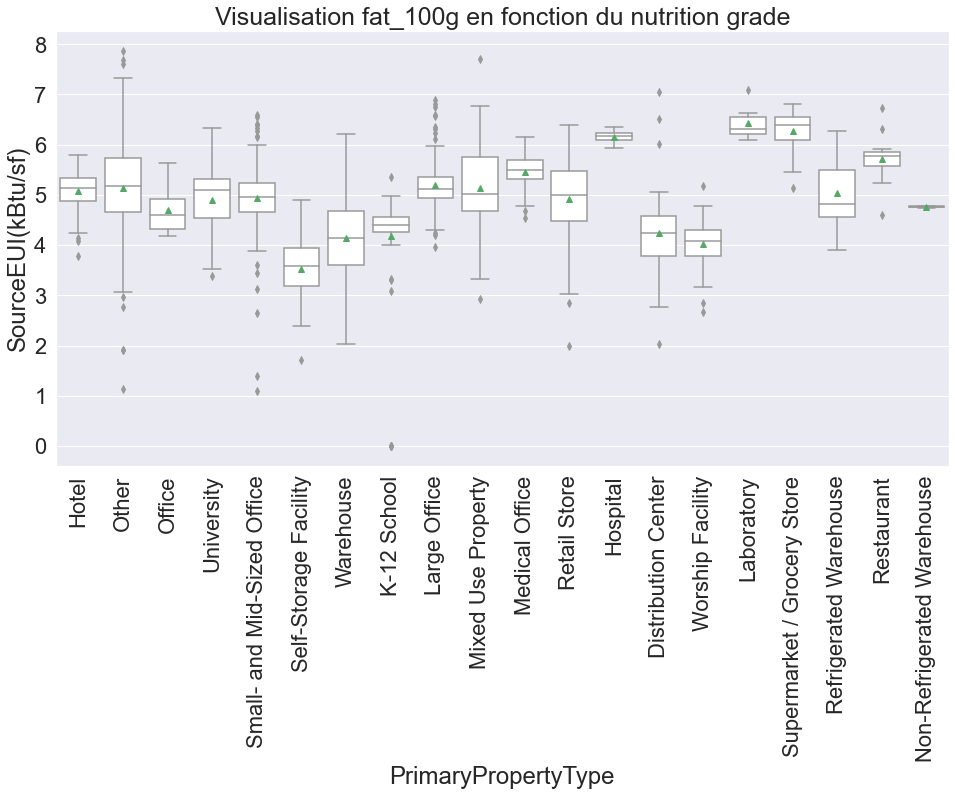

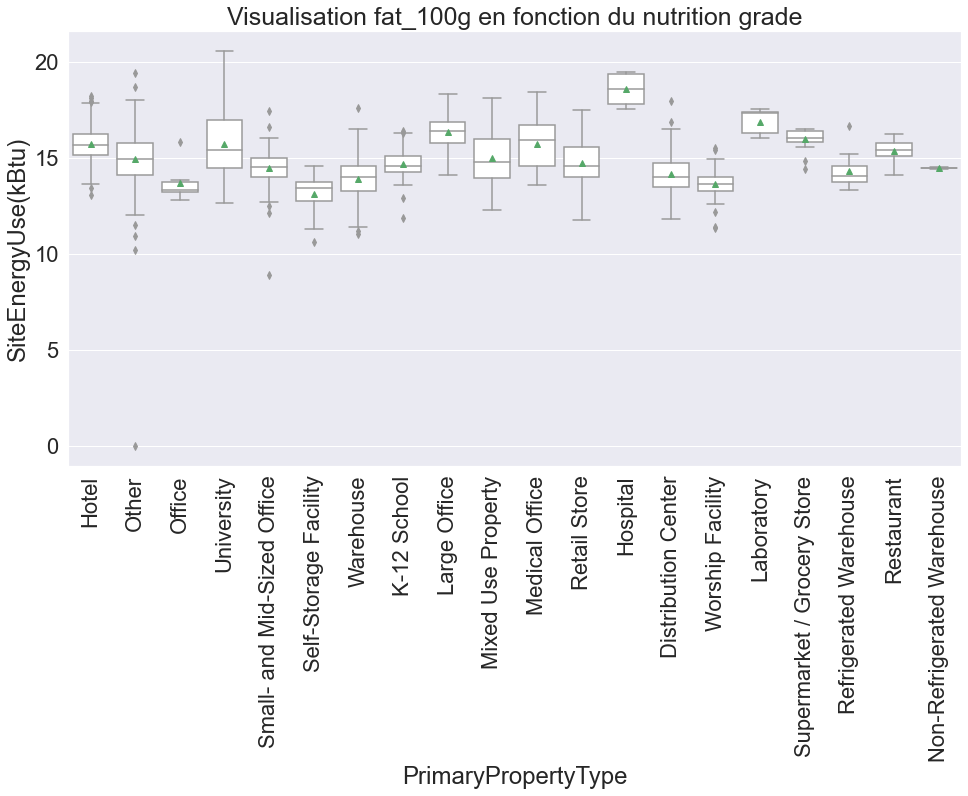

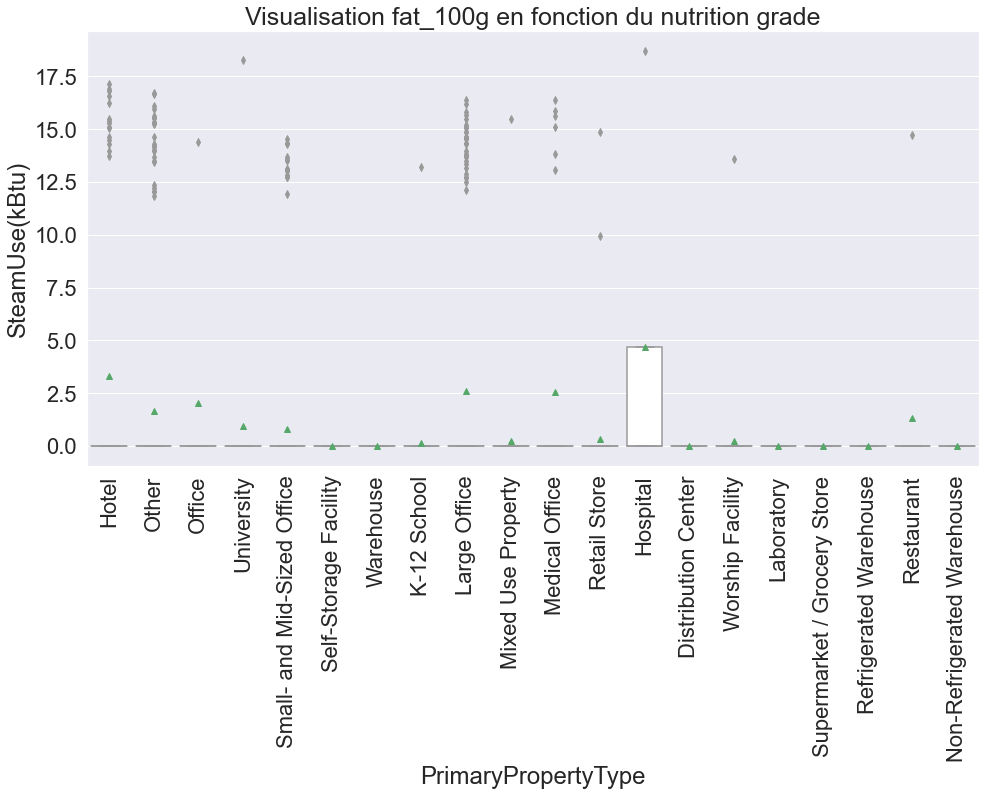

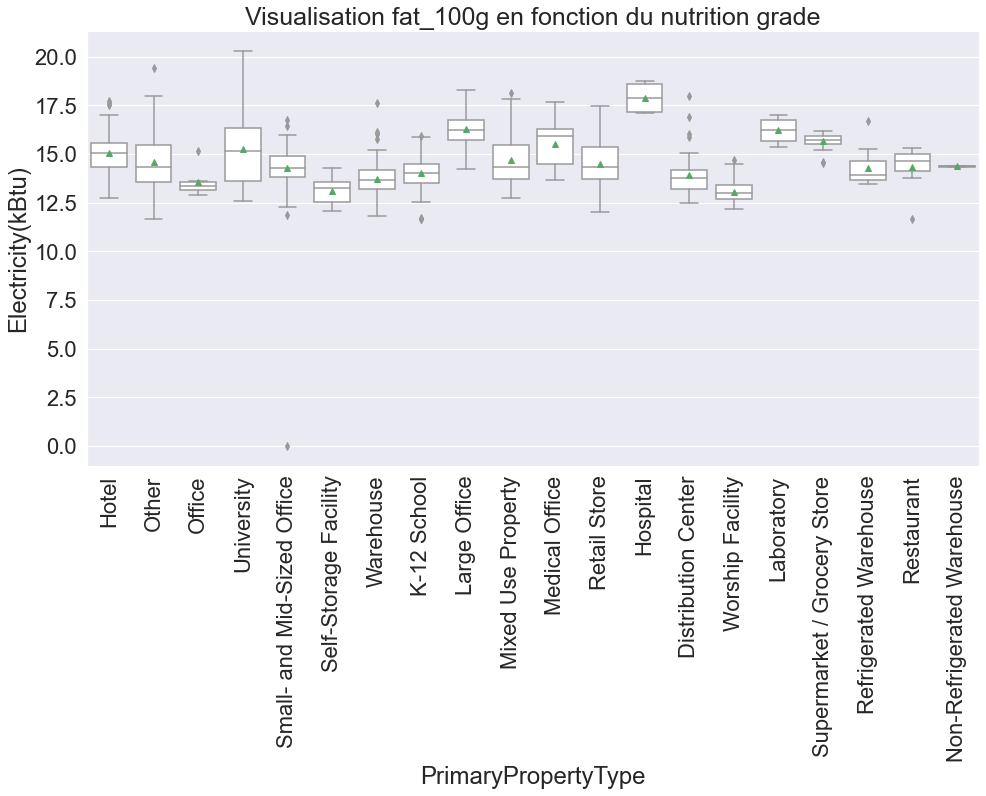

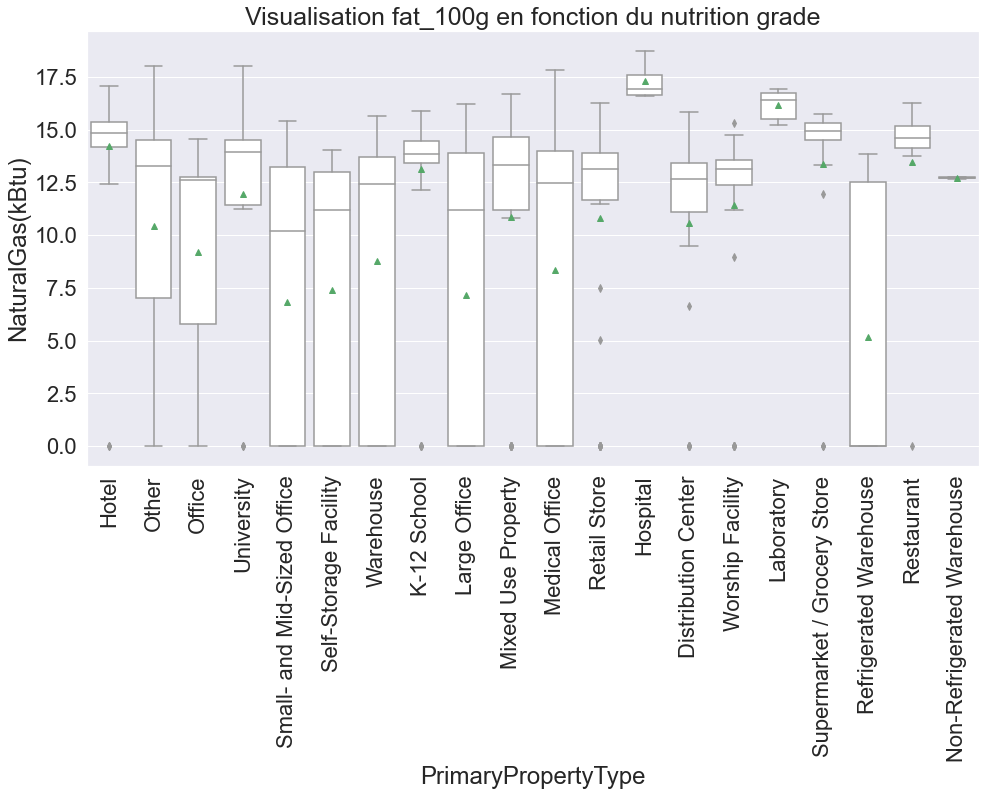

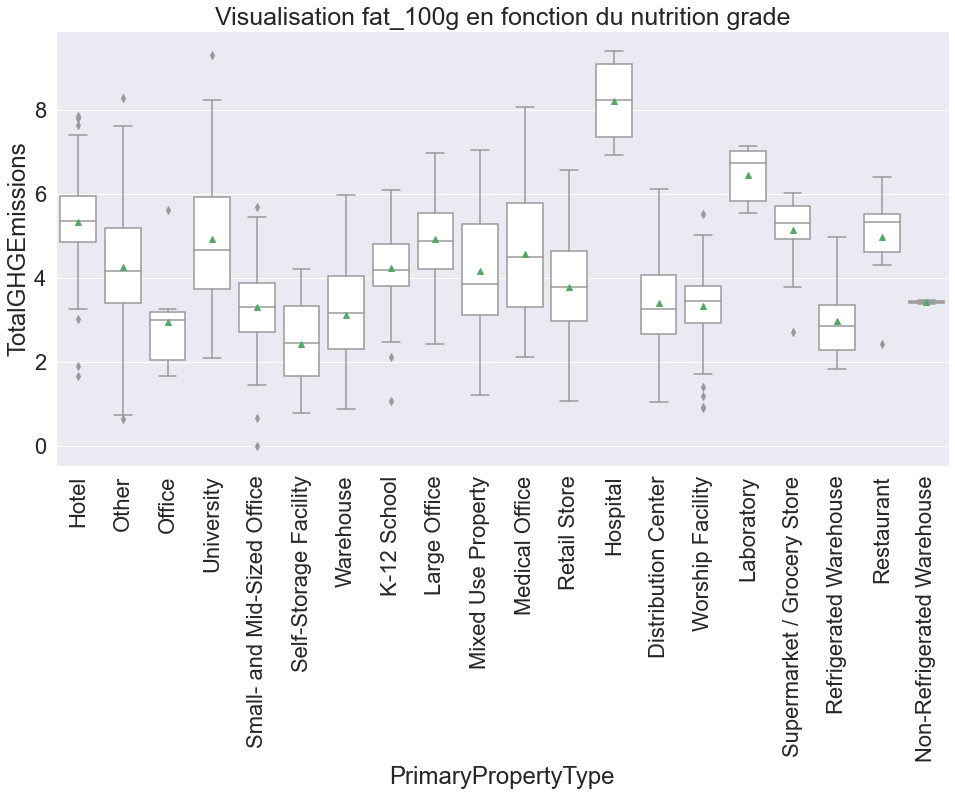

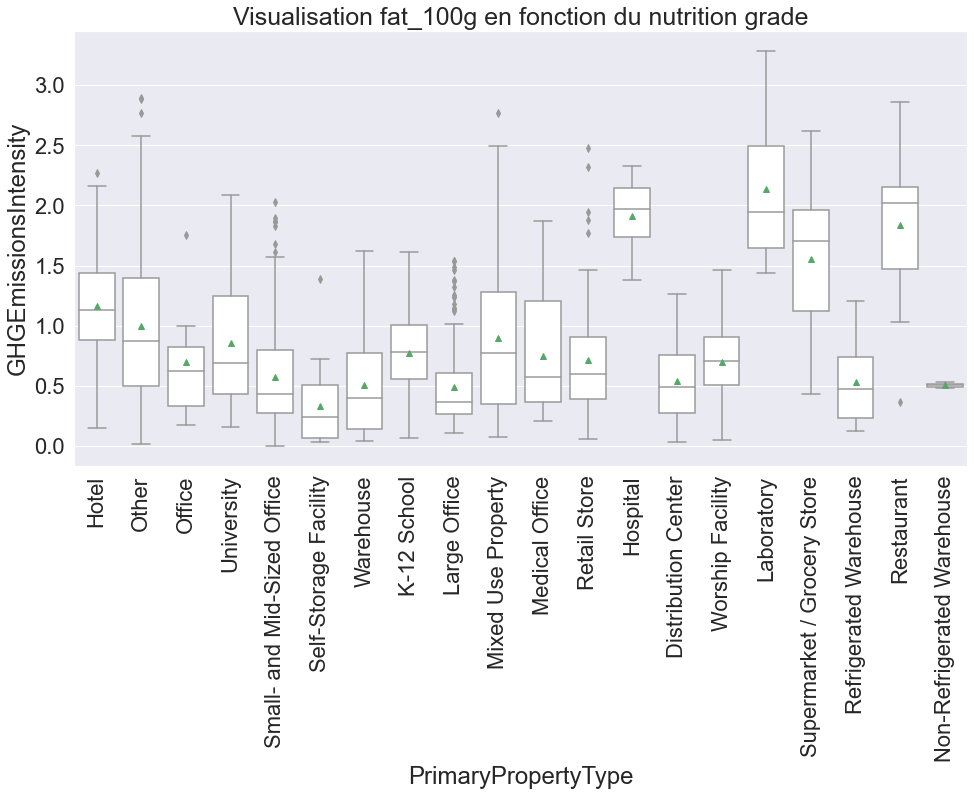

In [148]:
for col in log_col:
    plt.figure(figsize=[16, 8])
    sns.set(font_scale=2)
    sns.boxplot(x=df_log["PrimaryPropertyType"], y=col, data=df_log, showmeans=True,color='white')
    plt.title("Visualisation fat_100g en fonction du nutrition grade", fontsize=25)
    plt.xticks(rotation='90')
    plt.show()

# Tests d'hypothèses
L'ANOVA (analyse de la variance) est une méthode statistique utilisée pour vérifier s'il existe une différence significative entre les moyennes de deux groupes ou plus. Pour utiliser l'ANOVA, les hypothèses suivantes doivent être vérifiées :

* Normalité des résidus : Les données doivent être normalement distribuées au sein de chaque groupe. Cette hypothèse peut être vérifiée en visualisant les données ou en utilisant un test de normalité, tel que le test de Shapiro-Wilk.
<br>
<br>
* Indépendance : Les observations au sein de chaque groupe doivent être indépendantes les unes des autres. En d'autres termes, les observations ne doivent pas être liées d'une manière qui pourrait affecter les résultats du test.
<br>
<br>
* Variance égale : Les variances des groupes doivent être approximativement égales. Cette hypothèse peut être vérifiée à l'aide d'un test d'égalité de variance, tel que le test de Levene

## Distribution normale des résidus
On réalise le test de Shapiro-Wilk pour vérifier la normalité des résidus. A noter qu'on utilisera ensuite également une droite de Henry pour vérifier cette hypothèse de normalité.

In [149]:
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as st

In [150]:
for col in log_col:
        w, pvalue = st.shapiro(df_log[col])
        seuil = 0.05
        print(f'{col :-<50} {w} {pvalue}')
        if pvalue > seuil:
            print(
                "On ne peux pas rejetter H0: la distribution des résidus suit une loi normale")
        else:
            print(
                "On rejette H0 : la distribution des résidus ne suit pas une loi normale")

PropertyGFATotal---------------------------------- 0.944457471370697 2.577575618559027e-22
On rejette H0 : la distribution des résidus ne suit pas une loi normale
PropertyGFAParking-------------------------------- 0.5405376553535461 0.0
On rejette H0 : la distribution des résidus ne suit pas une loi normale
PropertyGFABuilding(s)---------------------------- 0.9438461661338806 1.9716823543885075e-22
On rejette H0 : la distribution des résidus ne suit pas une loi normale
LargestPropertyUseTypeGFA------------------------- 0.9568511843681335 1.0128582970172033e-19
On rejette H0 : la distribution des résidus ne suit pas une loi normale
SiteEUI(kBtu/sf)---------------------------------- 0.975556492805481 1.641829372651428e-14
On rejette H0 : la distribution des résidus ne suit pas une loi normale
SourceEUI(kBtu/sf)-------------------------------- 0.9572244882583618 1.235243284386156e-19
On rejette H0 : la distribution des résidus ne suit pas une loi normale
SiteEnergyUse(kBtu)---------------

PropertyGFATotal


PropertyGFAParking


PropertyGFABuilding(s)


LargestPropertyUseTypeGFA


SiteEUI(kBtu/sf)


SourceEUI(kBtu/sf)


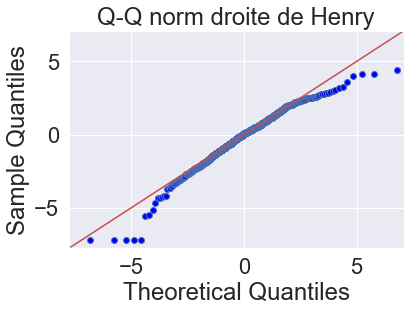

SiteEnergyUse(kBtu)


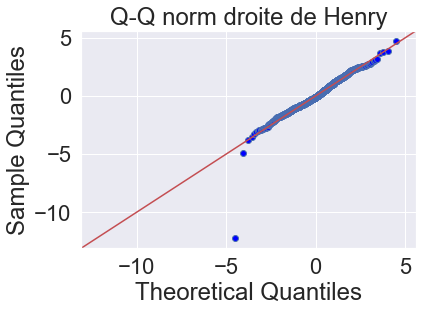

SteamUse(kBtu)


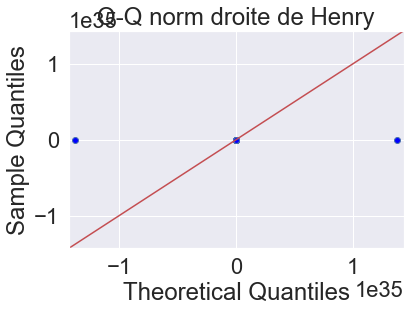

Electricity(kBtu)


NaturalGas(kBtu)


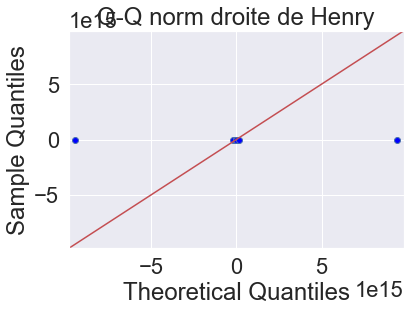

TotalGHGEmissions


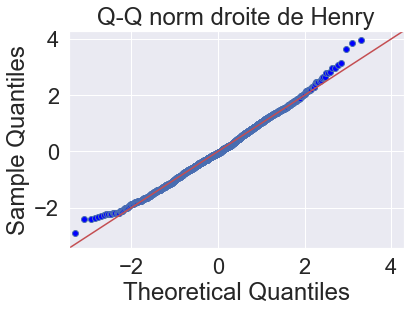

GHGEmissionsIntensity


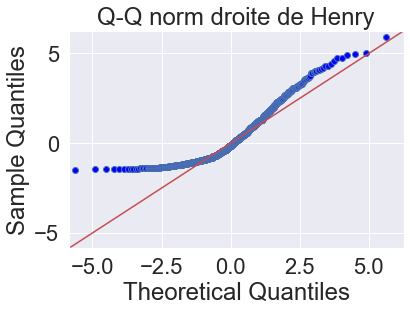

In [151]:
#qqpolot vs. loi normale (droite de Henry)
for col in log_col:
    sm.qqplot(df_log[col],stats.t, fit=True, line="45")
    plt.title("Q-Q norm droite de Henry")
    print(col)
    plt.show()


La pvalue étant inférieure au seuil de 5%, on peut en conclure que la distribution des résidus ne suit pas une loi normale

## Homoscédasticité

Pour teste l'homoscédasticité on peut utiliser le test de Levene.

In [152]:
df_log['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    264
Other                          216
Warehouse                      170
Large Office                   163
K-12 School                     93
Retail Store                    80
Hotel                           70
Mixed Use Property              63
Worship Facility                60
Distribution Center             47
Medical Office                  35
Supermarket / Grocery Store     30
Self-Storage Facility           23
University                      19
Restaurant                      11
Refrigerated Warehouse          10
Laboratory                       7
Office                           7
Hospital                         4
Non-Refrigerated Warehouse       2
Name: PrimaryPropertyType, dtype: int64

In [153]:
# Homoscédasticité : Test de Levene
for col in log_col:
    alpha = 0.05
    result = st.levene(df_log[df_log['PrimaryPropertyType'] == 'Small- and Mid-Sized Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Other'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Warehouse'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Large Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'K-12 School'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Retail Store'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Hotel'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Mixed Use Property'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Worship Facility'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Distribution Center'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Medical Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Supermarket / Grocery Storer'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Self-Storage Facility'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'University'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Restaurant'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Refrigerated Warehouse'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Laboratory'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Hospital'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Non-Refrigerated Warehouse'][col])




    print(f'{col :-<70} {result.pvalue}')

    if result.pvalue >= alpha:
        print("l'hypothèse d'homoscédasticité est validée")
    else:
        print("On rejete l'hypothèse d'homoscédasticité")

PropertyGFATotal------------------------------------------------------ nan
On rejete l'hypothèse d'homoscédasticité
PropertyGFAParking---------------------------------------------------- nan
On rejete l'hypothèse d'homoscédasticité
PropertyGFABuilding(s)------------------------------------------------ nan
On rejete l'hypothèse d'homoscédasticité
LargestPropertyUseTypeGFA--------------------------------------------- nan
On rejete l'hypothèse d'homoscédasticité
SiteEUI(kBtu/sf)------------------------------------------------------ nan
On rejete l'hypothèse d'homoscédasticité
SourceEUI(kBtu/sf)---------------------------------------------------- nan
On rejete l'hypothèse d'homoscédasticité
SiteEnergyUse(kBtu)--------------------------------------------------- nan
On rejete l'hypothèse d'homoscédasticité
SteamUse(kBtu)-------------------------------------------------------- nan
On rejete l'hypothèse d'homoscédasticité
Electricity(kBtu)----------------------------------------------------- n

In [154]:
for col in log_col:
    result = st.f_oneway(df_log[df_log['PrimaryPropertyType'] == 'Small- and Mid-Sized Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Other'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Warehouse'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Large Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'K-12 School'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Retail Store'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Hotel'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Mixed Use Property'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Worship Facility'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Distribution Center'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Medical Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Supermarket / Grocery Storer'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Self-Storage Facility'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'University'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Restaurant'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Refrigerated Warehouse'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Laboratory'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Hospital'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Non-Refrigerated Warehouse'][col])
    print(f'{col :-<70}{result.pvalue}')
    if result.pvalue > 0.05:
        print("H0: l'hypothèse nulle: Les variables nutritionnelles d'un produit et le nutriscore obtenu sont indépendantes")
    else:
        print("Ha: l'hypothèse alternative: Les variables nutritionnelles d'un produit et le nutriscore obtenu sont corrélées")

PropertyGFATotal------------------------------------------------------nan
Ha: l'hypothèse alternative: Les variables nutritionnelles d'un produit et le nutriscore obtenu sont corrélées
PropertyGFAParking----------------------------------------------------nan
Ha: l'hypothèse alternative: Les variables nutritionnelles d'un produit et le nutriscore obtenu sont corrélées
PropertyGFABuilding(s)------------------------------------------------nan
Ha: l'hypothèse alternative: Les variables nutritionnelles d'un produit et le nutriscore obtenu sont corrélées
LargestPropertyUseTypeGFA---------------------------------------------nan
Ha: l'hypothèse alternative: Les variables nutritionnelles d'un produit et le nutriscore obtenu sont corrélées
SiteEUI(kBtu/sf)------------------------------------------------------nan
Ha: l'hypothèse alternative: Les variables nutritionnelles d'un produit et le nutriscore obtenu sont corrélées
SourceEUI(kBtu/sf)----------------------------------------------------nan
H

In [155]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

PropertyGFATotal------------------------------------------------------
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------
        Distribution Center                    Hospital    2.796  0.001  0.9713  4.6207   True
        Distribution Center                       Hotel   0.7914 0.0036  0.1307   1.452   True
        Distribution Center                 K-12 School   0.2395    0.9 -0.3875  0.8665  False
        Distribution Center                  Laboratory   0.6097    0.9 -0.8097   2.029  False
        Distribution Center                Large Office   1.8929  0.001  1.3129   2.473   True
        Distribution Center              Medical Office   0.7633 0.0661 -0.0189  1.5455  False
        Distribution Center          Mixed Use Property   0.0205    0.9 -0

Figure(720x432)


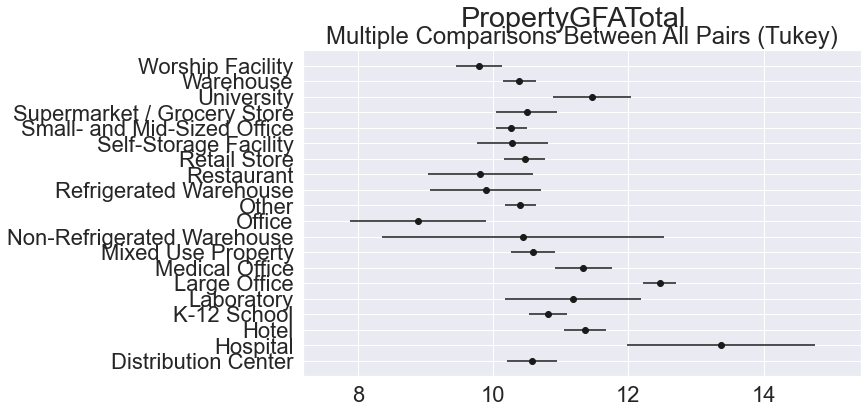

PropertyGFAParking----------------------------------------------------
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------------
        Distribution Center                    Hospital   2.5354    0.9  -4.4624  9.5332  False
        Distribution Center                       Hotel   4.7108  0.001   2.1772  7.2445   True
        Distribution Center                 K-12 School  -0.4449    0.9  -2.8494  1.9596  False
        Distribution Center                  Laboratory   4.2819 0.3639  -1.1613  9.7251  False
        Distribution Center                Large Office   6.5869  0.001   4.3624  8.8113   True
        Distribution Center              Medical Office   5.6845  0.001   2.6848  8.6842   True
        Distribution Center          Mixed Use Property   3.0573 

Figure(720x432)


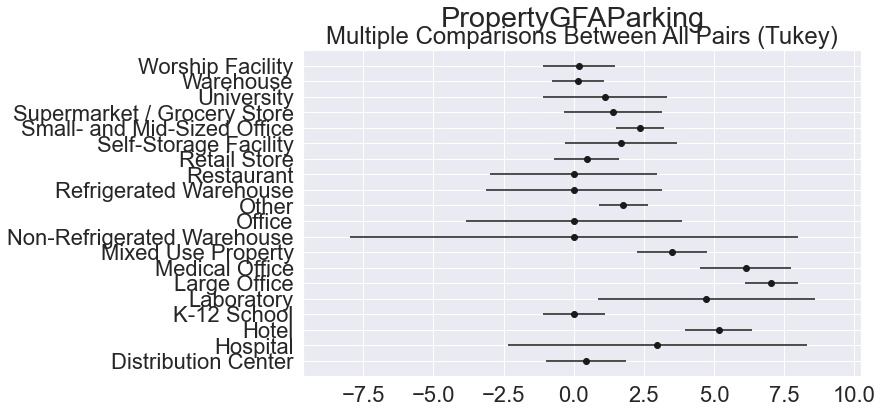

PropertyGFABuilding(s)------------------------------------------------
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------
        Distribution Center                    Hospital   2.6533  0.001  0.8576  4.4491   True
        Distribution Center                       Hotel   0.6501 0.0501 -0.0001  1.3003  False
        Distribution Center                 K-12 School   0.2521    0.9  -0.365  0.8691  False
        Distribution Center                  Laboratory   0.4359    0.9 -0.9609  1.8327  False
        Distribution Center                Large Office   1.6454  0.001  1.0746  2.2162   True
        Distribution Center              Medical Office   0.4323    0.9 -0.3375  1.2021  False
        Distribution Center          Mixed Use Property  -0.1322    0.9 -0

Figure(720x432)


LargestPropertyUseTypeGFA---------------------------------------------
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------
        Distribution Center                    Hospital   2.6432  0.001   0.919  4.3673   True
        Distribution Center                       Hotel   0.7481 0.0036  0.1239  1.3724   True
        Distribution Center                 K-12 School   0.4026  0.628 -0.1899   0.995  False
        Distribution Center                  Laboratory   0.4131    0.9  -0.928  1.7542  False
        Distribution Center                Large Office   1.6462  0.001  1.0982  2.1943   True
        Distribution Center              Medical Office   0.5878 0.3415 -0.1513  1.3268  False
        Distribution Center          Mixed Use Property   -1.011  0.001  -

Figure(720x432)


SiteEUI(kBtu/sf)------------------------------------------------------
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------
        Distribution Center                    Hospital   2.0566  0.001  0.7776  3.3357   True
        Distribution Center                       Hotel   0.9916  0.001  0.5285  1.4547   True
        Distribution Center                 K-12 School   0.3286 0.4673 -0.1109  0.7681  False
        Distribution Center                  Laboratory   2.3386  0.001  1.3437  3.3335   True
        Distribution Center                Large Office   0.7646  0.001   0.358  1.1712   True
        Distribution Center              Medical Office   1.1146  0.001  0.5663  1.6629   True
        Distribution Center          Mixed Use Property   0.9057  0.001  0

Figure(720x432)


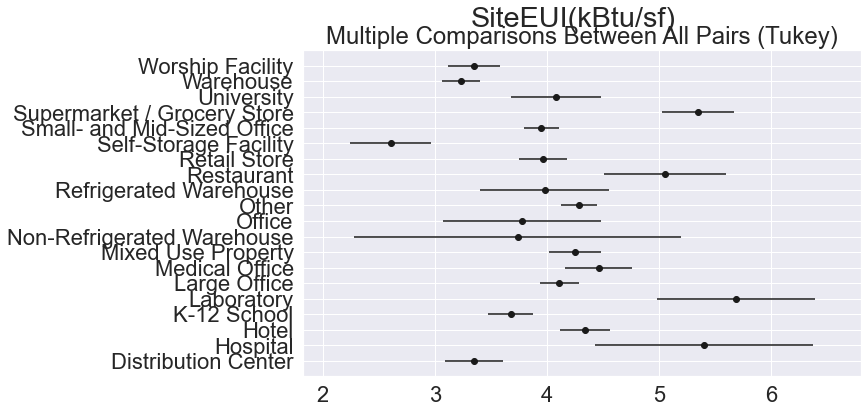

SourceEUI(kBtu/sf)----------------------------------------------------
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------
        Distribution Center                    Hospital   1.9173  0.001    0.57  3.2647   True
        Distribution Center                       Hotel   0.8284  0.001  0.3406  1.3162   True
        Distribution Center                 K-12 School  -0.0658    0.9 -0.5288  0.3972  False
        Distribution Center                  Laboratory   2.1876  0.001  1.1396  3.2356   True
        Distribution Center                Large Office   0.9436  0.001  0.5153  1.3719   True
        Distribution Center              Medical Office   1.2214  0.001  0.6438  1.7989   True
        Distribution Center          Mixed Use Property   0.9023  0.001  0

Figure(720x432)


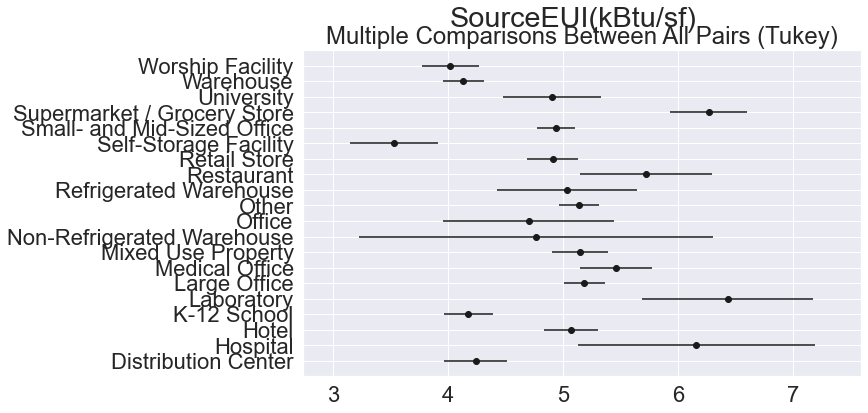

SiteEnergyUse(kBtu)---------------------------------------------------
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------
        Distribution Center                    Hospital   4.3891  0.001  2.2977  6.4805   True
        Distribution Center                       Hotel   1.5538  0.001  0.7966   2.311   True
        Distribution Center                 K-12 School   0.5177 0.5325 -0.2009  1.2364  False
        Distribution Center                  Laboratory   2.7077  0.001  1.0809  4.3344   True
        Distribution Center                Large Office   2.1906  0.001  1.5258  2.8554   True
        Distribution Center              Medical Office   1.5279  0.001  0.6313  2.4244   True
        Distribution Center          Mixed Use Property   0.8397 0.0176  0

Figure(720x432)


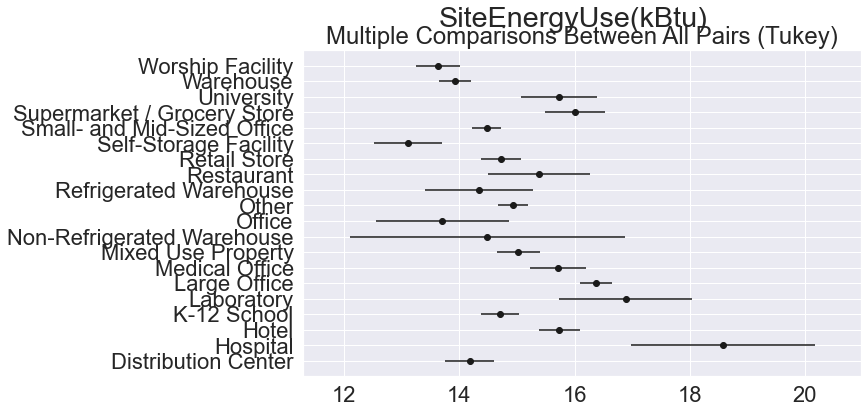

SteamUse(kBtu)--------------------------------------------------------
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------------
        Distribution Center                    Hospital   4.6801 0.6006  -2.0901 11.4502  False
        Distribution Center                       Hotel   3.3017  0.001   0.8505   5.753   True
        Distribution Center                 K-12 School   0.1421    0.9  -2.1842  2.4684  False
        Distribution Center                  Laboratory      0.0    0.9  -5.2661  5.2661  False
        Distribution Center                Large Office   2.6281 0.0026    0.476  4.7802   True
        Distribution Center              Medical Office   2.5679  0.165  -0.3342    5.47  False
        Distribution Center          Mixed Use Property   0.2458 

Figure(720x432)


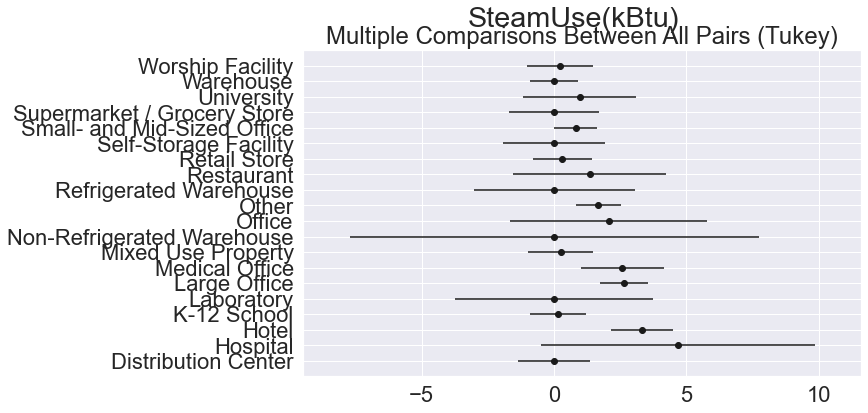

Electricity(kBtu)-----------------------------------------------------
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------
        Distribution Center                    Hospital   3.9641  0.001  1.9712  5.9569   True
        Distribution Center                       Hotel    1.109  0.001  0.3875  1.8305   True
        Distribution Center                 K-12 School   0.0691    0.9 -0.6156  0.7539  False
        Distribution Center                  Laboratory   2.2773  0.001  0.7272  3.8274   True
        Distribution Center                Large Office   2.3389  0.001  1.7054  2.9723   True
        Distribution Center              Medical Office   1.5828  0.001  0.7286  2.4371   True
        Distribution Center          Mixed Use Property    0.752 0.0398  0

Figure(720x432)


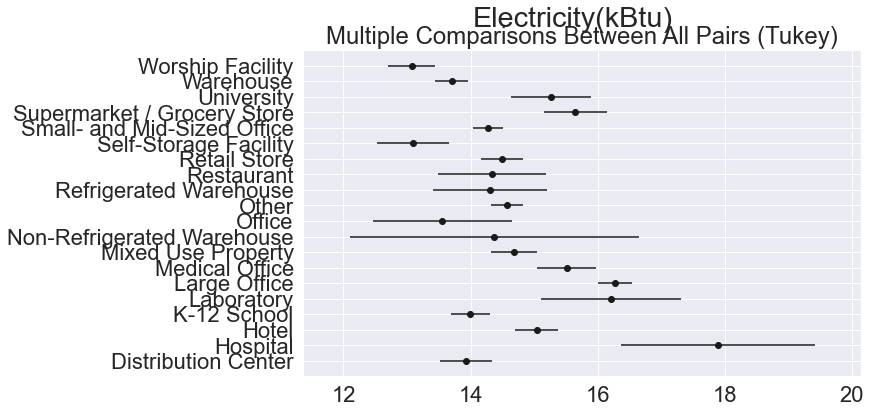

NaturalGas(kBtu)------------------------------------------------------
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------------
        Distribution Center                    Hospital   6.7058 0.7803  -4.2095 17.6212  False
        Distribution Center                       Hotel   3.6205 0.1233  -0.3316  7.5726  False
        Distribution Center                 K-12 School   2.5153 0.6488  -1.2354  6.2659  False
        Distribution Center                  Laboratory   5.5525 0.6877   -2.938 14.0429  False
        Distribution Center                Large Office  -3.4261 0.0579  -6.8959  0.0436  False
        Distribution Center              Medical Office  -2.2483    0.9  -6.9273  2.4307  False
        Distribution Center          Mixed Use Property   0.2501 

Figure(720x432)


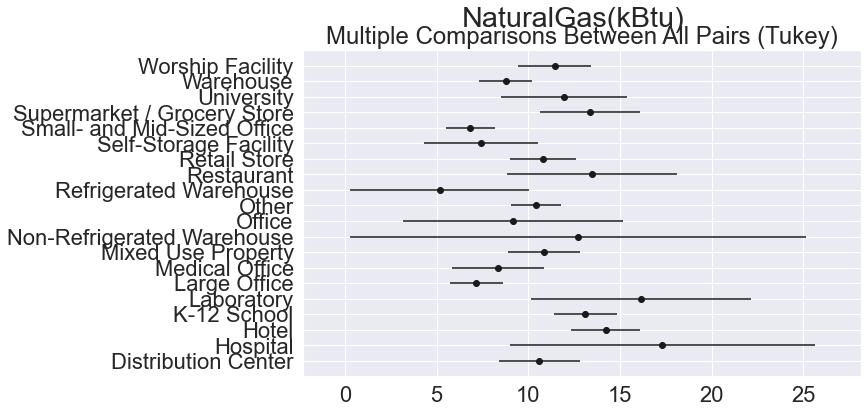

TotalGHGEmissions-----------------------------------------------------
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------
        Distribution Center                    Hospital   4.8131  0.001  2.6678  6.9584   True
        Distribution Center                       Hotel   1.9416  0.001  1.1648  2.7183   True
        Distribution Center                 K-12 School   0.8366  0.009  0.0994  1.5737   True
        Distribution Center                  Laboratory   3.0485  0.001  1.3798  4.7172   True
        Distribution Center                Large Office   1.5359  0.001  0.8539  2.2178   True
        Distribution Center              Medical Office   1.1676 0.0012  0.2479  2.0872   True
        Distribution Center          Mixed Use Property   0.7756 0.0652 -0

Figure(720x432)


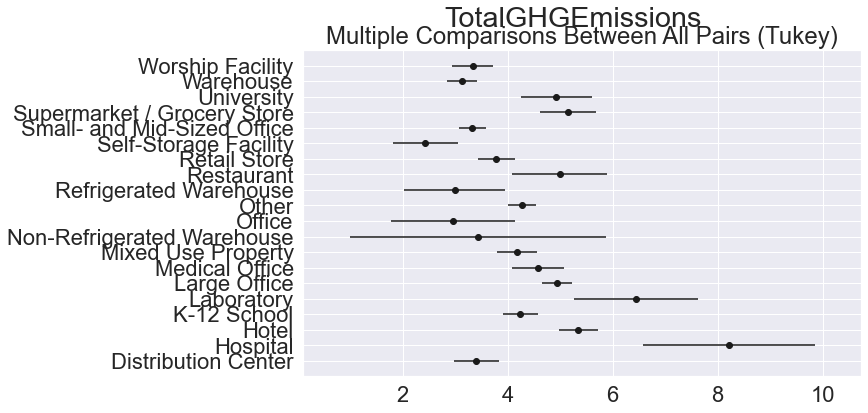

GHGEmissionsIntensity-------------------------------------------------
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------
        Distribution Center                    Hospital   1.3742  0.001  0.5184  2.2301   True
        Distribution Center                       Hotel   0.6237  0.001  0.3138  0.9336   True
        Distribution Center                 K-12 School    0.236 0.3231  -0.058  0.5301  False
        Distribution Center                  Laboratory   1.5967  0.001   0.931  2.2625   True
        Distribution Center                Large Office  -0.0493    0.9 -0.3214  0.2227  False
        Distribution Center              Medical Office   0.2074 0.8948 -0.1595  0.5743  False
        Distribution Center          Mixed Use Property   0.3592 0.0091  0

Figure(720x432)


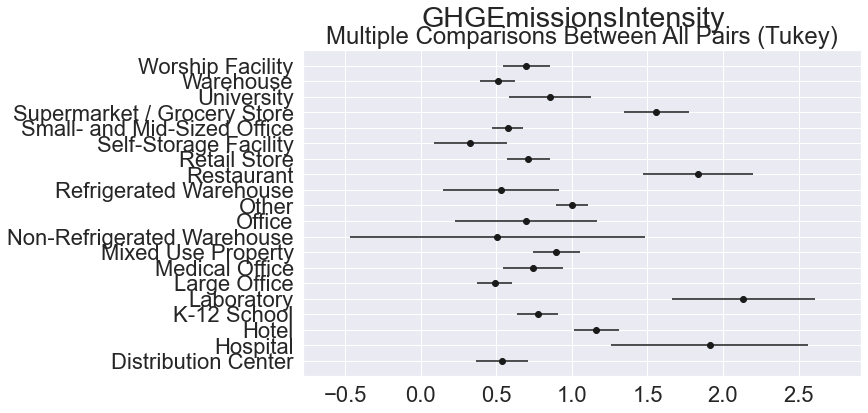

In [156]:
for col in log_col:
    MultiComp = MultiComparison(df_log[col], df['PrimaryPropertyType'])
    print(f'{col :-<70}')
    print(MultiComp.tukeyhsd().summary())
    print(MultiComp.tukeyhsd().plot_simultaneous())
    plt.suptitle(f'{col}')
    plt.show()

# Analyse Outliers

# Analyse en Composantes Principales
L'analyse en composantes principales (ACP) est une technique de traitement de données qui permet de réduire la dimensionnalité d'un ensemble de données en en conservant le maximum d'informations. Elle se base sur la décomposition de la matrice des données en deux matrices de dimensions plus faibles, de sorte que les nouvelles dimensions sont des combinaisons linéaires des anciennes dimensions.

In [159]:
df_log = df_log[['PrimaryPropertyType',
                 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
                'PropertyGFAParking', 'PropertyGFABuilding(s)',
                 'LargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
                 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
                 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
                 'GHGEmissionsIntensity', 'Build_Age', 'surface_Floor']]

In [160]:
from sklearn.preprocessing import StandardScaler

df_norm = df_log.copy()

# Sélectionnez les colonnes à normaliser
X = df_norm .select_dtypes(include=np.number)

# Créez une instance de StandardScaler
scaler = StandardScaler()

# Appliquer le scaler aux colonnes sélectionnées
X_scaled = scaler.fit_transform(X)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [161]:
from sklearn.decomposition import PCA
from sklearn import decomposition

Analyse des variables à prédire avec une ACP
* TotalGHGEmissions
* SiteEnergyUse(kBtu)

In [ ]:
#df.copy
df_acp_energy = df_log.copy()
df_acp_emissions = df_log.copy()

In [ ]:
df_acp_energy.columns

In [ ]:
df_acp_energy

* target :  'SiteEnergyUse(kBtu)'
* feature : 'surface_Floor', 'surface_Floor',' SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Build_Age', 'Diff_surface', 'surface_Floor',
       'geometry'

In [ ]:
df_acp_energy = df_acp_energy[['SiteEnergyUse(kBtu)', 'surface_Floor', 'SteamUse(kBtu)',
                               'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
                              'GHGEmissionsIntensity', 'Build_Age']]

In [ ]:
df_acp_energy.info()

In [ ]:
X_scaled = df_acp_energy.drop(['SiteEnergyUse(kBtu)'],axis=1)

In [ ]:

pca = PCA(svd_solver='full').fit(X_scaled)
X_projected = pca.transform(X_scaled)

var_expl = pca.explained_variance_ratio_*100

plt.figure(figsize=(12, 8))
plt.bar(np.arange(len(var_expl))+1, var_expl)
plt.plot(np.arange(len(var_expl))+1, var_expl.cumsum(), c="green", marker='o')
plt.xlabel("Axe d'inertie", fontsize=25)
plt.ylabel("Inertie", fontsize=25)
plt.title("Eboulis des valeurs propres", fontsize=25)

* target :  'TotalGHGEmissions'
* feature : surface, floor, PrimaryPropertyType SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Build_Age', 'Diff_surface', 'surface_Floor',
       'geometry'

In [ ]:
df_acp_emissions=df_acp_emissions[['TotalGHGEmissions','surface, floor', 'PrimaryPropertyType', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Build_Age', 'Diff_surface', 'surface_Floor',
       'geometry']]

In [ ]:
df_acp.drop(['BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Build_Age', 'Diff_surface', 'surface_Floor',
       'geometry', 'ENERGYSTARScore'],axis=1,inplace=True)

In [ ]:
X_scaled = df.select_dtypes(include=['float64'])

pca = PCA(svd_solver='full').fit(X_scaled)
X_projected = pca.transform(X_scaled) 

var_expl = pca.explained_variance_ratio_*100

plt.figure(figsize=(12,8))
plt.bar(np.arange(len(var_expl))+1, var_expl)
plt.plot(np.arange(len(var_expl))+1, var_expl.cumsum(),c="green",marker='o')
plt.xlabel("Axe d'inertie", fontsize=25)
plt.ylabel("Inertie", fontsize=25)
plt.title("Eboulis des valeurs propres", fontsize=25)

In [ ]:
df.to_csv('Building_Energy_Benchmarking.csv', index=False, header=True)